<a href="https://colab.research.google.com/github/douglasmmachado/MedicineConsumption/blob/main/notebooks/division_approach/2_Data_Treatment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2 - Removing outliers, understanding the data, visualization of components for each dataset, common period for the different hospitals, data aggregation and transformation of categorical features into numerical ones.

---



---



# Loading libs and database

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import math as m

df_h1_url ="https://raw.githubusercontent.com/douglasmmachado/ExploratoryDataAnalysis/main/datasets/division_approach/df_h1.csv"
df_h2_url ="https://raw.githubusercontent.com/douglasmmachado/ExploratoryDataAnalysis/main/datasets/division_approach/df_h2.csv"
df_h3_url ="https://raw.githubusercontent.com/douglasmmachado/ExploratoryDataAnalysis/main/datasets/division_approach/df_h3.csv"
df_h4_url ="https://raw.githubusercontent.com/douglasmmachado/ExploratoryDataAnalysis/main/datasets/division_approach/df_h4.csv"

df_h1 = pd.read_csv(df_h1_url)
df_h2 = pd.read_csv(df_h2_url)
df_h3 = pd.read_csv(df_h3_url)
df_h4 = pd.read_csv(df_h4_url)


categorical_features = ['ID_REF', 'ID_SITE_RATTACHE', 'CODE_ATC', 'HOSPI_CODE_UCD']
date_features = ['DATE_MOUV', 'WEEK', 'MONTH', 'YEAR']
numerical_features = ['N_UFS', 'QUANTITY', 'N_ETB', 'POPULATION', 'P_MEDICAL', 'PN_MEDICAL', 'LIT_HC', 'LIT_HP', 'SEJ_MCO', 'SEJ_HAD', 'SEJ_PSY', 'SEJ_SSR']

for _, df in enumerate([df_h1, df_h2, df_h3, df_h4]):

  df['DATE_MOUV'] = pd.to_datetime(df['DATE_MOUV'],
                format='%Y-%m-%d')  # Changed the type of date too

  for column in categorical_features:
    df[column] = df[column].astype('string')

## 2.1 - Visualisation of data range and data composition

In [ ]:
df_h1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22725 entries, 0 to 22724
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_REF            22725 non-null  string        
 1   ID_SITE_RATTACHE  22725 non-null  string        
 2   CODE_ATC          22725 non-null  string        
 3   HOSPI_CODE_UCD    22725 non-null  string        
 4   DATE_MOUV         22725 non-null  datetime64[ns]
 5   N_UFS             22725 non-null  int64         
 6   QUANTITY          22725 non-null  float64       
 7   WEEK              22725 non-null  int64         
 8   MONTH             22725 non-null  int64         
 9   YEAR              22725 non-null  int64         
 10  N_ETB             22725 non-null  int64         
 11  POPULATION        22725 non-null  float64       
 12  P_MEDICAL         22725 non-null  int64         
 13  PN_MEDICAL        22725 non-null  int64         
 14  LIT_HC            2272

In [ ]:
df_h2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15439 entries, 0 to 15438
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_REF            15439 non-null  string        
 1   ID_SITE_RATTACHE  15439 non-null  string        
 2   CODE_ATC          15439 non-null  string        
 3   HOSPI_CODE_UCD    15439 non-null  string        
 4   DATE_MOUV         15439 non-null  datetime64[ns]
 5   N_UFS             15439 non-null  int64         
 6   QUANTITY          15439 non-null  float64       
 7   WEEK              15439 non-null  int64         
 8   MONTH             15439 non-null  int64         
 9   YEAR              15439 non-null  int64         
 10  N_ETB             15439 non-null  int64         
 11  POPULATION        15439 non-null  float64       
 12  P_MEDICAL         15439 non-null  int64         
 13  PN_MEDICAL        15439 non-null  int64         
 14  LIT_HC            1543

In [ ]:
df_h3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27591 entries, 0 to 27590
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_REF            27591 non-null  string        
 1   ID_SITE_RATTACHE  27591 non-null  string        
 2   CODE_ATC          27591 non-null  string        
 3   HOSPI_CODE_UCD    27591 non-null  string        
 4   DATE_MOUV         27591 non-null  datetime64[ns]
 5   N_UFS             27591 non-null  int64         
 6   QUANTITY          27591 non-null  float64       
 7   WEEK              27591 non-null  int64         
 8   MONTH             27591 non-null  int64         
 9   YEAR              27591 non-null  int64         
 10  N_ETB             27591 non-null  int64         
 11  POPULATION        27591 non-null  float64       
 12  P_MEDICAL         27591 non-null  int64         
 13  PN_MEDICAL        27591 non-null  int64         
 14  LIT_HC            2759

In [ ]:
df_h4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9929 entries, 0 to 9928
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_REF            9929 non-null   string        
 1   ID_SITE_RATTACHE  9929 non-null   string        
 2   CODE_ATC          9929 non-null   string        
 3   HOSPI_CODE_UCD    9929 non-null   string        
 4   DATE_MOUV         9929 non-null   datetime64[ns]
 5   N_UFS             9929 non-null   int64         
 6   QUANTITY          9929 non-null   float64       
 7   WEEK              9929 non-null   int64         
 8   MONTH             9929 non-null   int64         
 9   YEAR              9929 non-null   int64         
 10  N_ETB             9929 non-null   int64         
 11  POPULATION        9929 non-null   float64       
 12  P_MEDICAL         9929 non-null   int64         
 13  PN_MEDICAL        9929 non-null   int64         
 14  LIT_HC            9929 n

In [ ]:
def visualize_distribution(df, features):
  '''
    Plot of distribution for the numerical features after removing the outliers
  '''

  fig, axes = plt.subplots(4, 3,sharex=False, figsize=(20,20))

  i = 0
  j = 0
  for column in features:
    sns.histplot(df[column], kde=True, stat="density", kde_kws=dict(cut=3),alpha=.4, edgecolor=(1, 1, 1, .4),ax=axes[i, j]).set(title='Distribution of: ' + str(column))
    if j == 2:
      i += 1
      j = 0
    else:
      j+=1

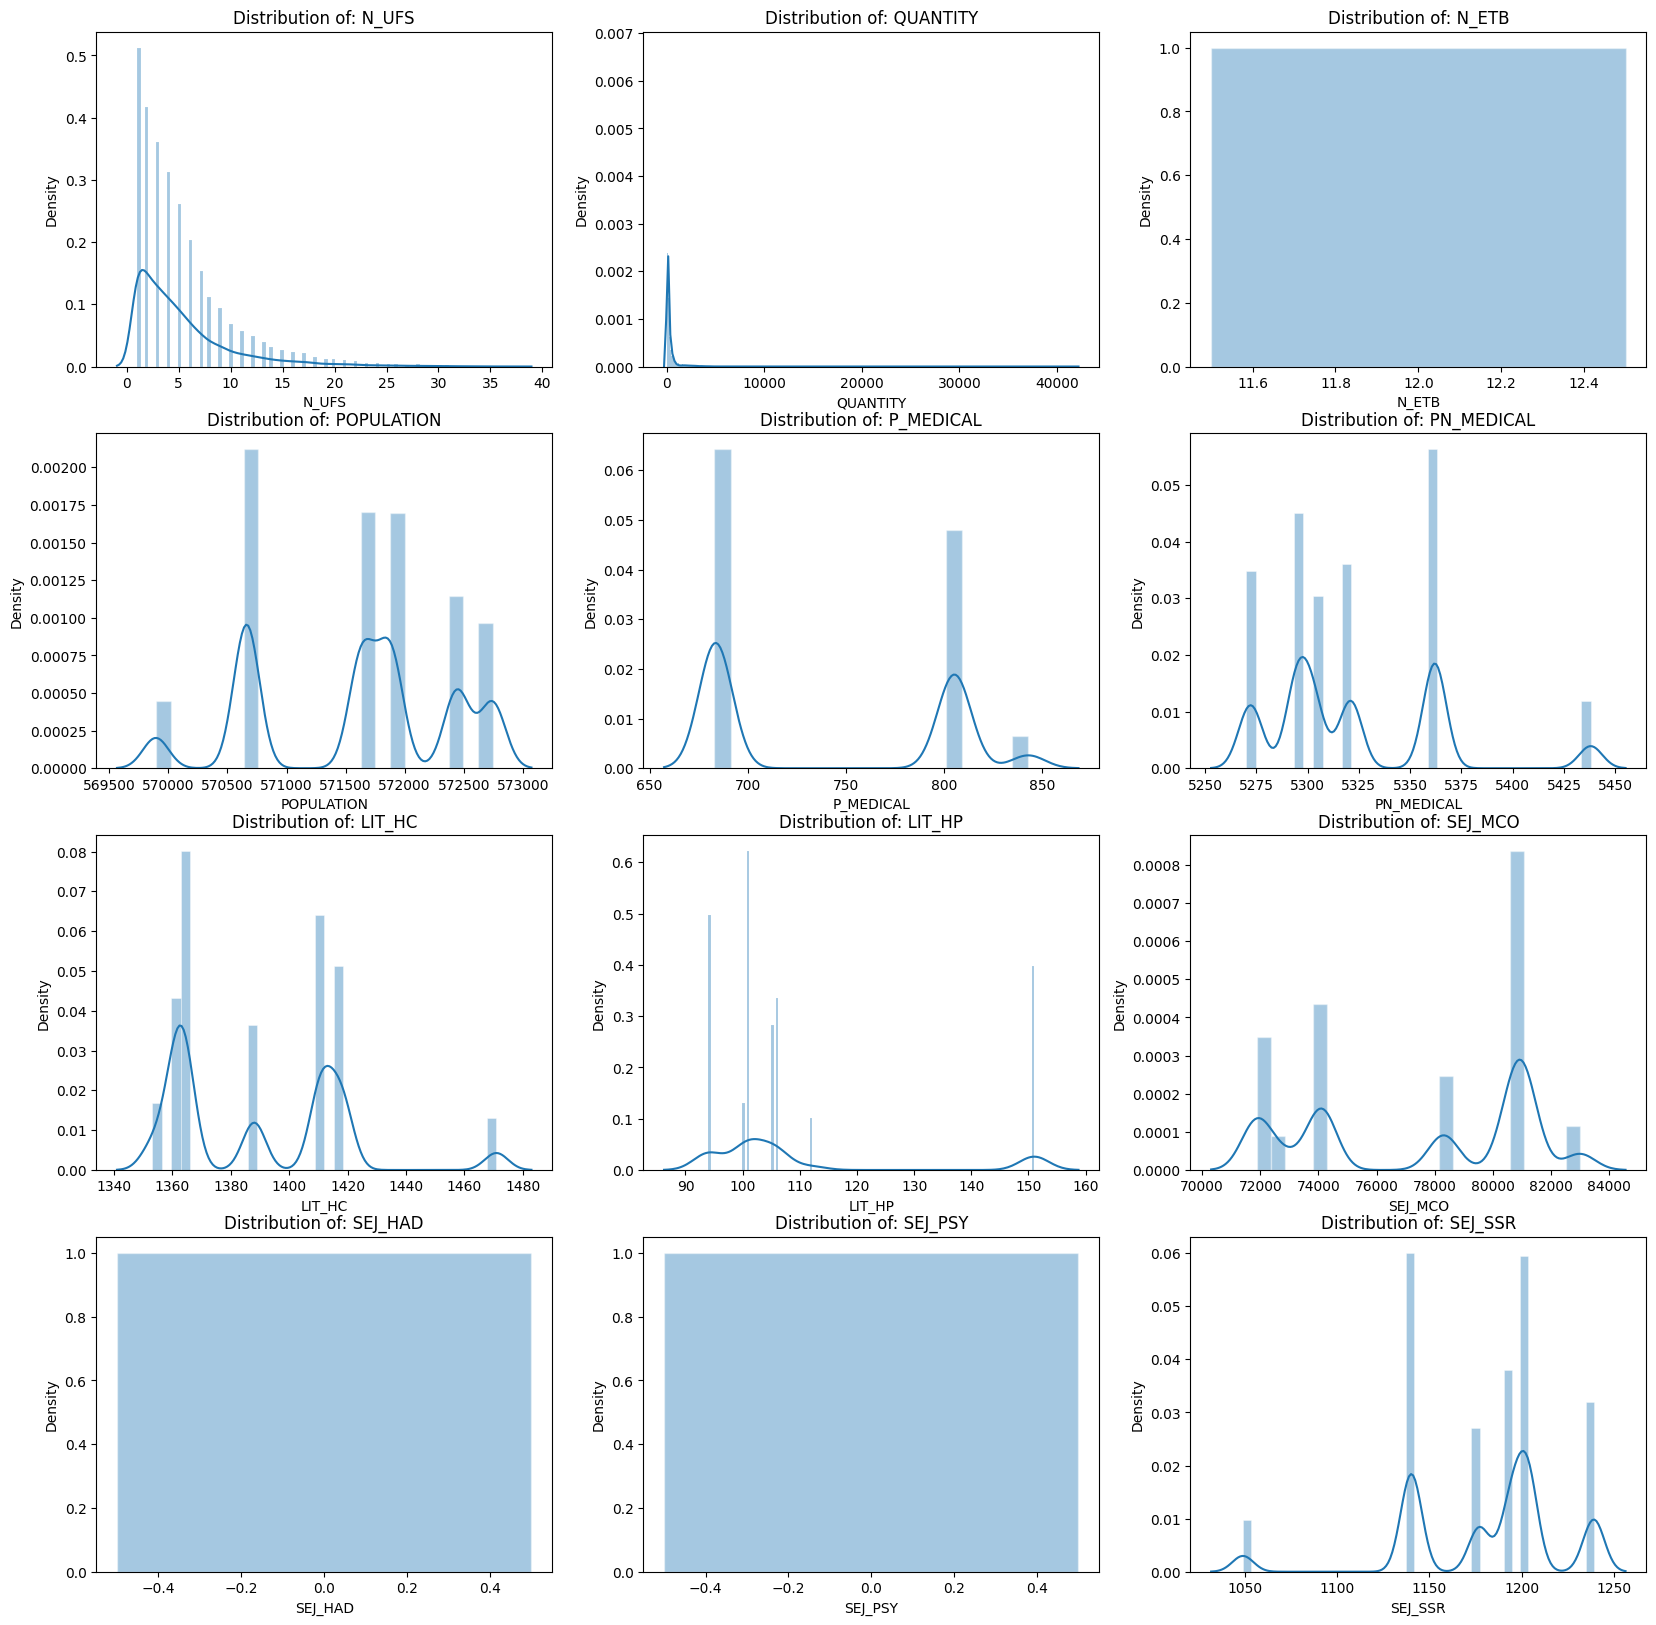

In [ ]:
# Hospital 1
visualize_distribution(df_h1, numerical_features)

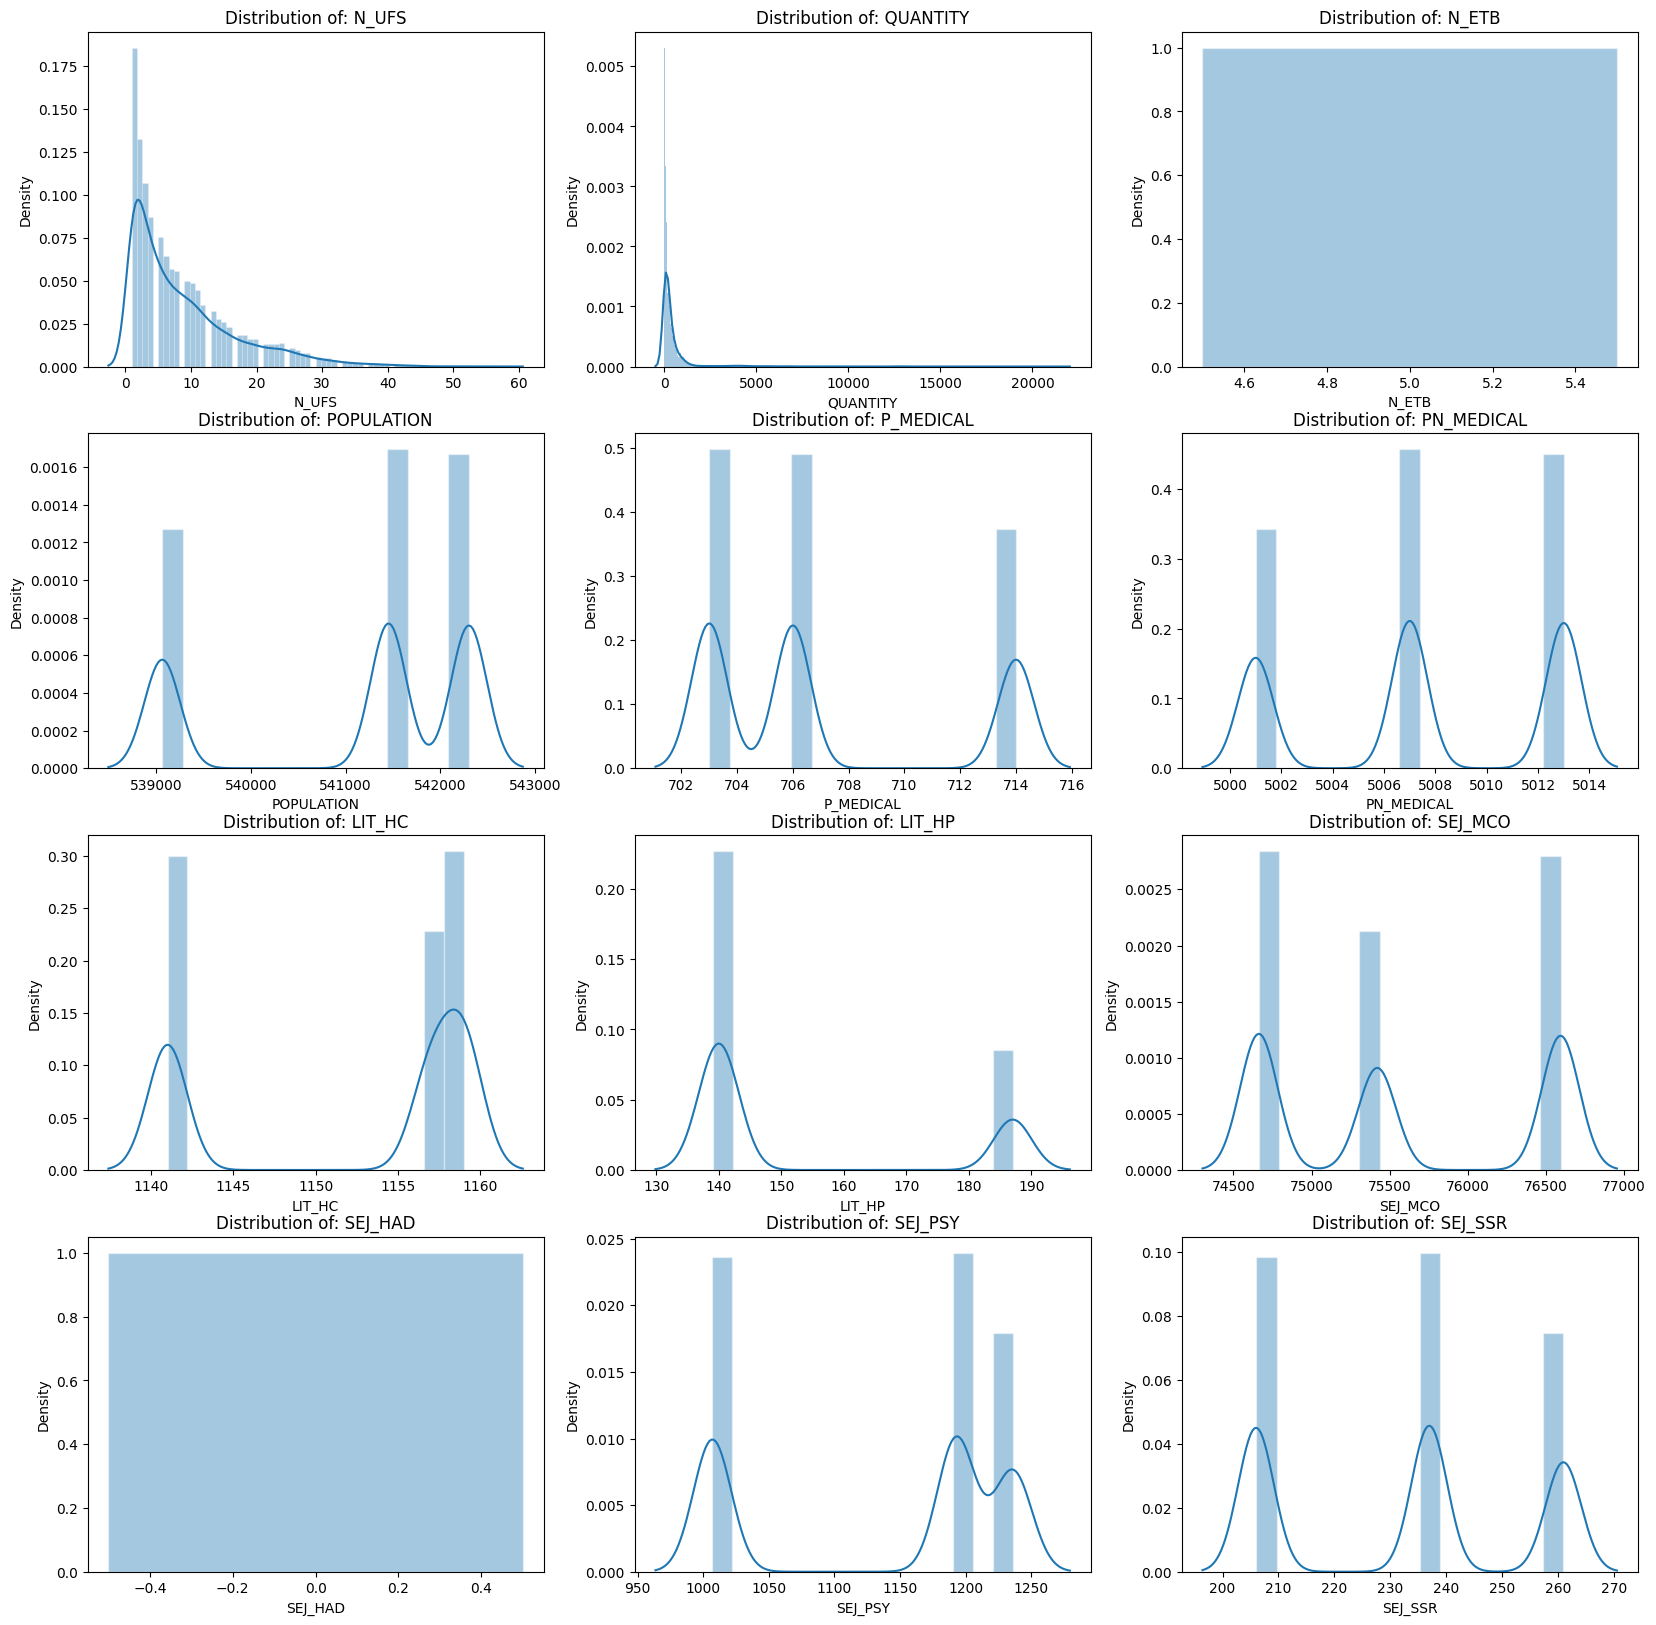

In [ ]:
# Hospital 2
visualize_distribution(df_h2, numerical_features)

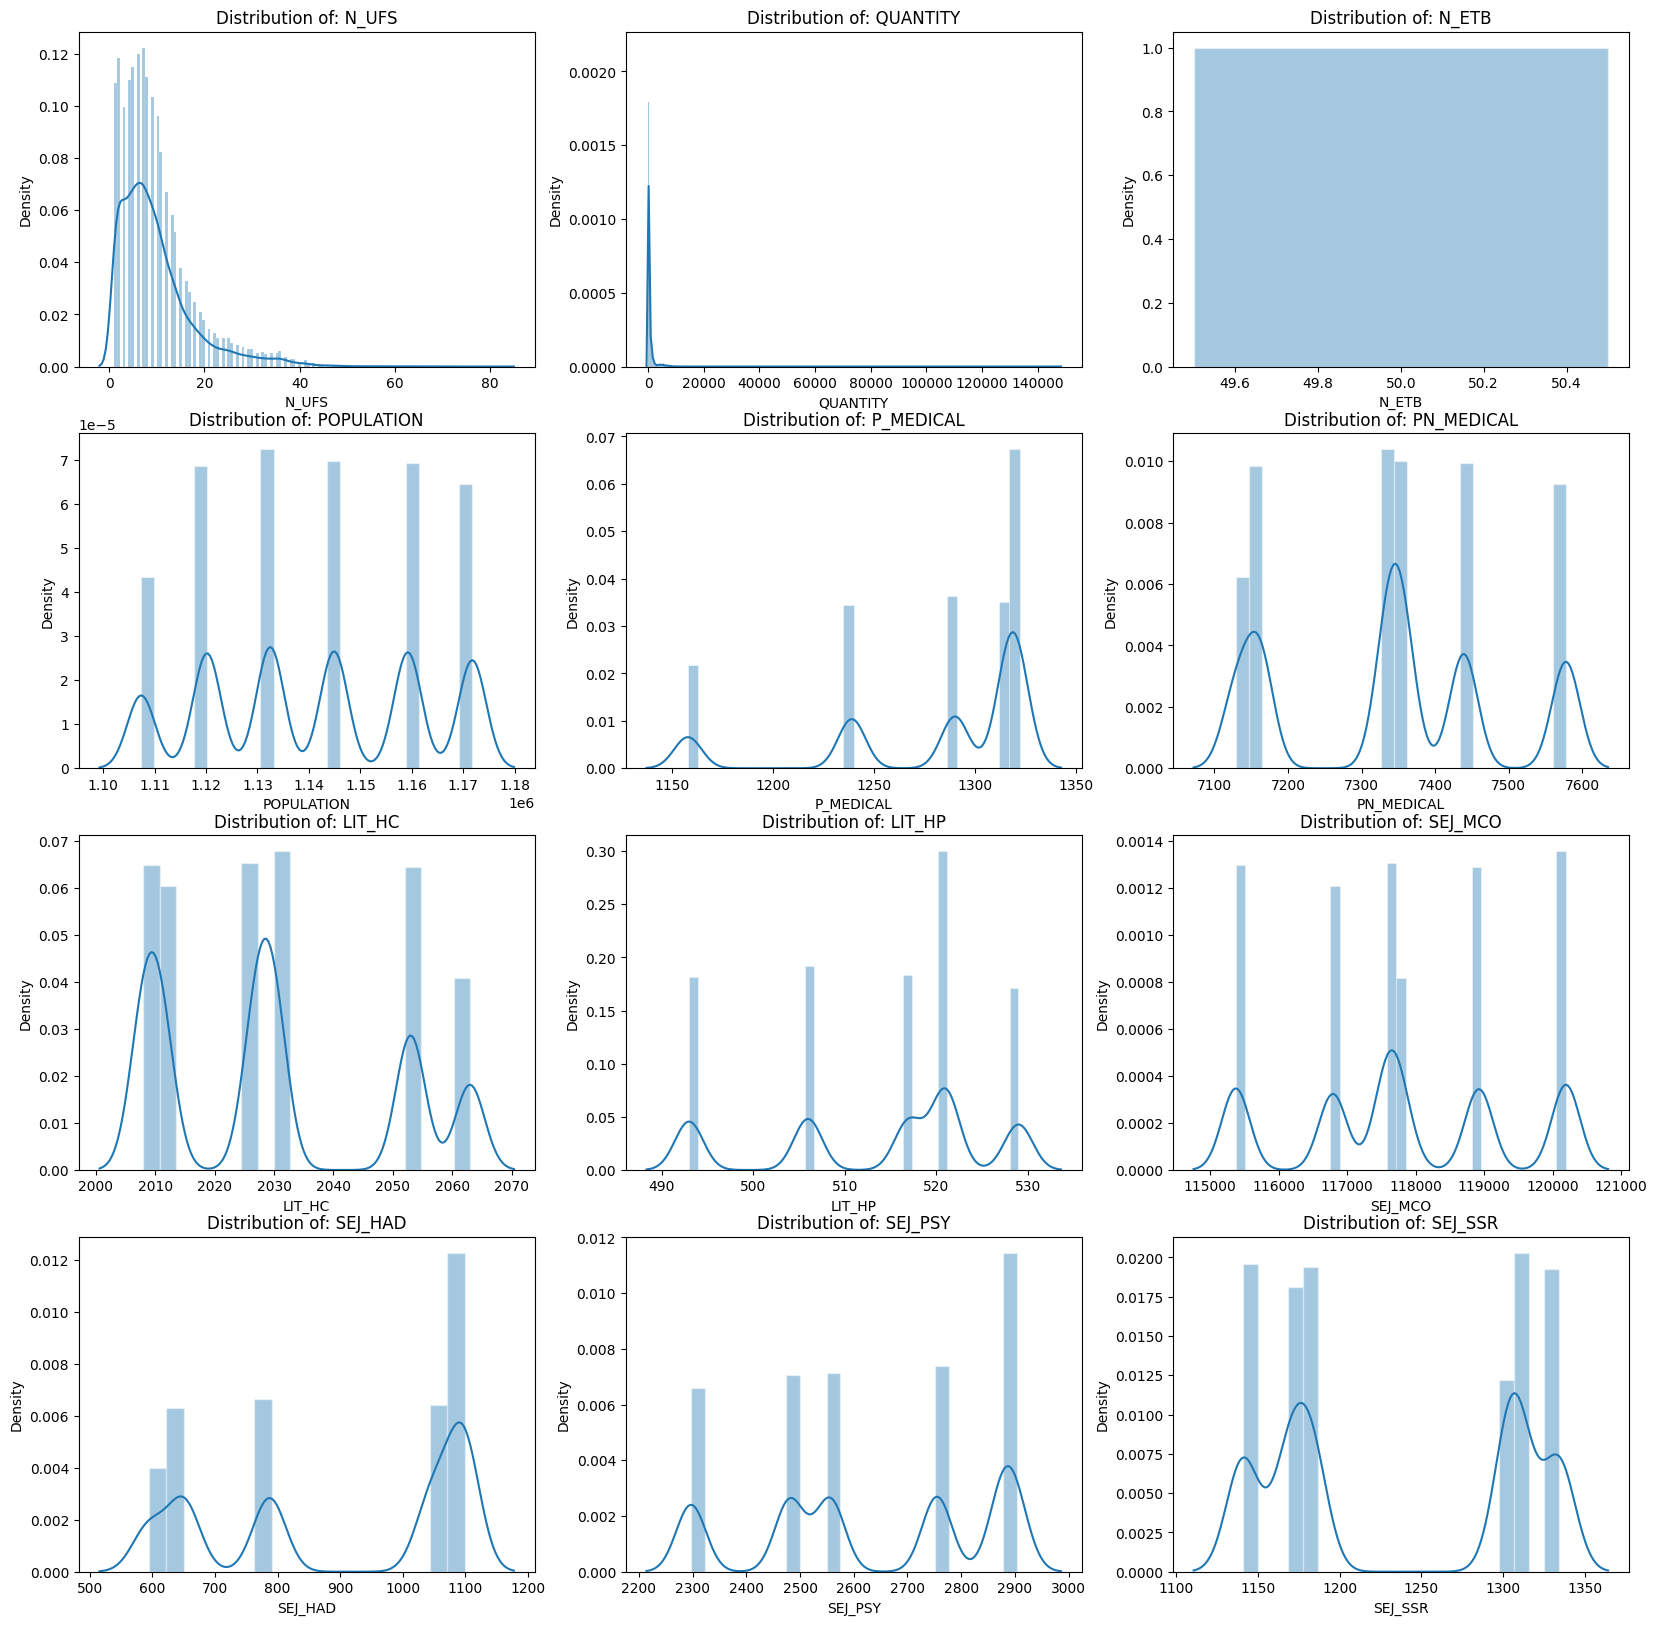

In [ ]:
# Hospital 3
visualize_distribution(df_h3, numerical_features)

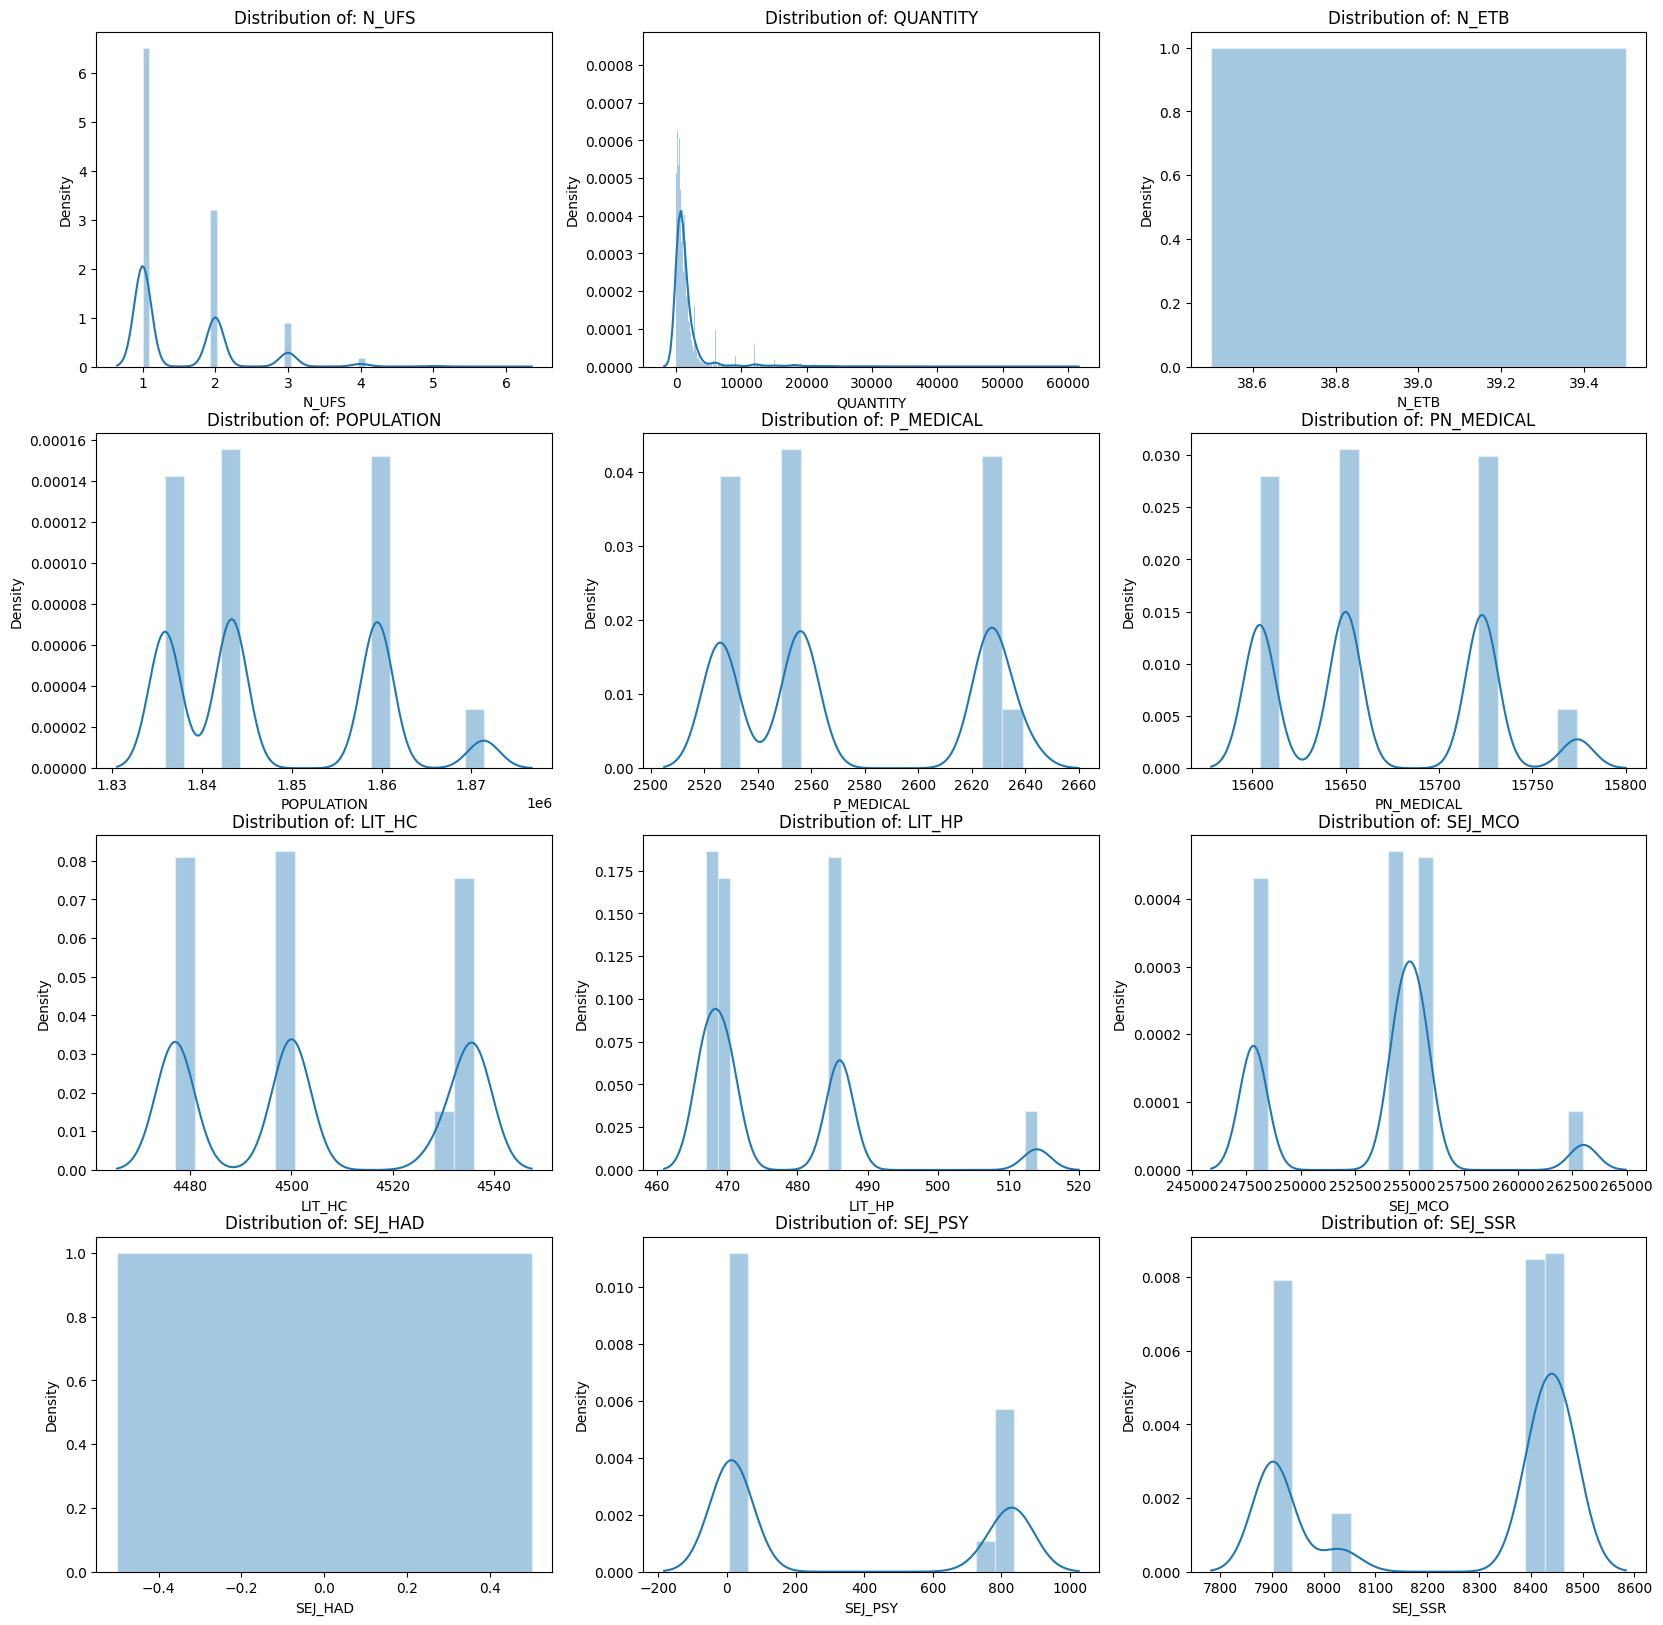

In [ ]:
# Hospital 4
visualize_distribution(df_h4, numerical_features)

## 2.2 - Removing outliers by hospital and by drug

In [ ]:
def remove_outliers(df, columns, verbose=False):
    N_macro = df.shape[0]
    new_df = pd.DataFrame()  # Create an empty DataFrame to store the filtered values
    removed_outliers = 0  # Variable to keep track of the total number of removed outliers

    for col in columns:
        for ucd_code in df['HOSPI_CODE_UCD'].unique():
            # Filter the dataframe for the specific HOSPI_CODE_UCD
            df_subset = df[df['HOSPI_CODE_UCD'] == ucd_code]
            N = df_subset.shape[0]

            # Calculate the statistics for the column within the HOSPI_CODE_UCD subset
            q25, q75 = np.percentile(df_subset[col], [25, 75])
            iqr = q75 - q25
            lower, upper = q25 - (iqr * 1.5), q75 + (iqr * 1.5)

            # Remove outliers based on the cutoff values within the HOSPI_CODE_UCD subset
            df_filtered = df_subset[(df_subset[col] >= lower) & (df_subset[col] <= upper)]
            N_new = df_filtered.shape[0]
            delta = N - N_new

            # Update the new DataFrame with the filtered values
            new_df = pd.concat([new_df, df_filtered])

            if verbose:
                if delta > 0:
                    print(f'Column: {col}')
                    print(f'HOSPI_CODE_UCD: {ucd_code}')
                    print(f'Removed outliers: {delta}')
                    print(f'Removed percentage: {(100 * delta / N):.3}%')
                    print()

            removed_outliers += delta

    new_df.reset_index(drop=True, inplace=True)
    print('N_old:', N_macro)
    N_macro_new = new_df.shape[0]
    print('N_new:', N_macro_new)
    delta = N_macro - N_macro_new
    print(f'Total removed outliers: {(100 * delta / N_macro):.3}%')

    return new_df


In [ ]:
print("-"*100)
df_h1_wo_outliers = remove_outliers(df_h1, ["QUANTITY"], verbose = False)

print("-"*100)
df_h2_wo_outliers = remove_outliers(df_h2, ["QUANTITY"], verbose = False)

print("-"*100)
df_h3_wo_outliers = remove_outliers(df_h3, ["QUANTITY"], verbose = False)

print("-"*100)
df_h4_wo_outliers = remove_outliers(df_h4, ["QUANTITY"], verbose = False)

----------------------------------------------------------------------------------------------------
N_old: 22725
N_new: 21715
Total removed outliers: 4.44%
----------------------------------------------------------------------------------------------------
N_old: 15439
N_new: 14953
Total removed outliers: 3.15%
----------------------------------------------------------------------------------------------------
N_old: 27591
N_new: 26801
Total removed outliers: 2.86%
----------------------------------------------------------------------------------------------------
N_old: 9929
N_new: 9638
Total removed outliers: 2.93%


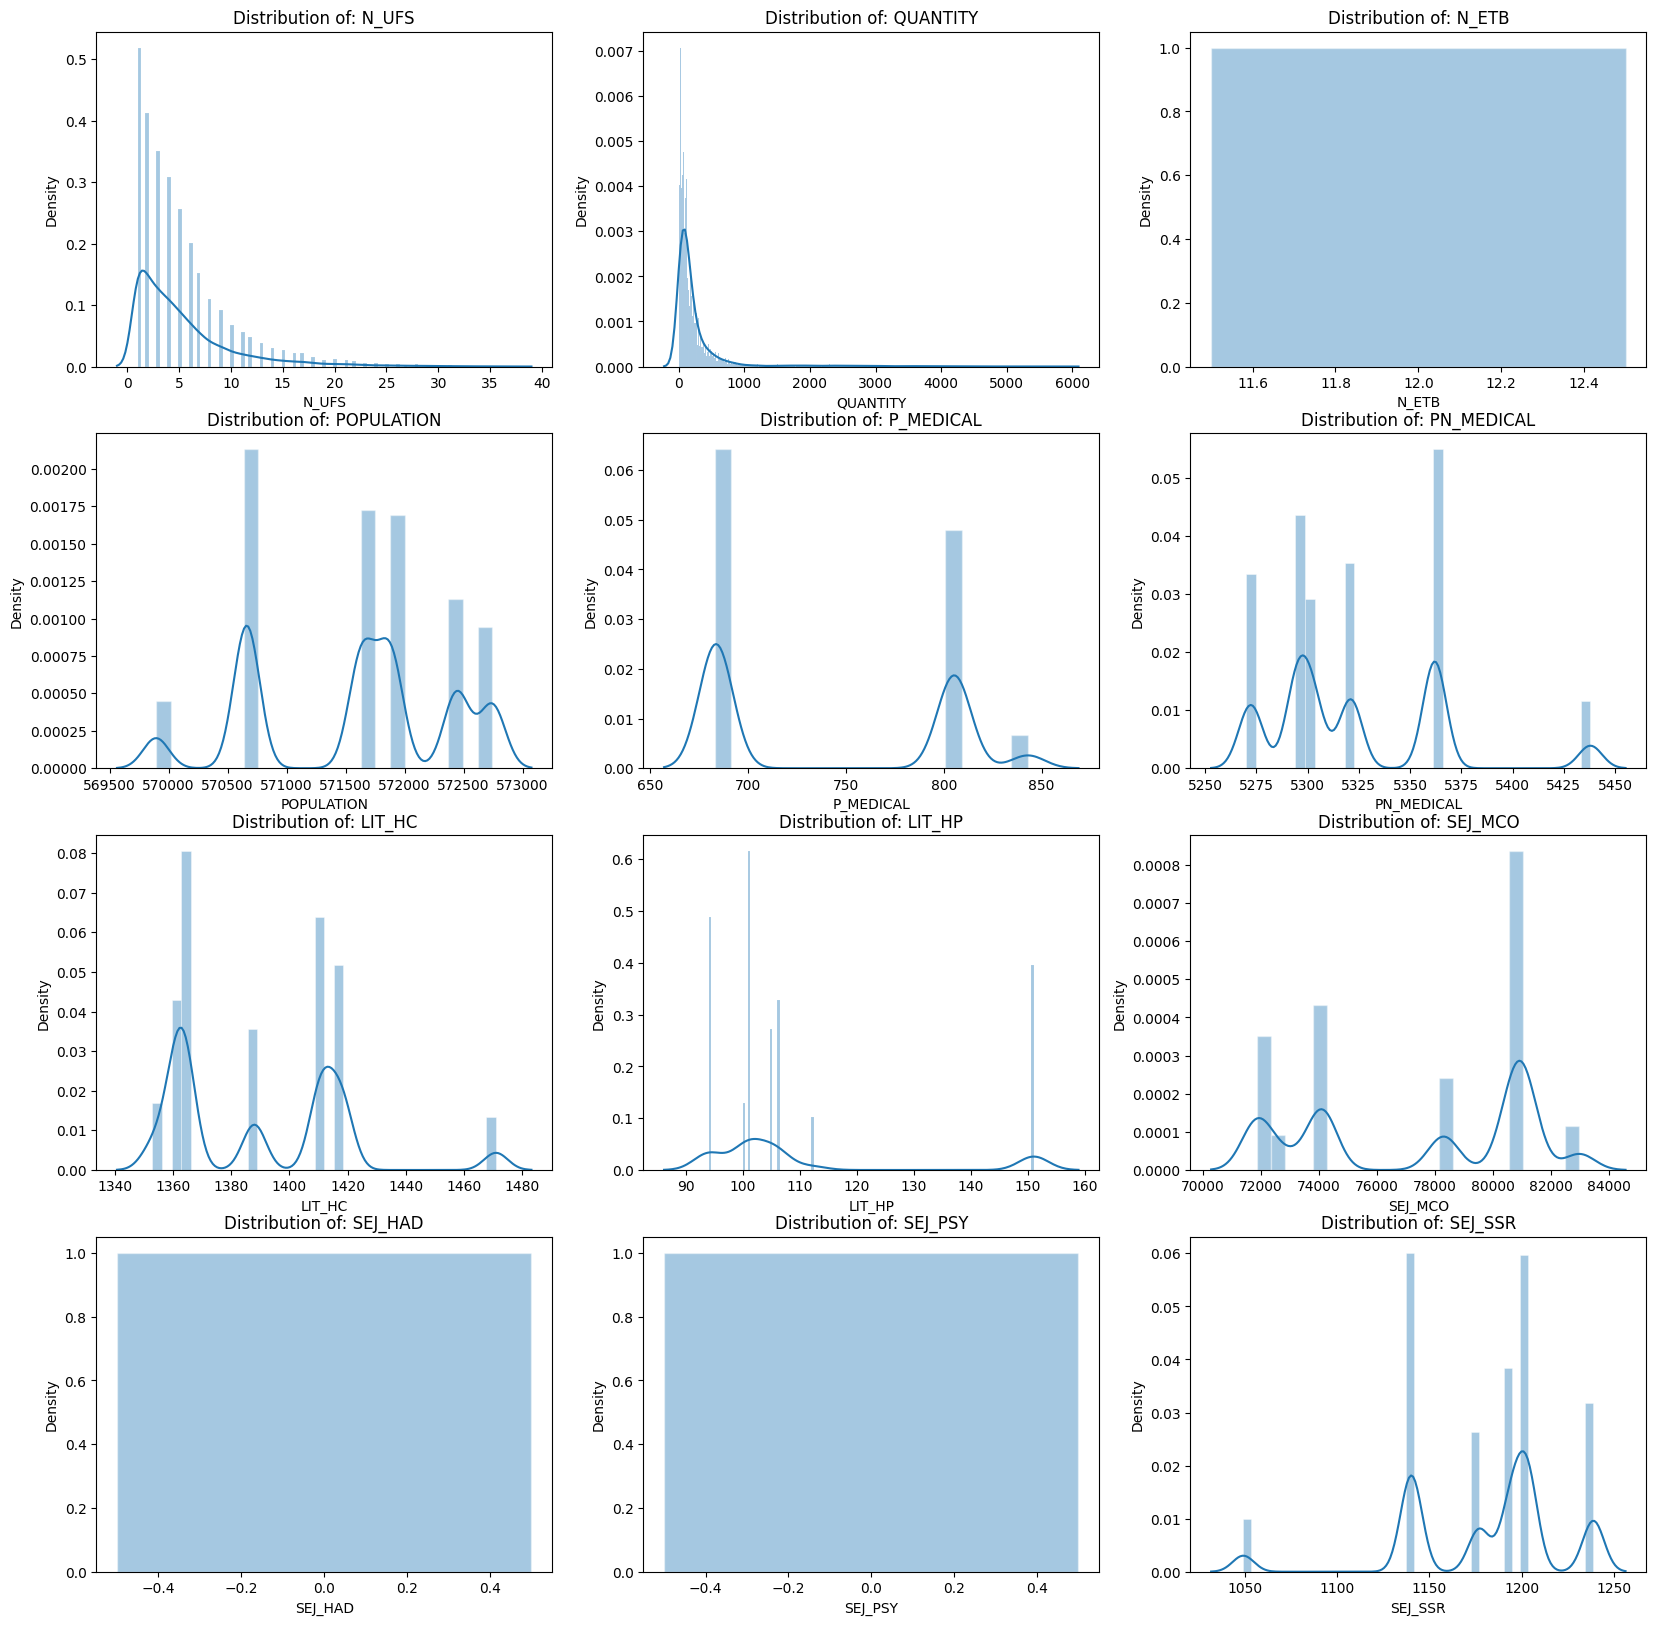

In [ ]:
# Hospital 1
visualize_distribution(df_h1_wo_outliers, numerical_features)

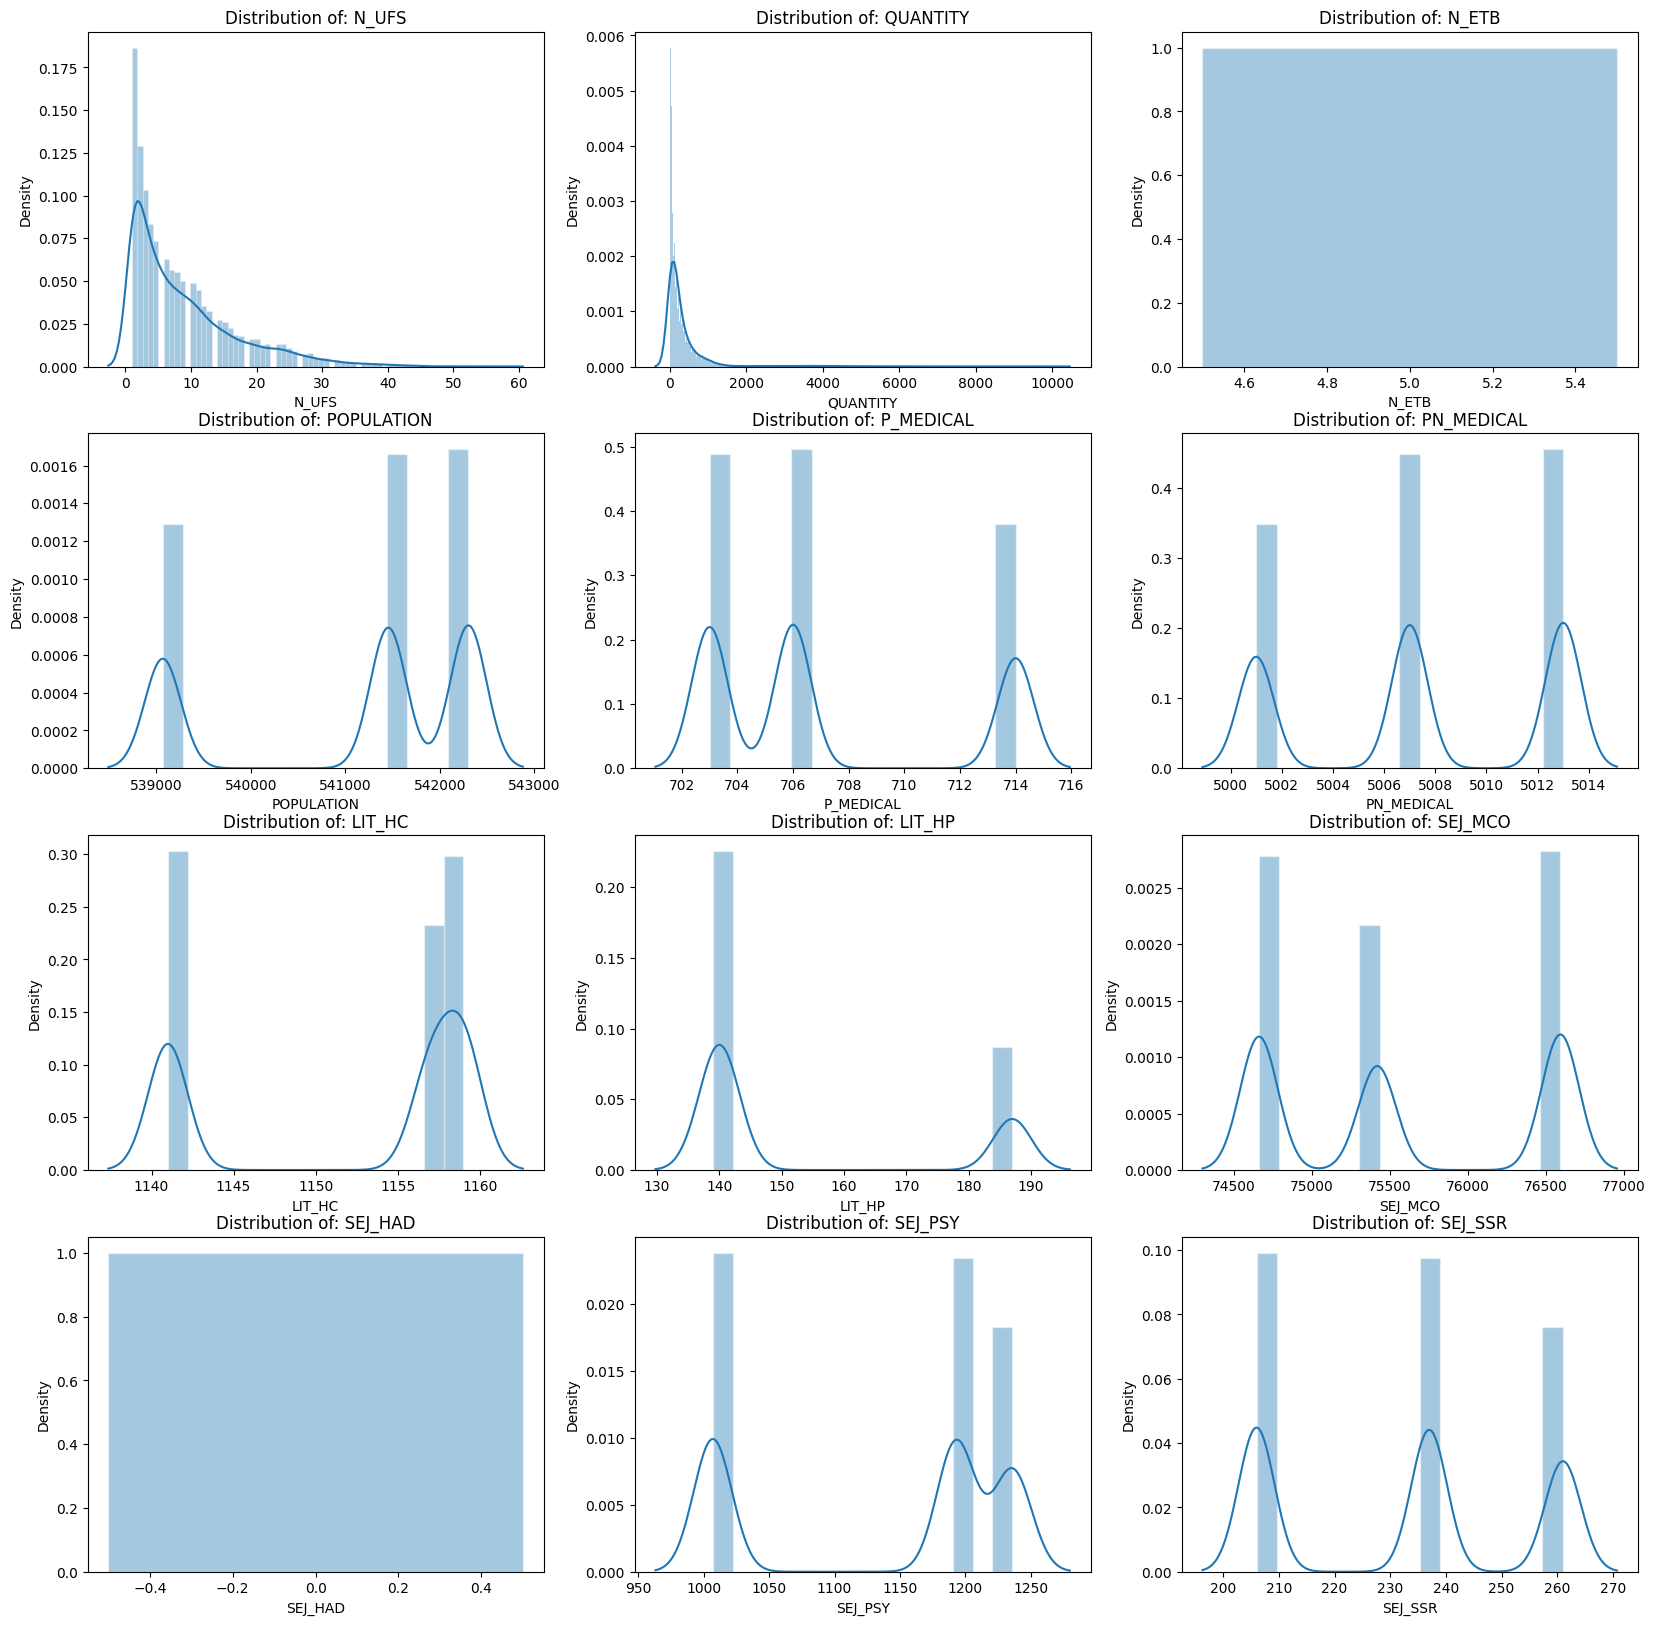

In [ ]:
# Hospital 2
visualize_distribution(df_h2_wo_outliers, numerical_features)

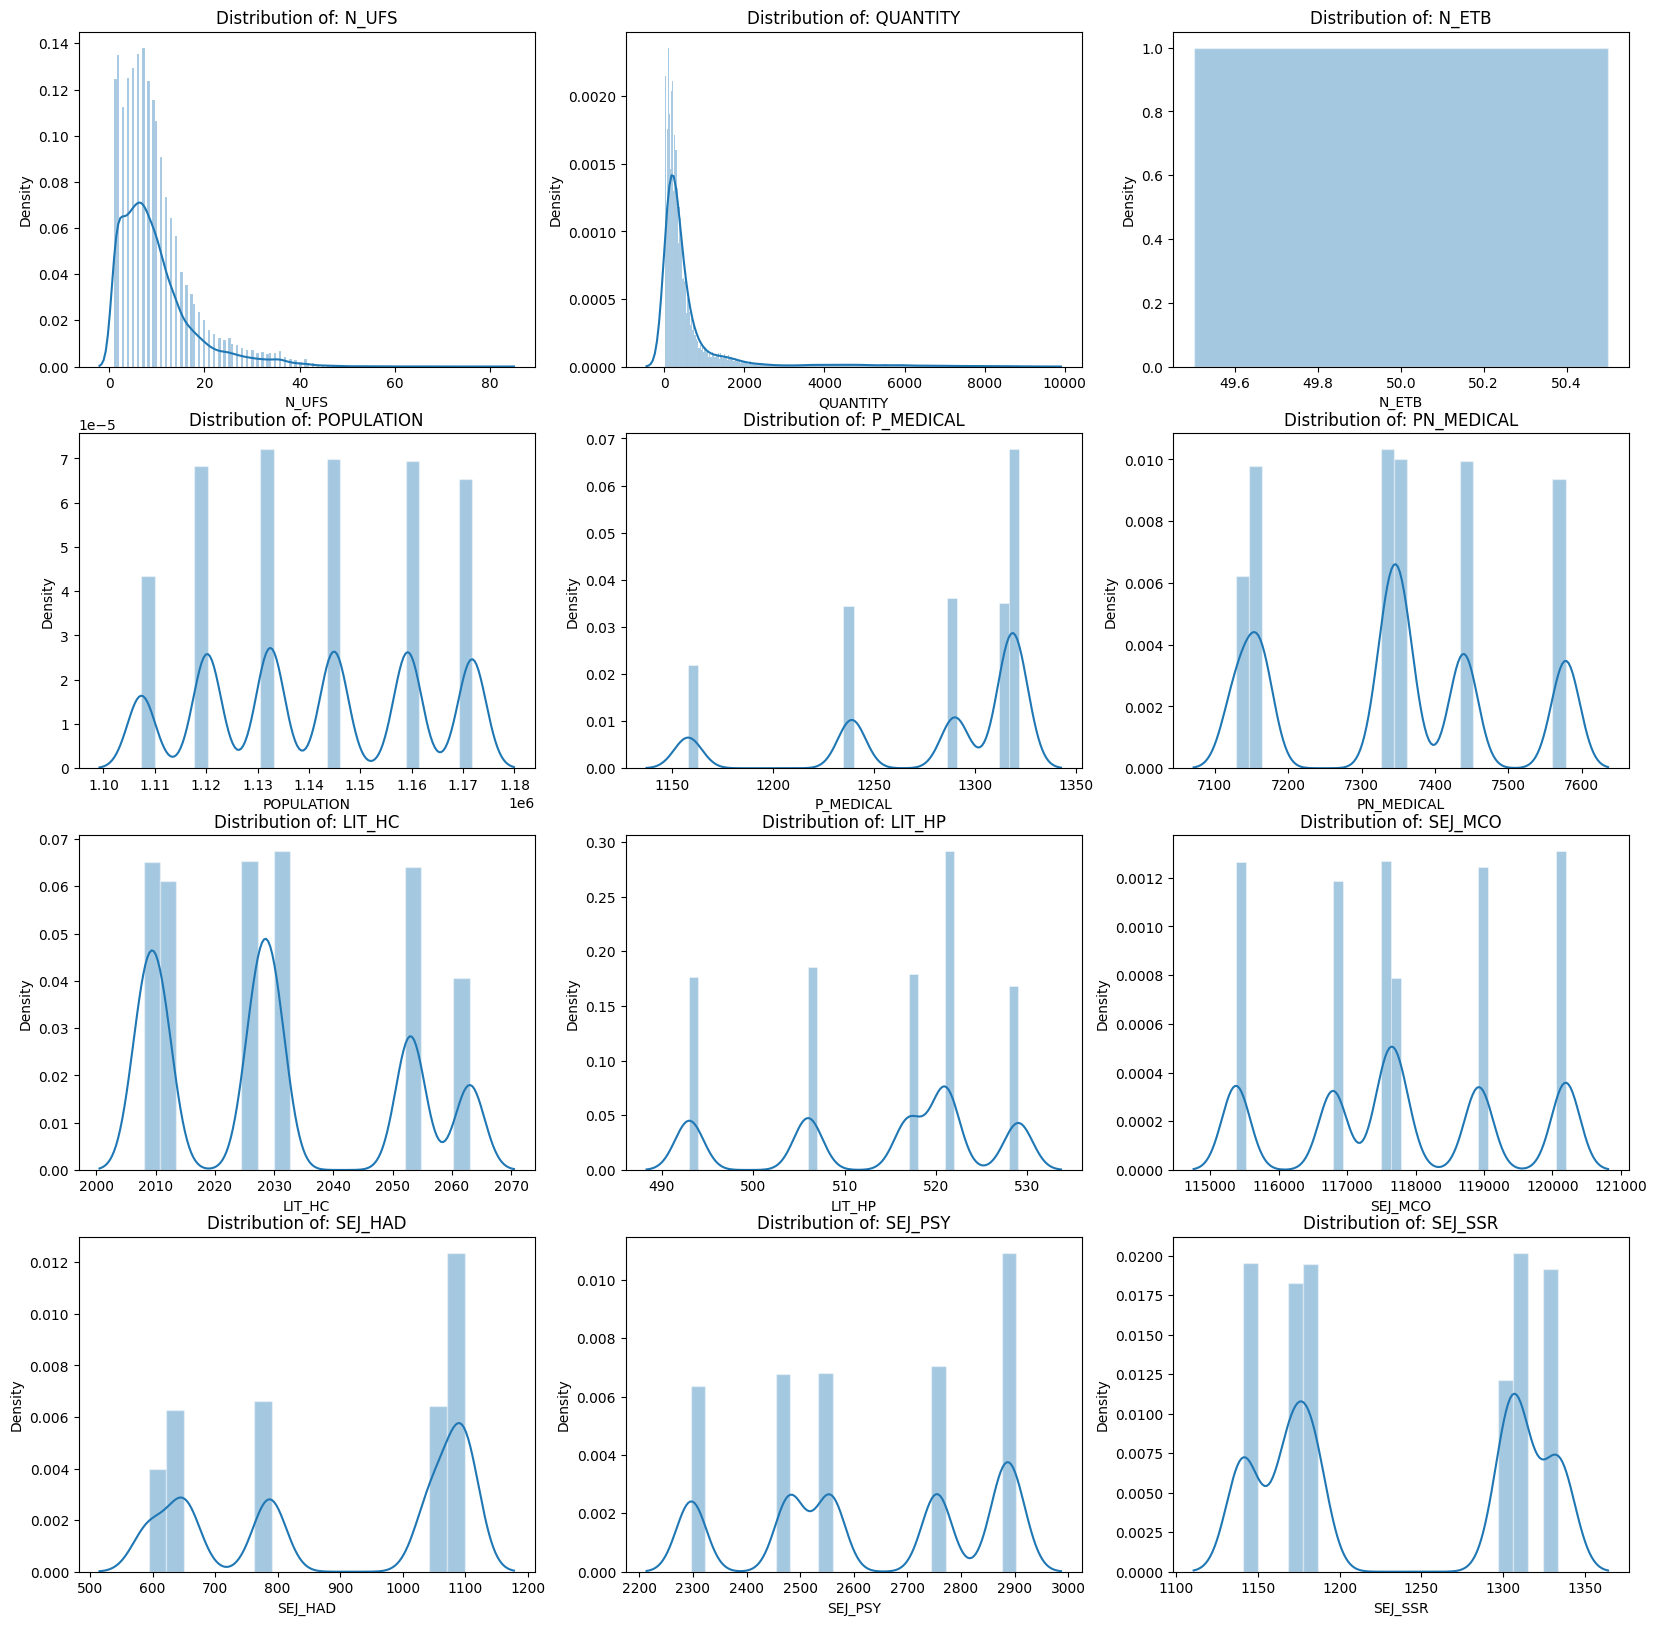

In [ ]:
# Hospital 3
visualize_distribution(df_h3_wo_outliers, numerical_features)

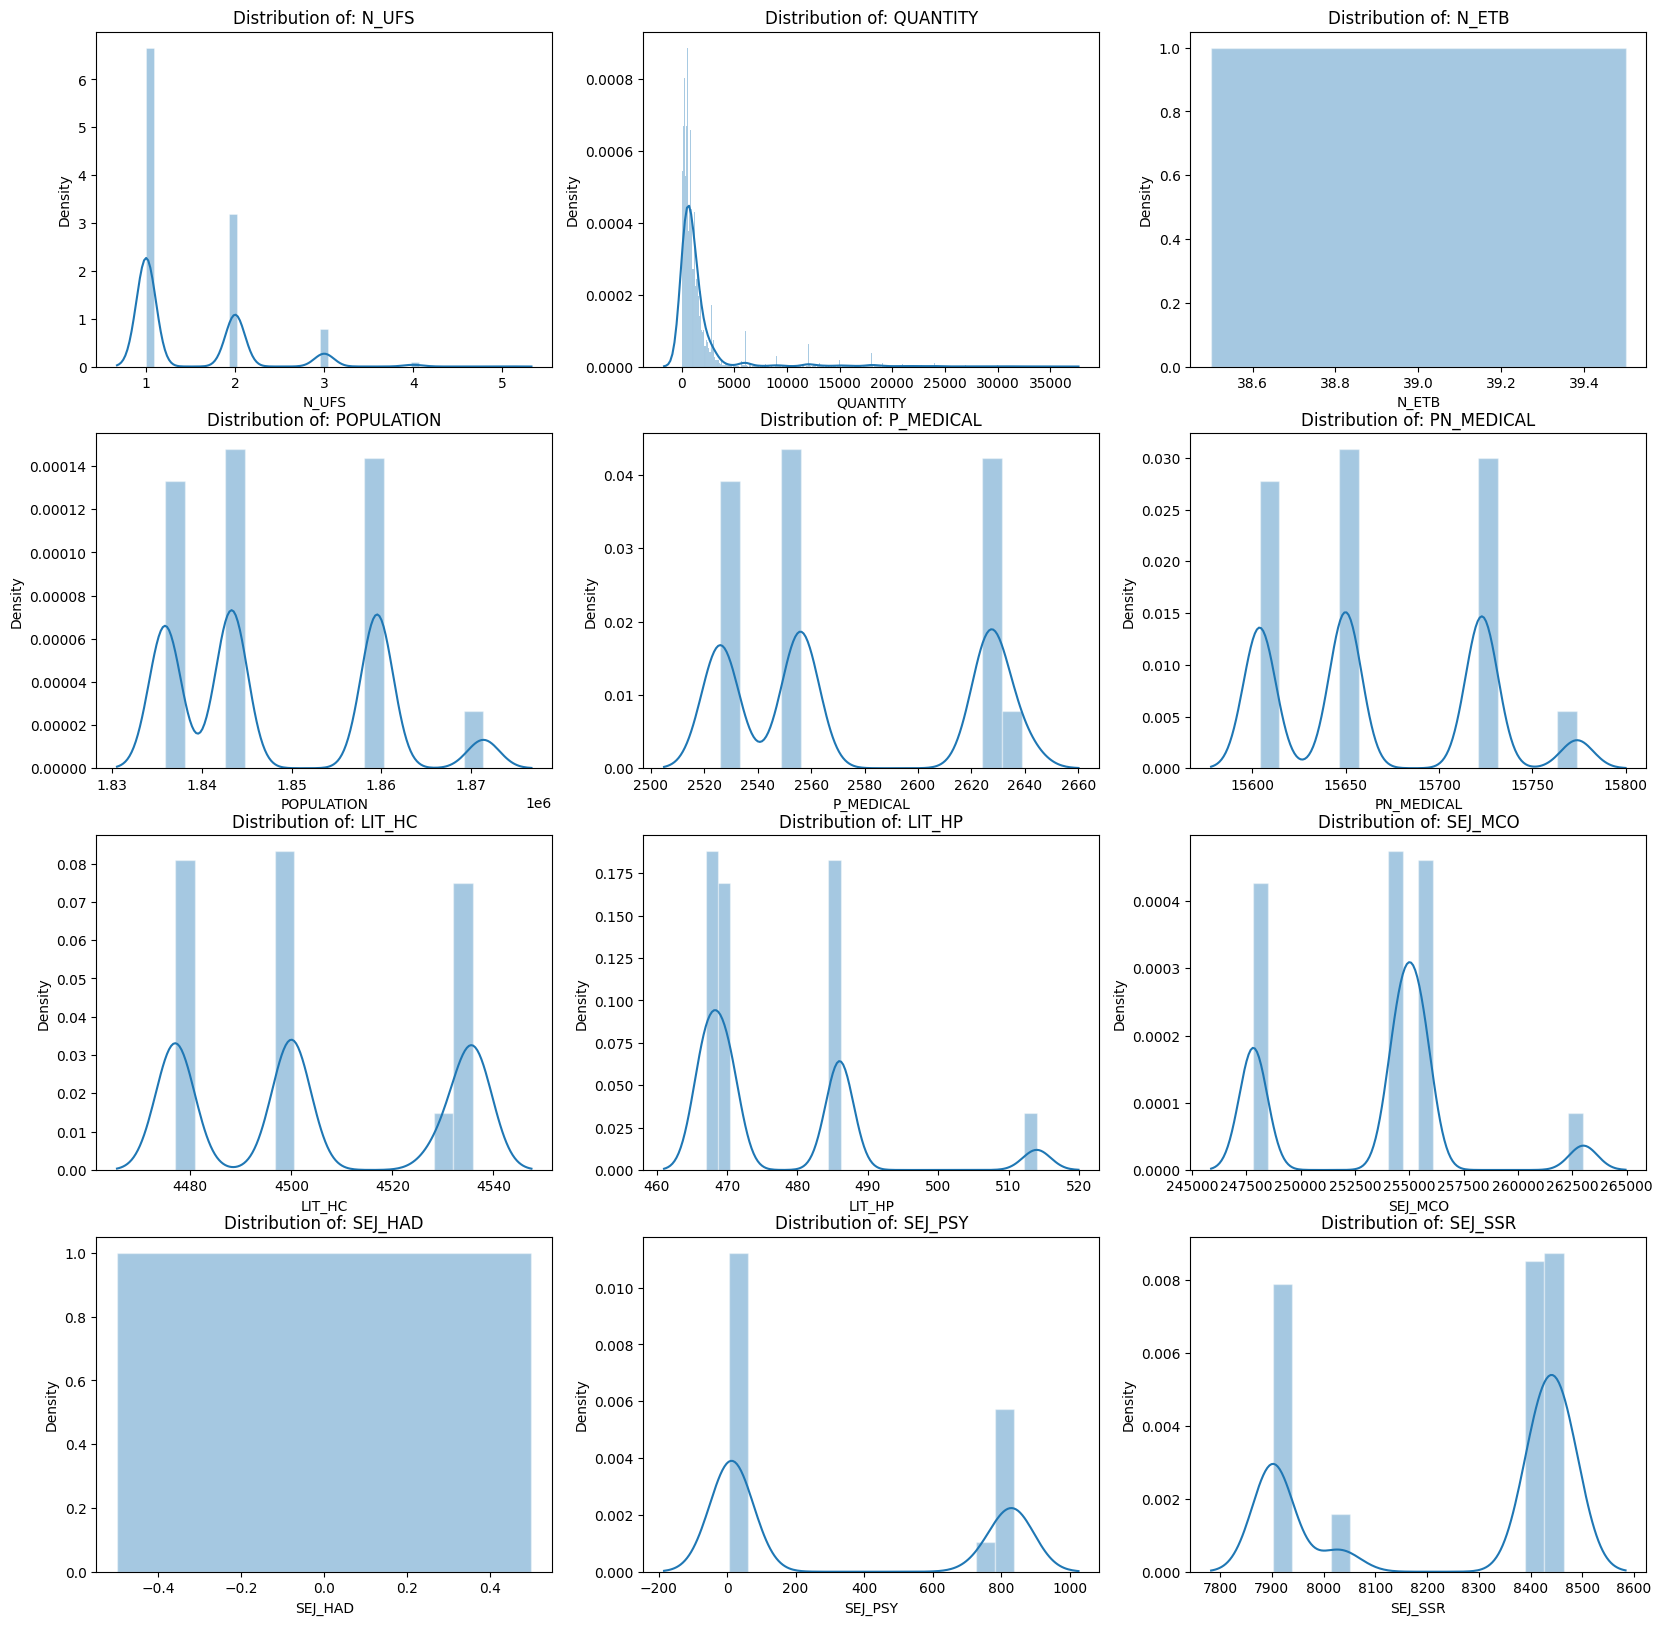

In [ ]:
# Hospital 4
visualize_distribution(df_h4_wo_outliers, numerical_features)

In [ ]:
for _, df in enumerate([df_h1_wo_outliers,df_h2_wo_outliers,df_h3_wo_outliers,df_h4_wo_outliers]):
  for column in categorical_features:
    df[column] = df[column].astype('string')

## 2.3 - Define common period for data usage

In [ ]:
df_h1_cp = df_h1_wo_outliers.copy()
df_h2_cp = df_h2_wo_outliers.copy()
df_h3_cp = df_h3_wo_outliers.copy()
df_h4_cp = df_h4_wo_outliers.copy()


## 2.4 - Fill gaps in data for eache medicine and for each hospital

## 2.5 - Aggregate data by drug, hospital, year and month

In [ ]:
def aggregate_dataframe(df):

    for column in categorical_features:
      df[column] = df[column].astype('string')

    df['DATE'] = df['DATE_MOUV'].dt.strftime('%Y-%m')
    df.drop('DATE_MOUV', axis=1, inplace=True)

    # Aggregating by "HOSPI_CODE_UCD", "YEAR", "MONTH", "ID_SITE_RATTACHE", summing the quantity
    df = df.groupby(["HOSPI_CODE_UCD", "YEAR", "MONTH"], as_index=False).agg({
        'QUANTITY': np.sum,
        'CODE_ATC': 'first',
        'N_UFS': np.median,
        'DATE':'first',
        'WEEK': 'first',
        'N_ETB': np.median,
        'POPULATION': np.median,
        'P_MEDICAL': np.median,
        'PN_MEDICAL': np.median,
        'LIT_HC': np.median,
        'LIT_HP': np.median,
        'SEJ_MCO': np.median,
        'SEJ_HAD': np.median,
        'SEJ_PSY': np.median,
        'SEJ_SSR': np.median,
        'SEJ_SLD': np.median
    })

    df.sort_values(by=['DATE'], inplace=True)
    df.reset_index(drop=True, inplace=True)

    return df

In [ ]:
df_h1_aggregated = aggregate_dataframe(df_h1_cp.copy())
df_h2_aggregated = aggregate_dataframe(df_h2_cp.copy())
df_h3_aggregated = aggregate_dataframe(df_h3_cp.copy())
df_h4_aggregated = aggregate_dataframe(df_h4_cp.copy())

## 2.6 - Visualize period and replace outliers with median

In [ ]:
def replace_numerical_outliers(df, column_name):
  for medicine in df.HOSPI_CODE_UCD.unique():
      subset = df[df['HOSPI_CODE_UCD'] == medicine]
      q1 = subset[column_name].quantile(0.25)
      q3 = subset[column_name].quantile(0.75)
      iqr = q3 - q1
      lower_bound = q1 - 1.5 * iqr
      upper_bound = q3 + 1.5 * iqr
      outliers = (subset[column_name] < lower_bound) | (subset[column_name] > upper_bound)
      subset.loc[outliers, column_name] = subset[column_name].median()
      df.update(subset)

In [ ]:
df_h1_resampled = df_h1_aggregated.copy()
df_h2_resampled = df_h2_aggregated.copy()
df_h3_resampled = df_h3_aggregated.copy()
df_h4_resampled = df_h4_aggregated.copy()

replace_numerical_outliers(df_h1_resampled, 'QUANTITY')
replace_numerical_outliers(df_h2_resampled, 'QUANTITY')
replace_numerical_outliers(df_h3_resampled, 'QUANTITY')
replace_numerical_outliers(df_h4_resampled, 'QUANTITY')

In [ ]:
def plot_quantity(df):
  for medicine in df.HOSPI_CODE_UCD.unique():
    x = df[df["HOSPI_CODE_UCD"] == medicine]["DATE"].copy()
    y = df[df["HOSPI_CODE_UCD"] == medicine]["QUANTITY"].copy()

    plt.figure(figsize=(20, 6))  # Set the figure size

    plt.scatter(x, y,
                s=50)  # Use color argument to assign different colors to each series

    plt.xticks(rotation=45)  # Rotate x-axis tick labels by 45 degrees

    plt.xlabel('DATE')  # Set x-axis label
    plt.ylabel('QUANTITY')  # Set y-axis label

    plt.title(f'Scatter Plot of Quantity vs. Date for medicine {medicine}')  # Set the title of the plot

    plt.grid(True)  # Display grid lines

    plt.show()  # Display the plot

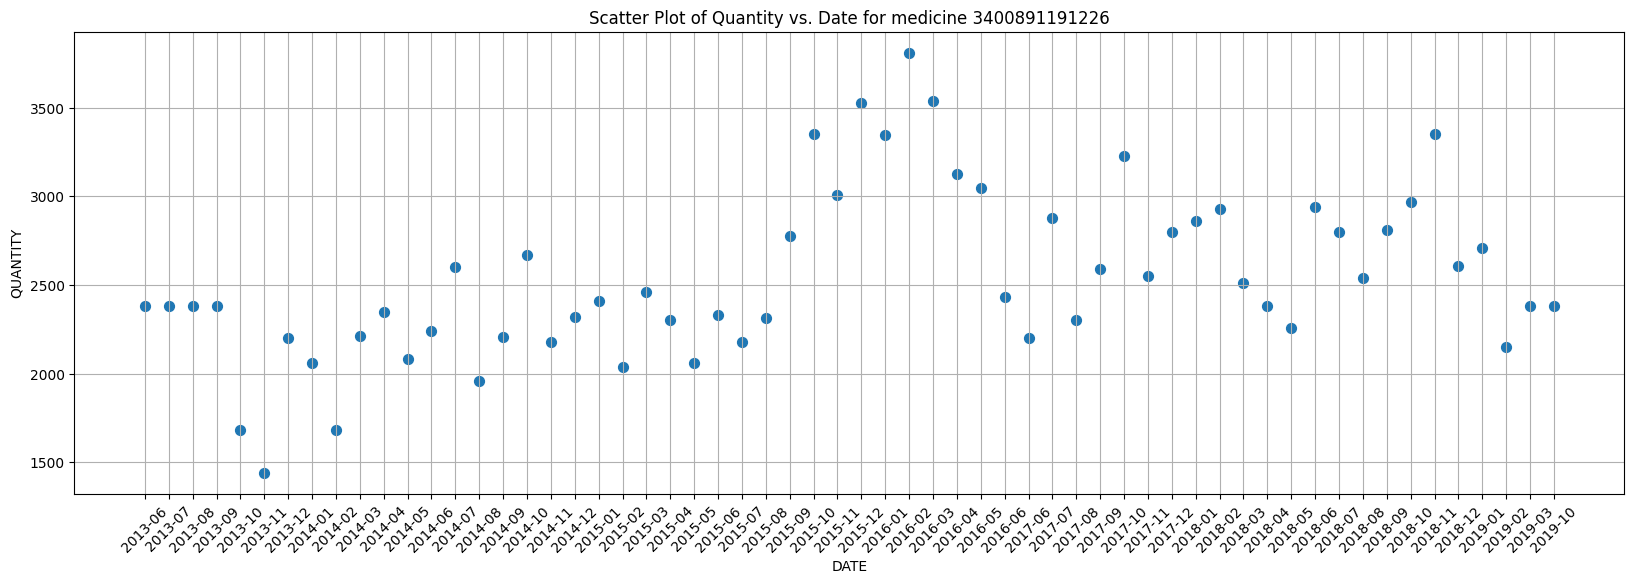

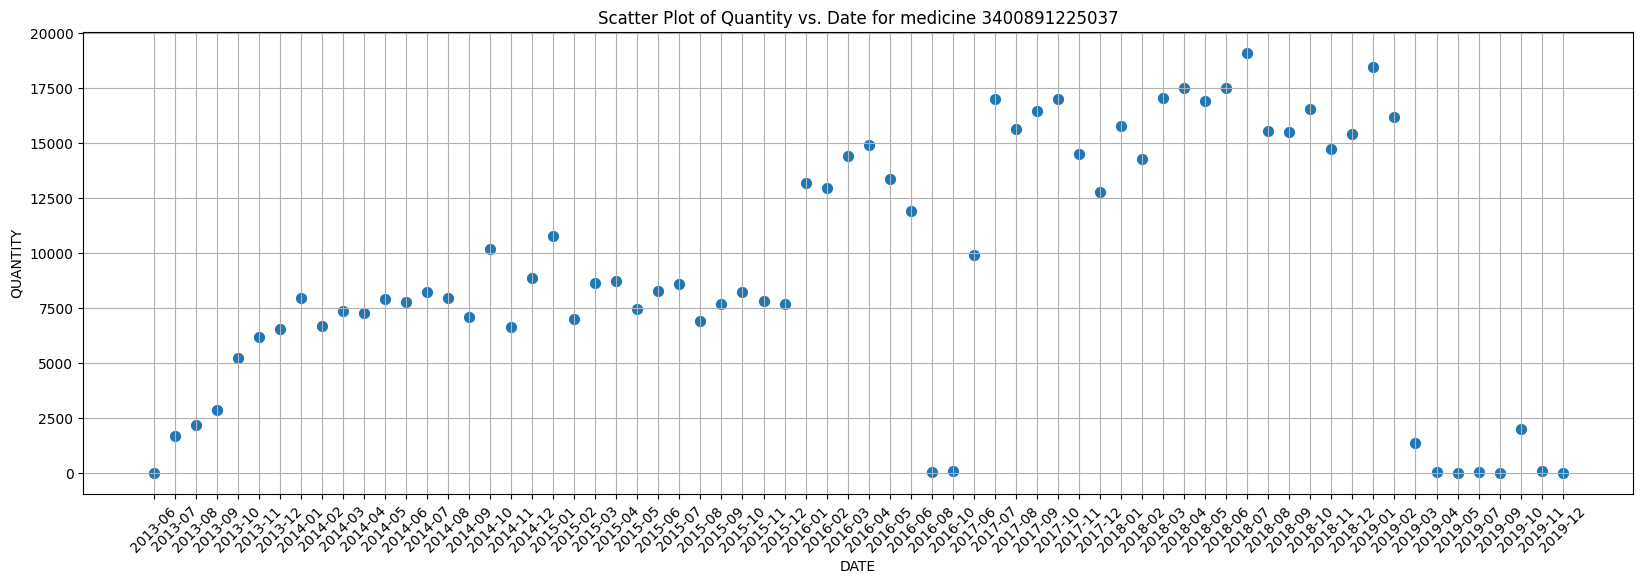

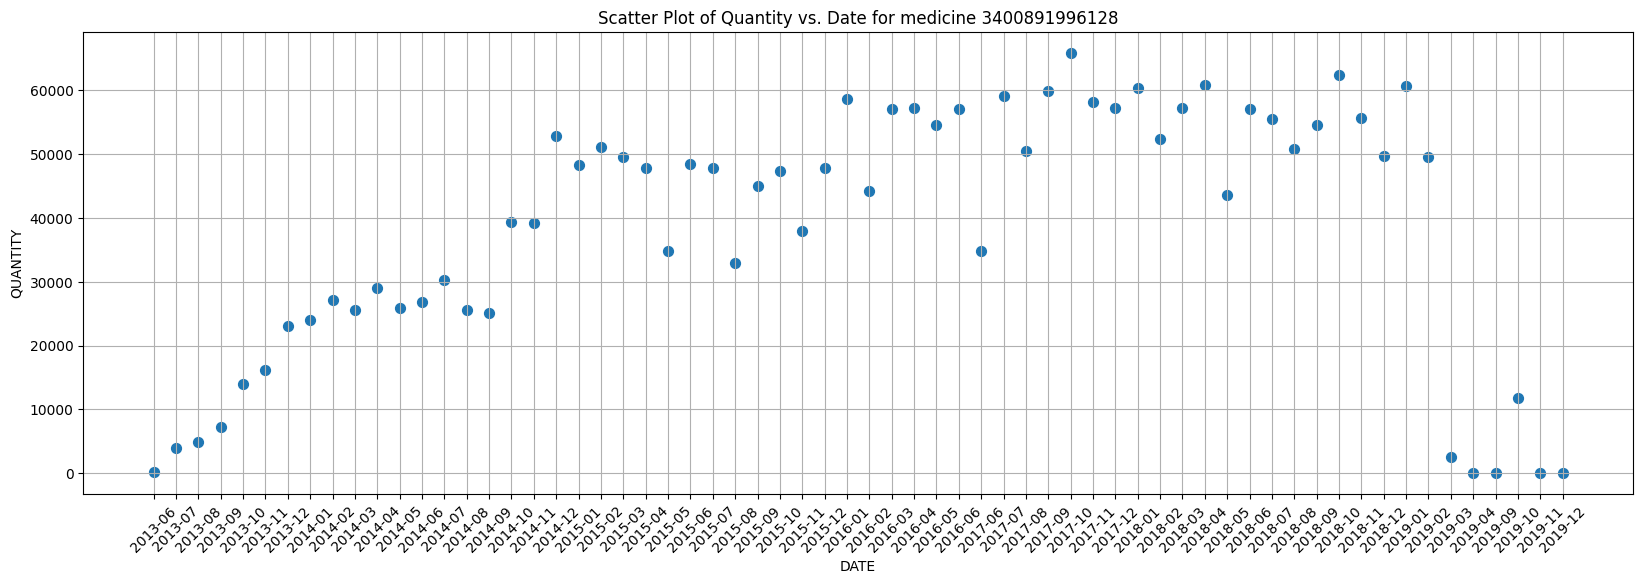

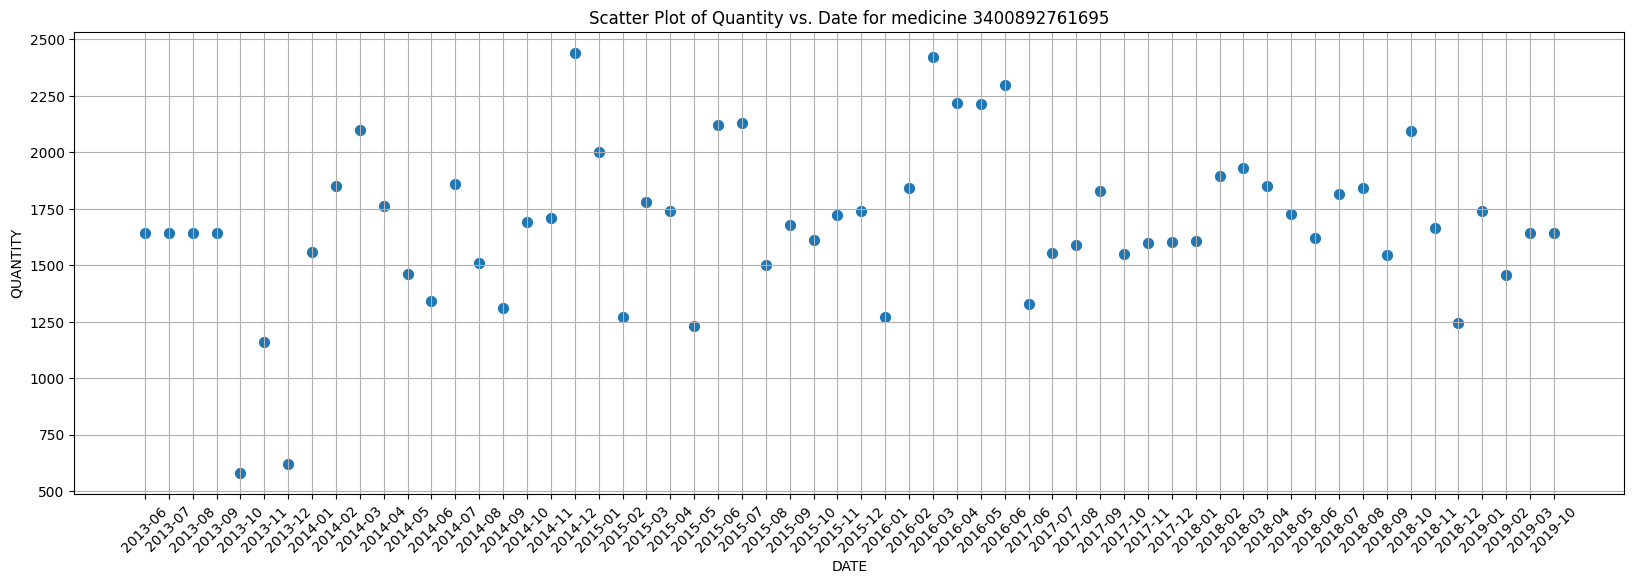

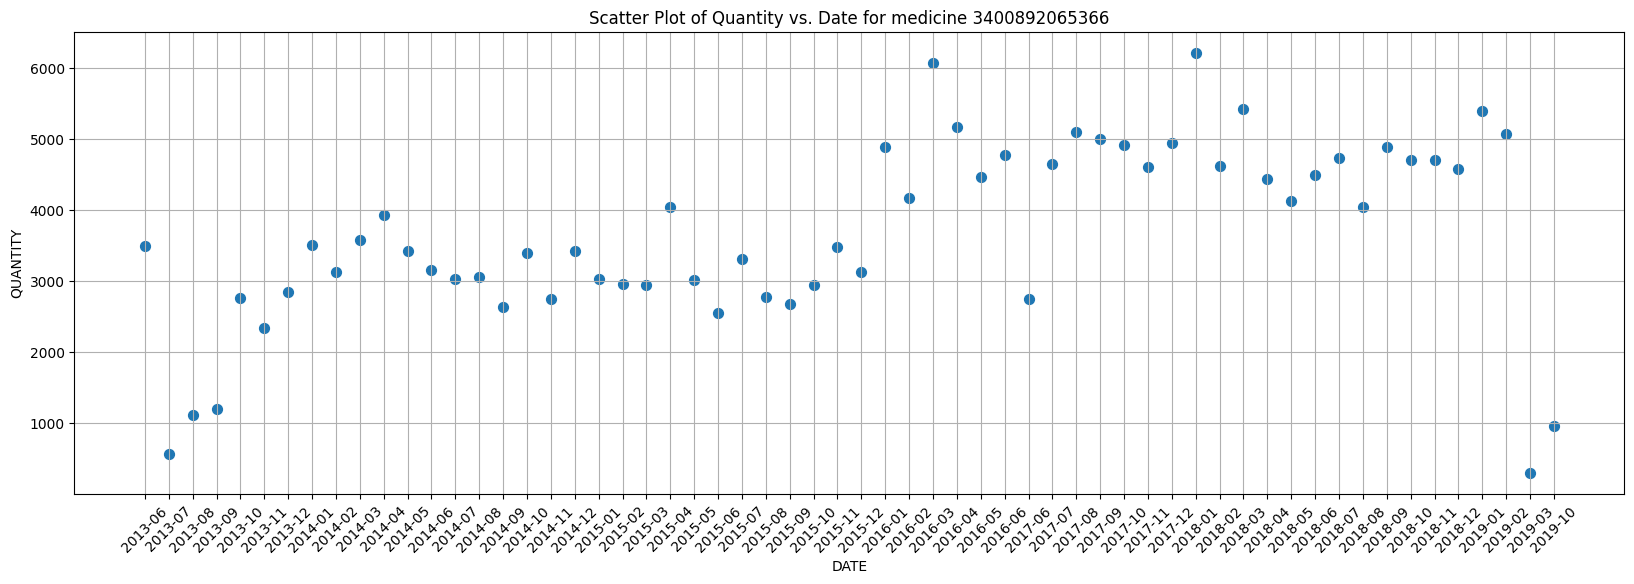

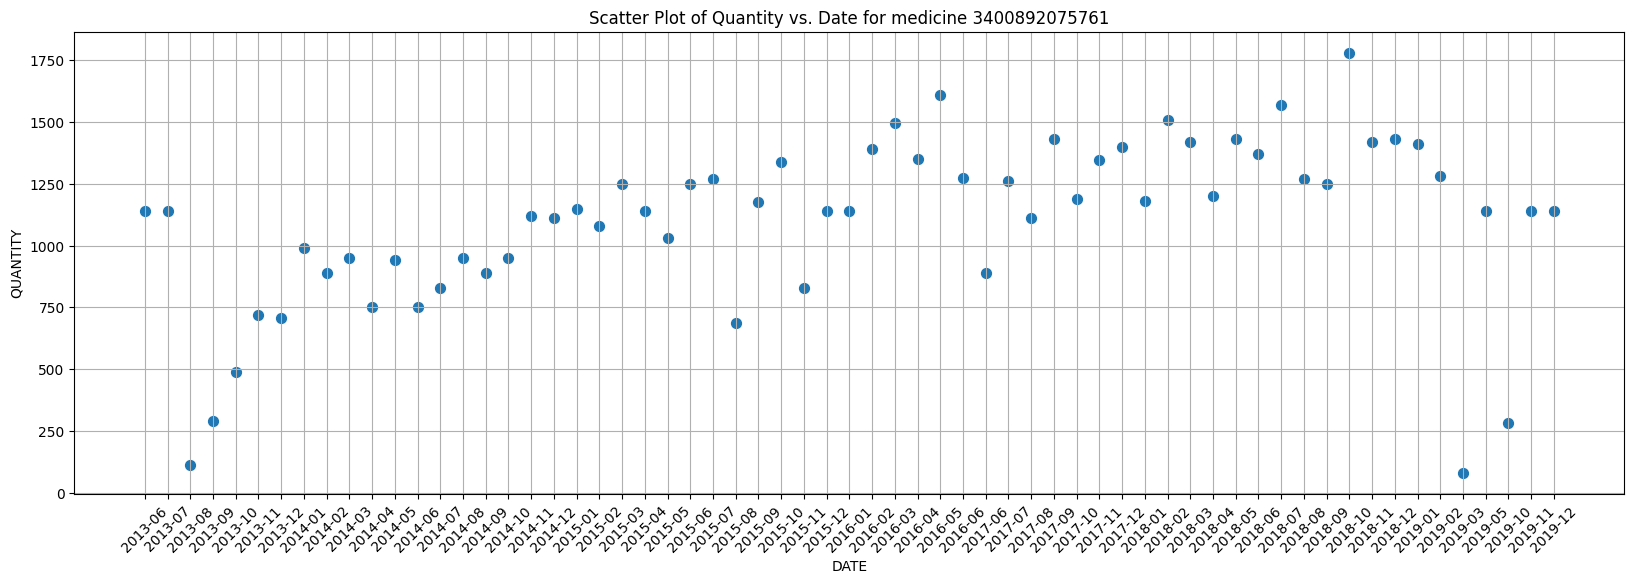

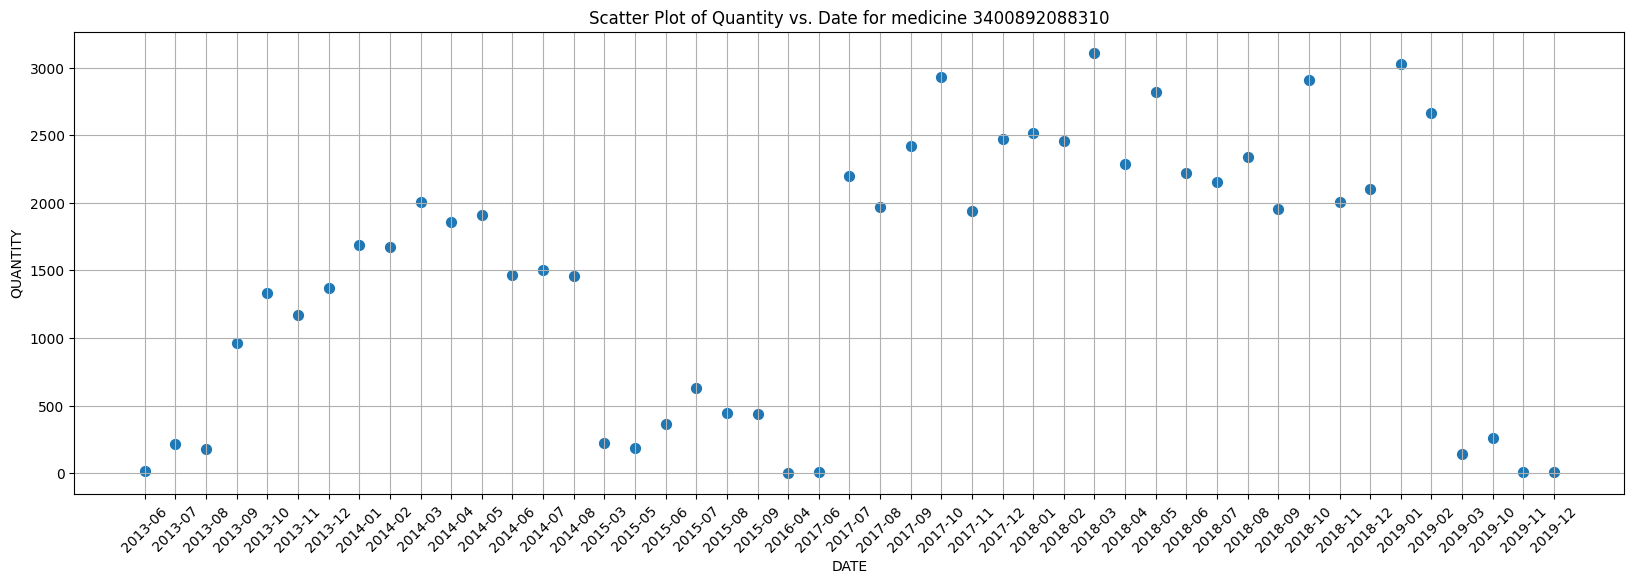

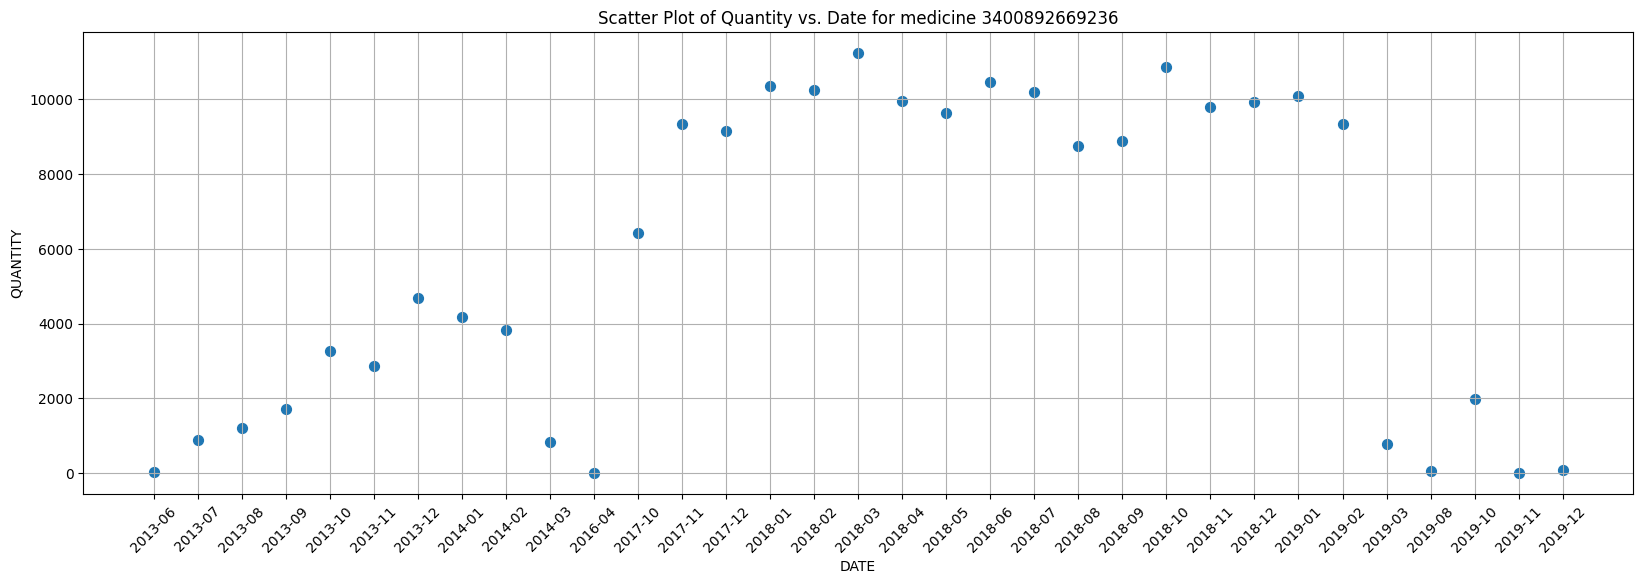

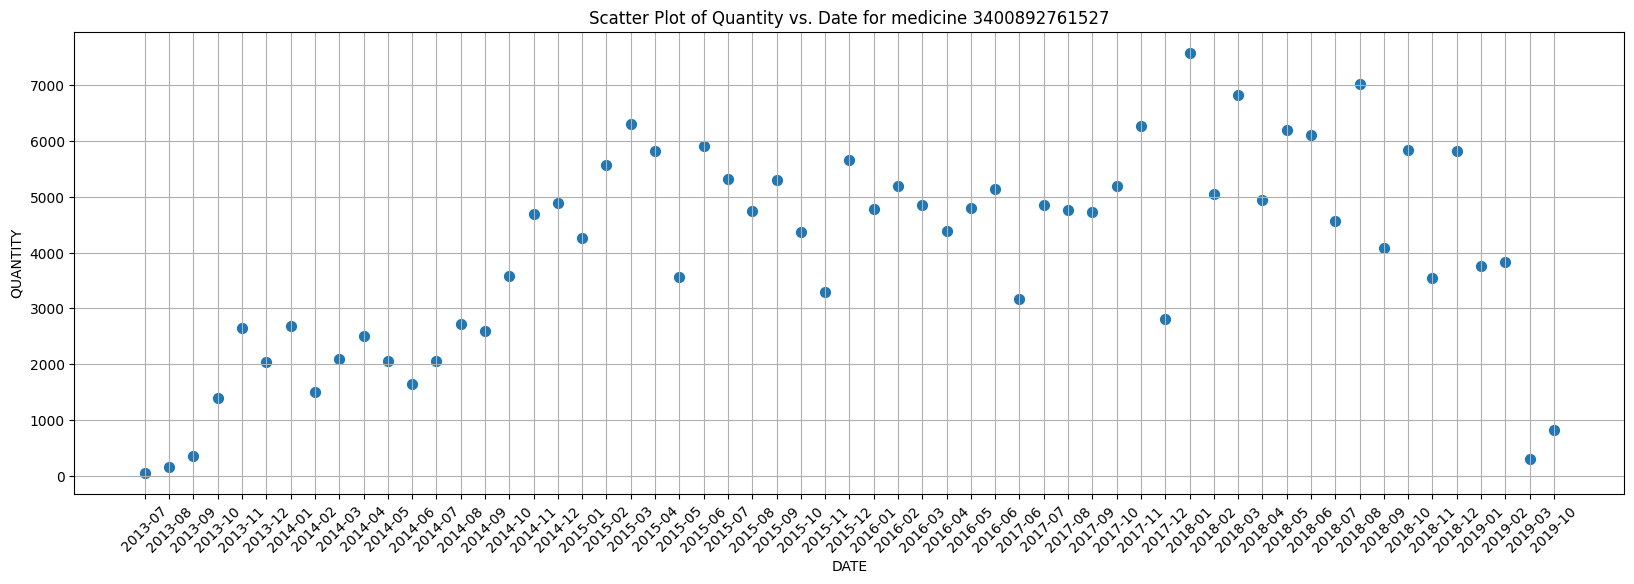

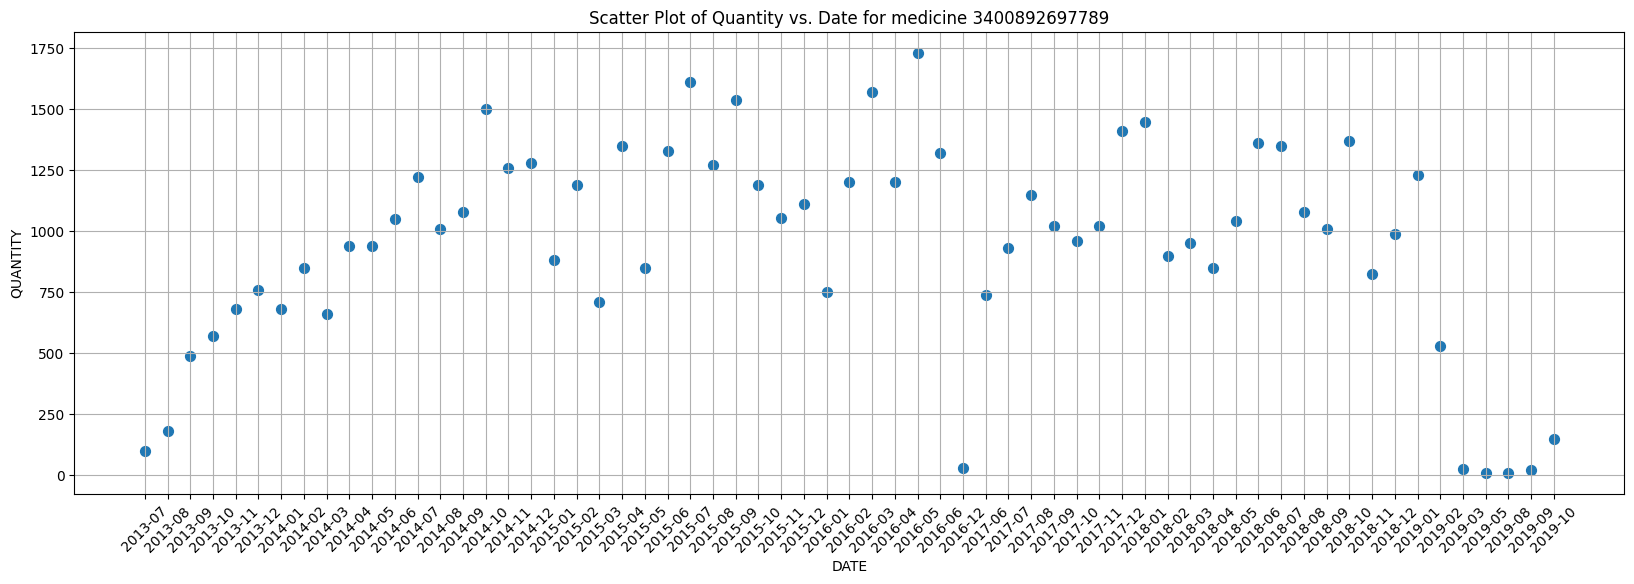

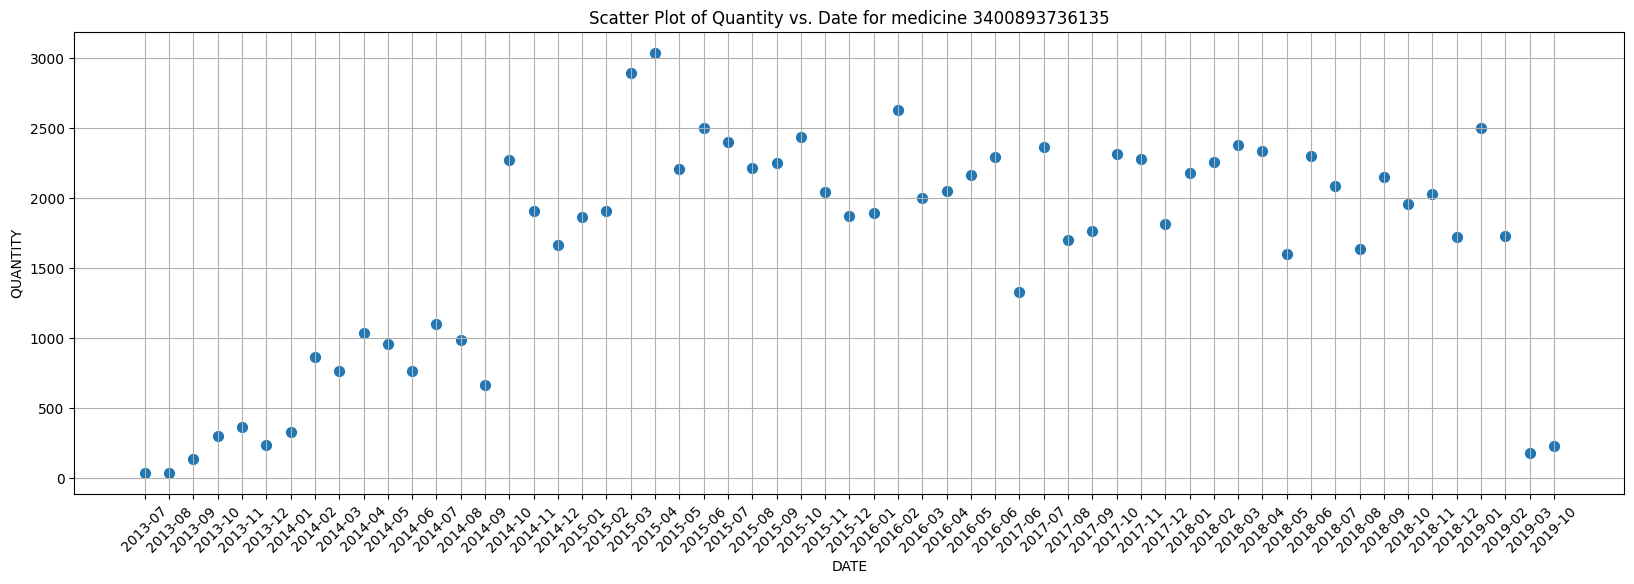

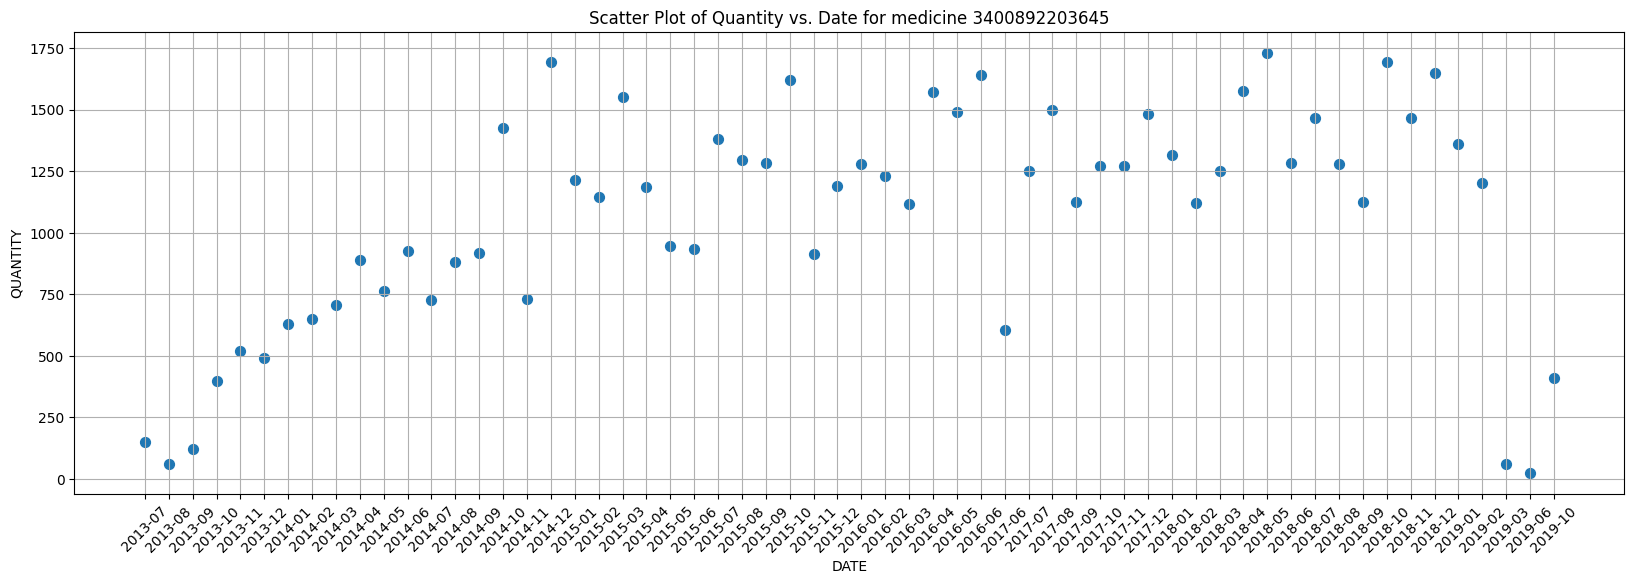

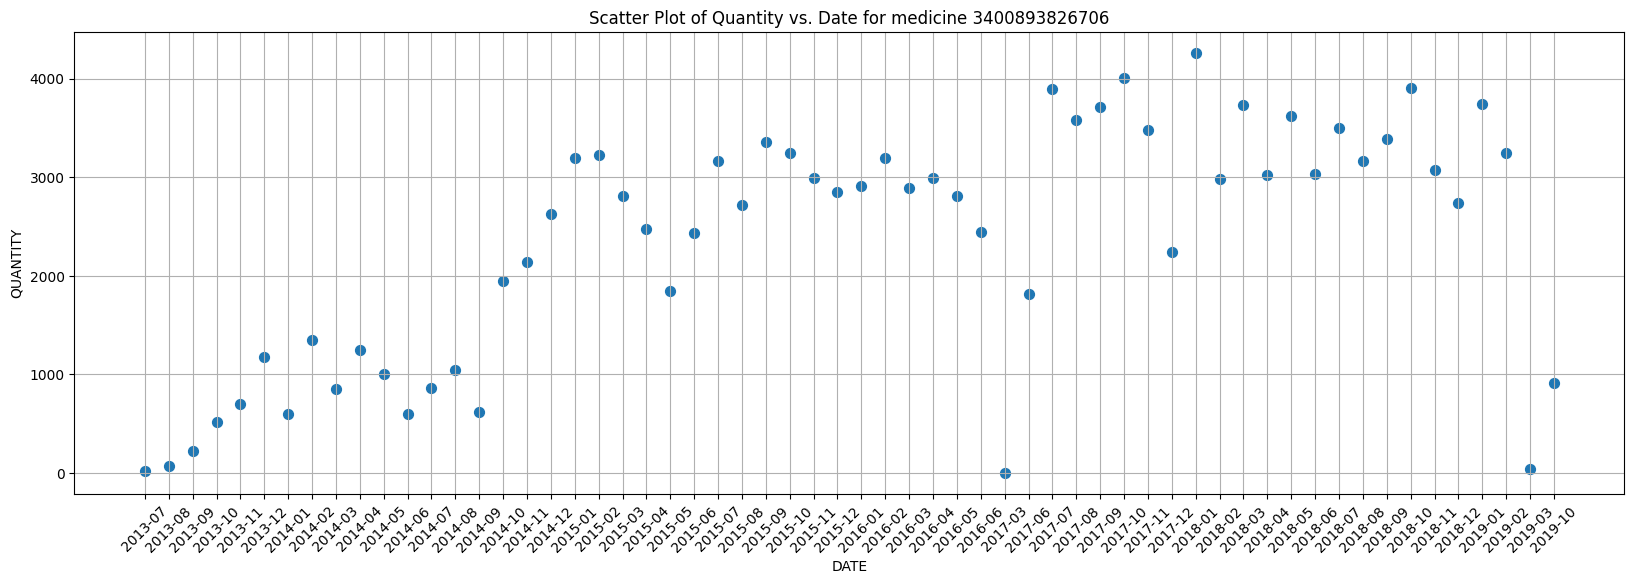

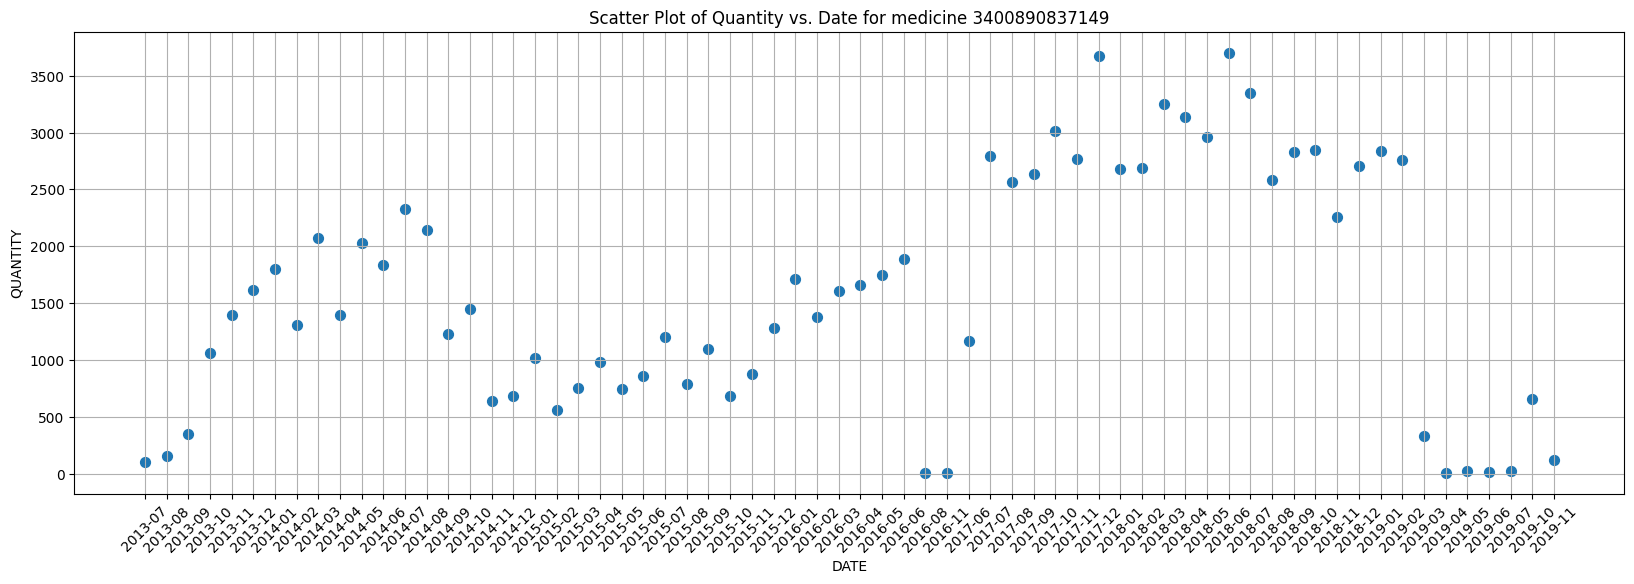

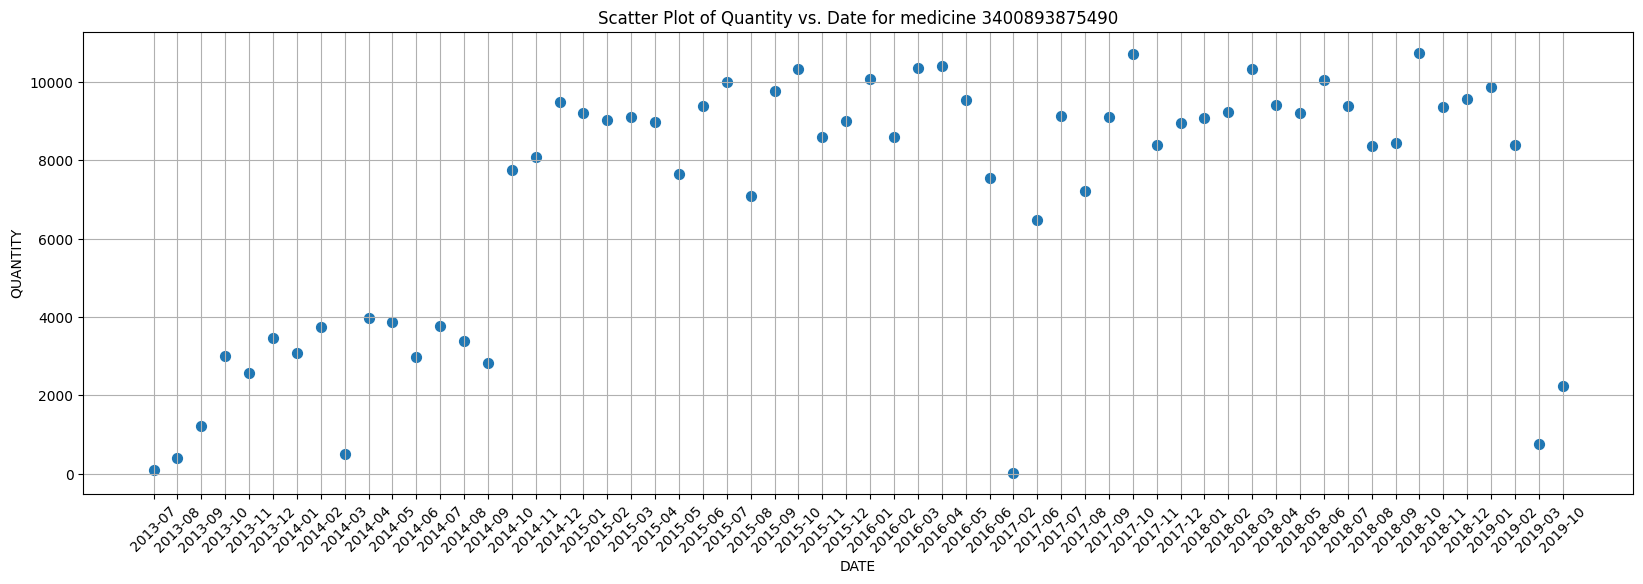

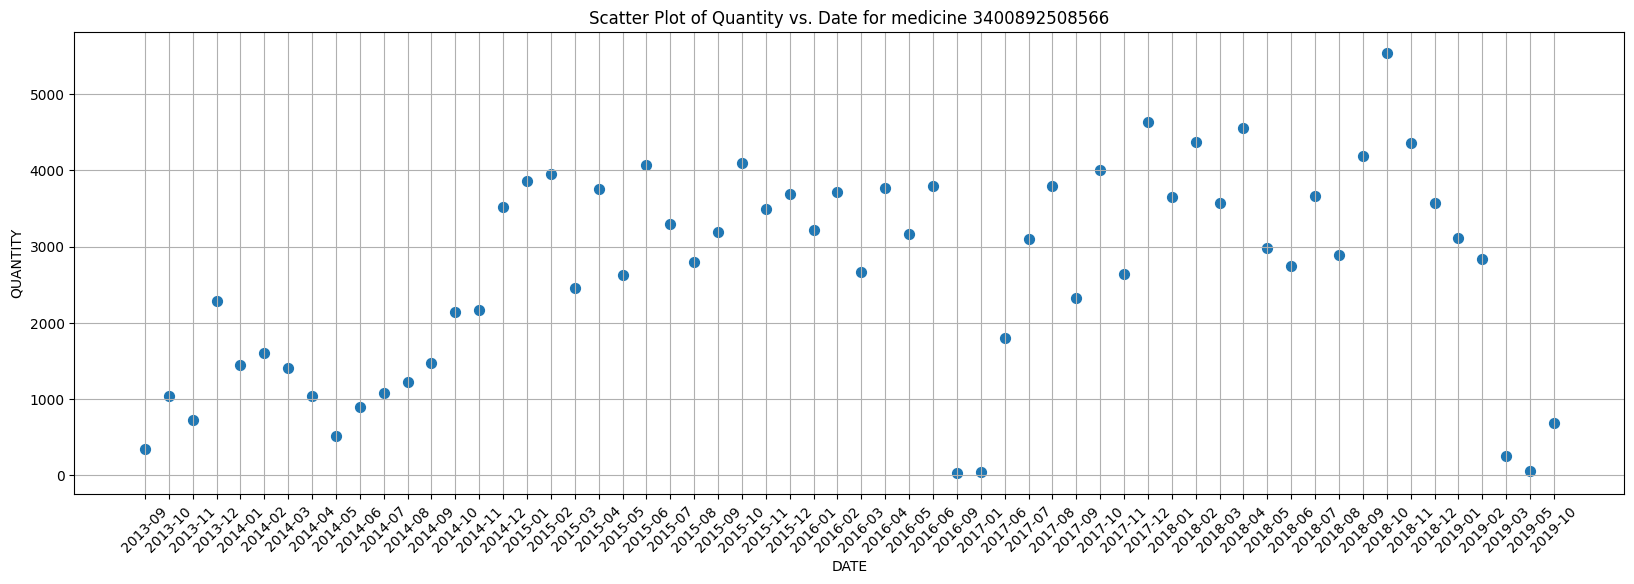

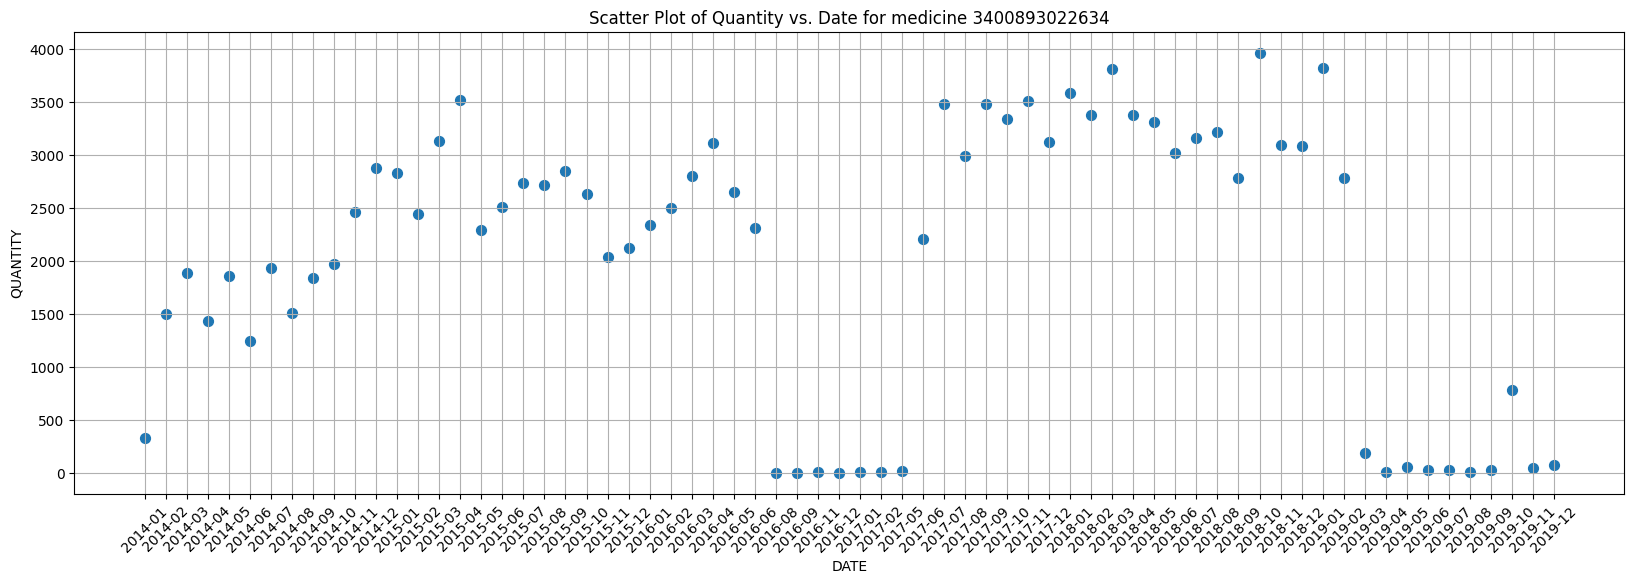

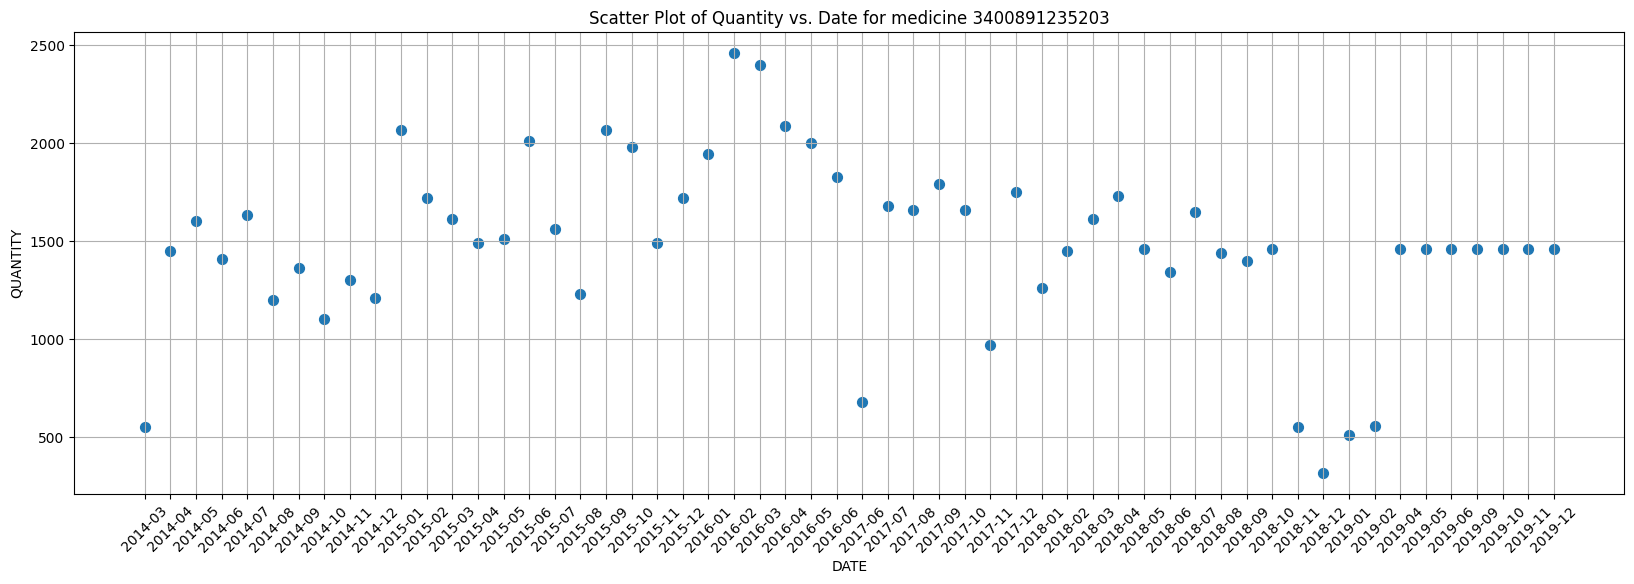

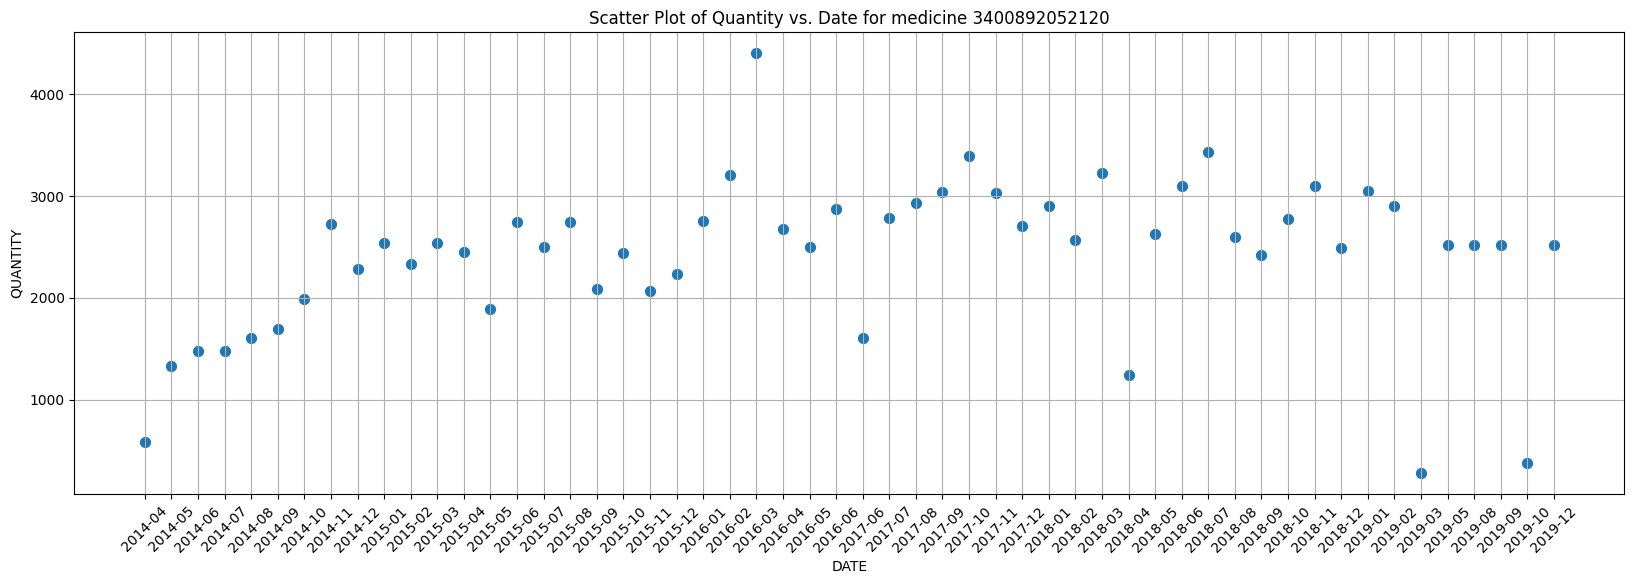

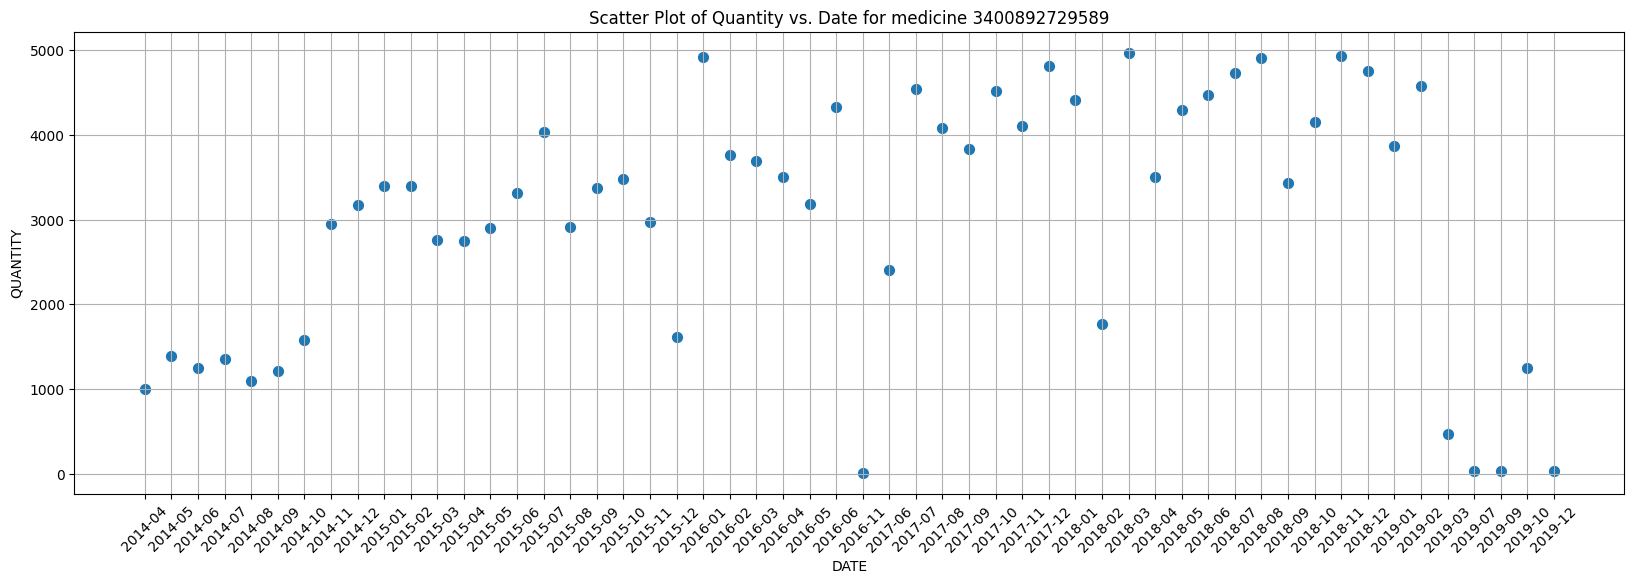

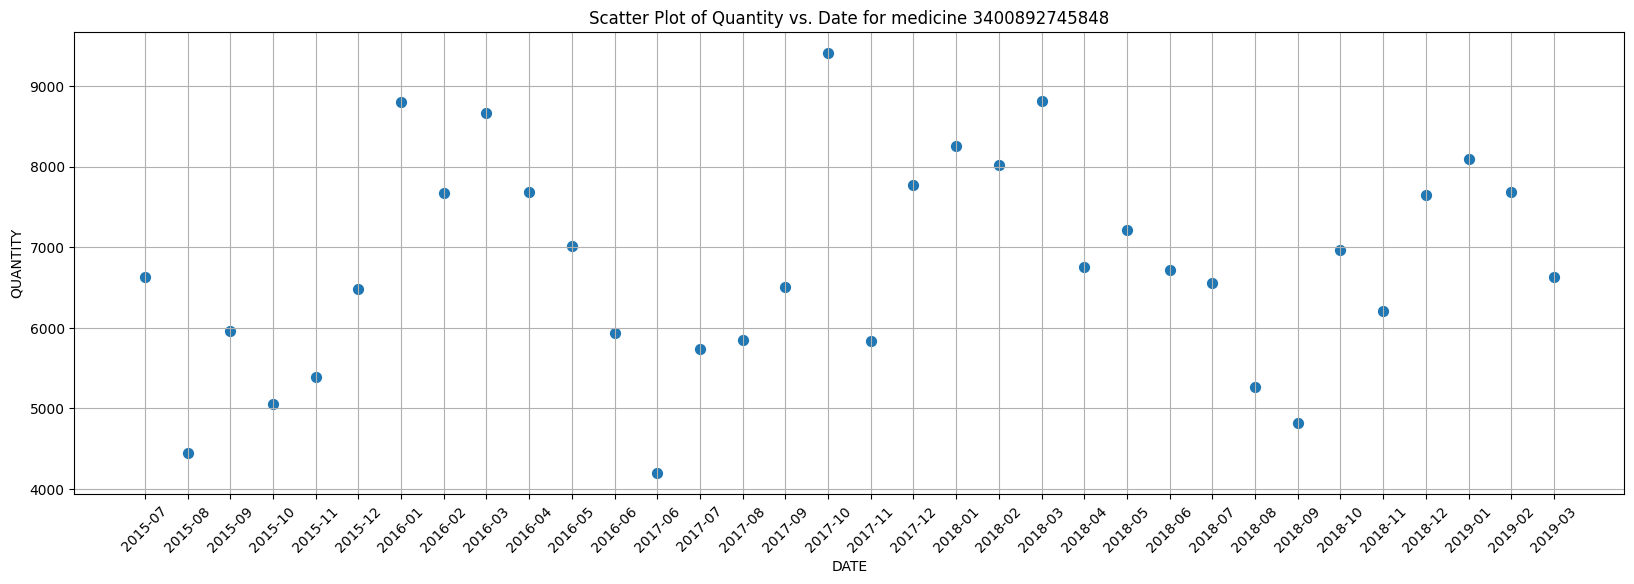

In [ ]:
plot_quantity(df_h1_resampled)

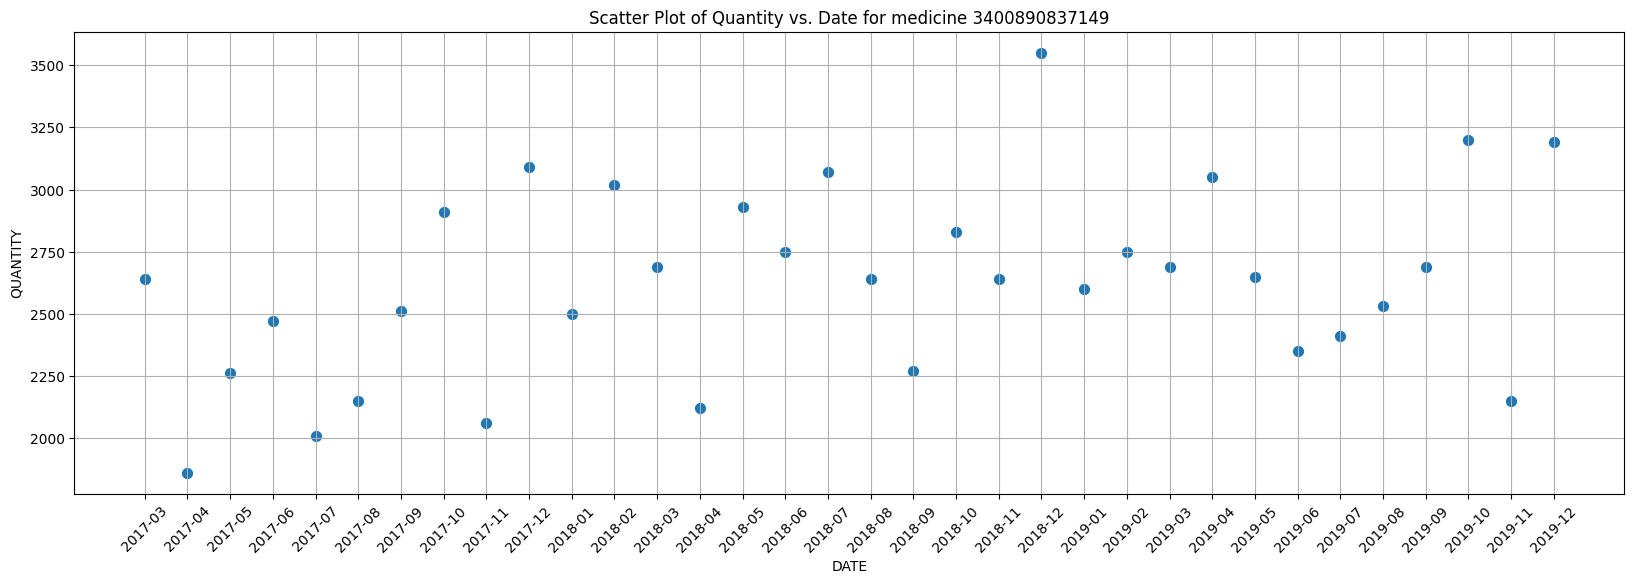

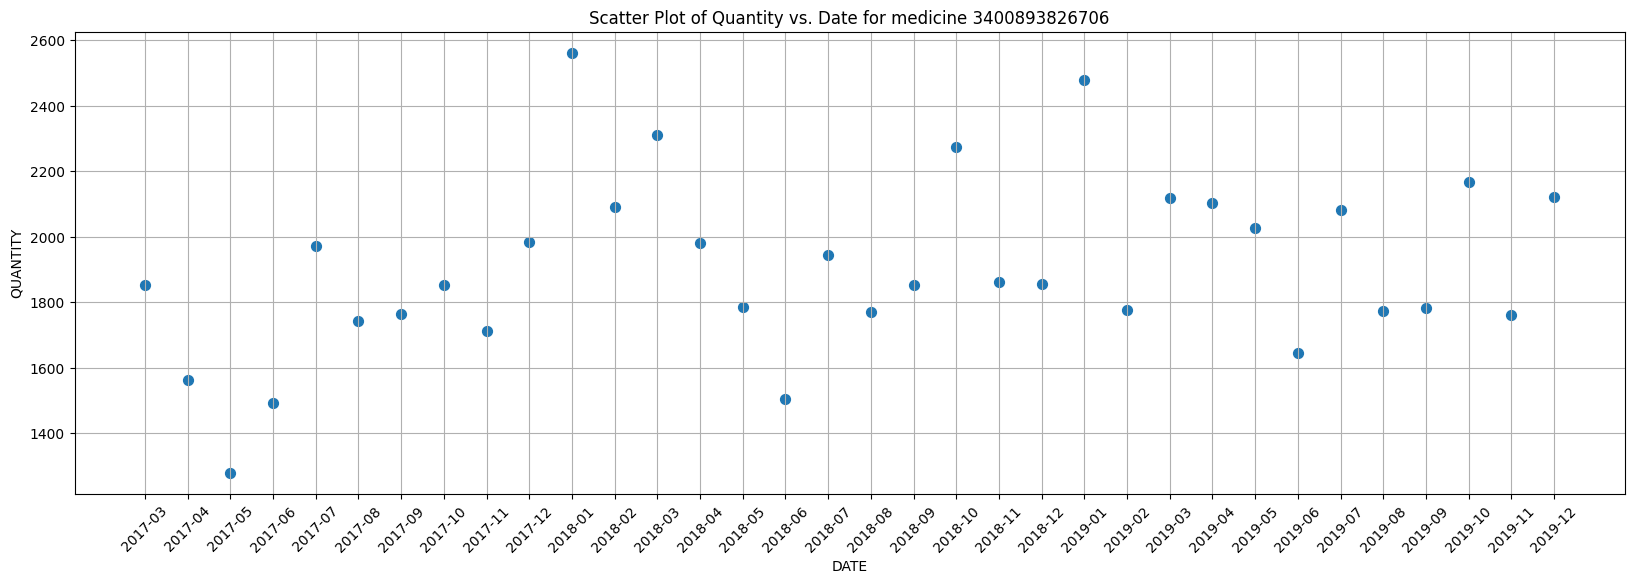

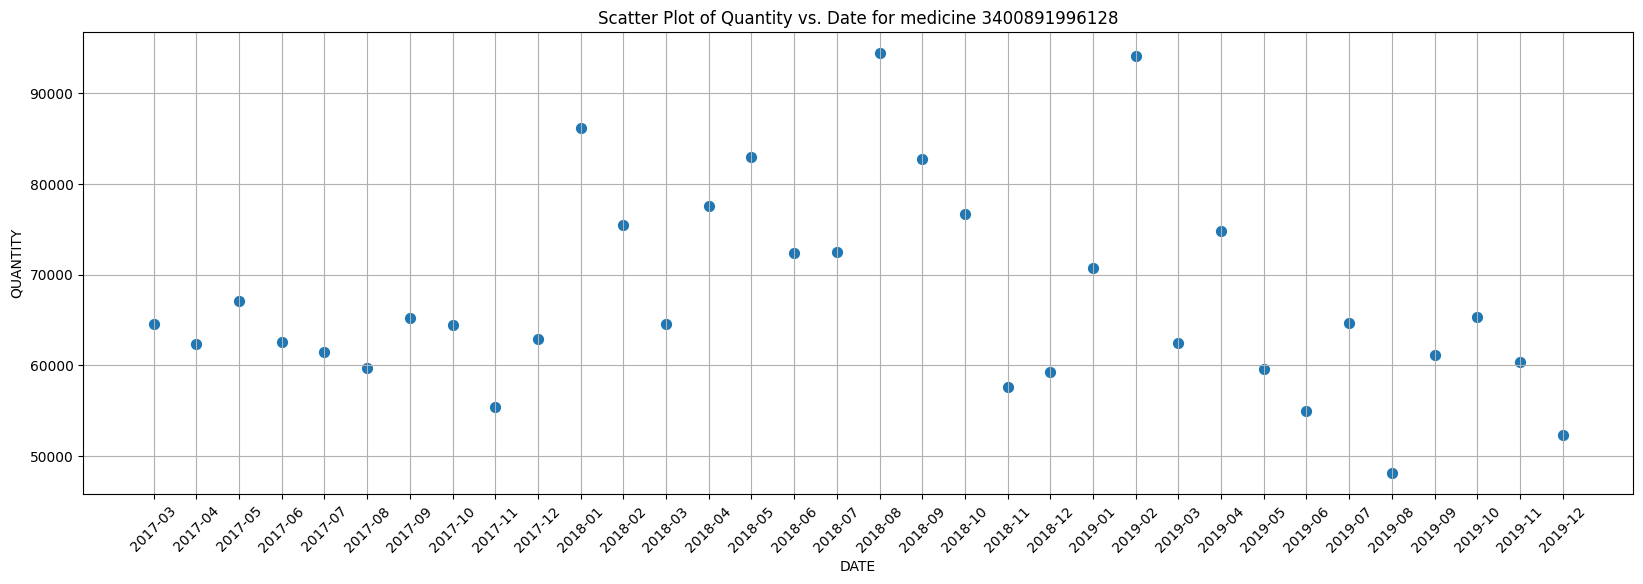

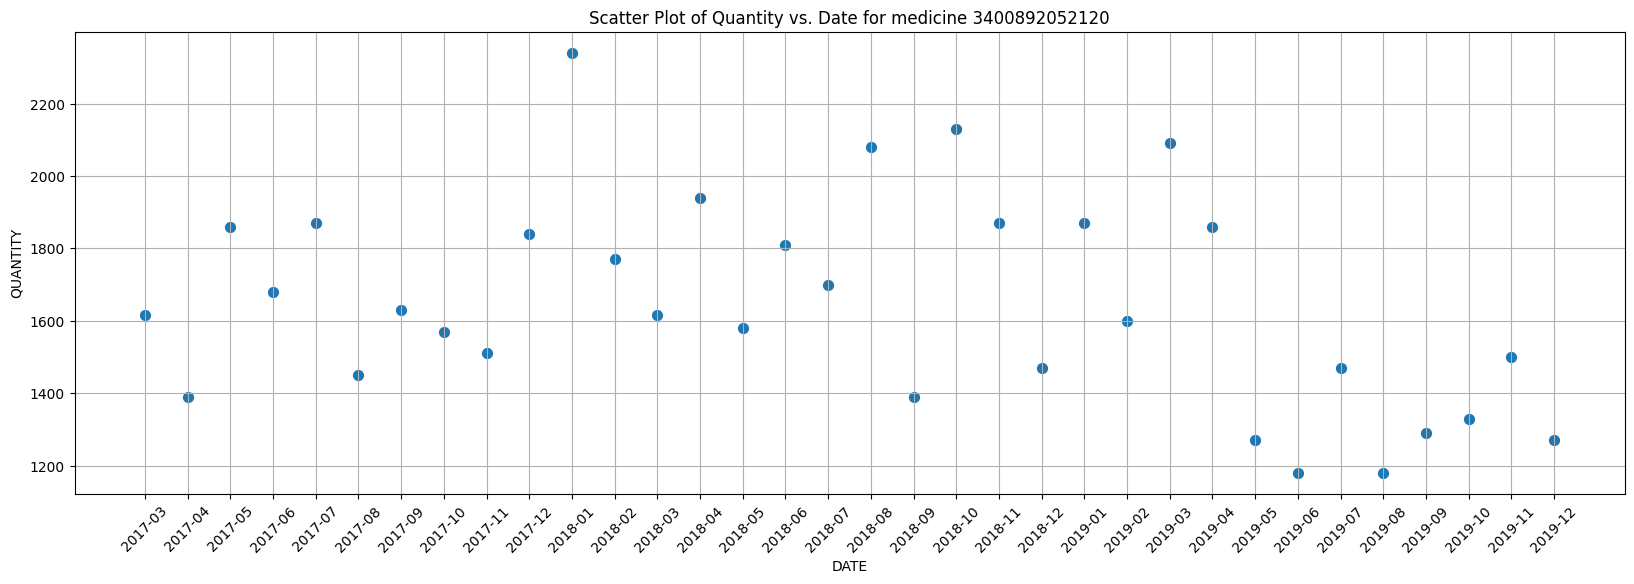

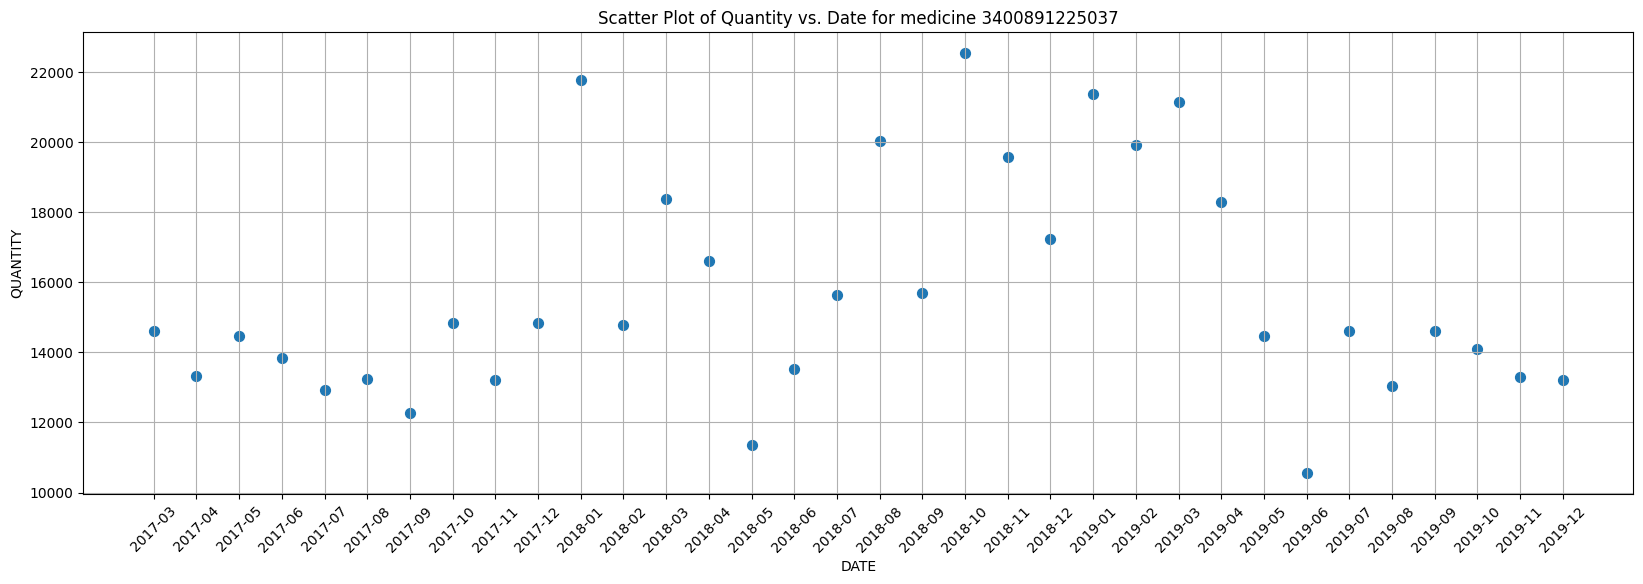

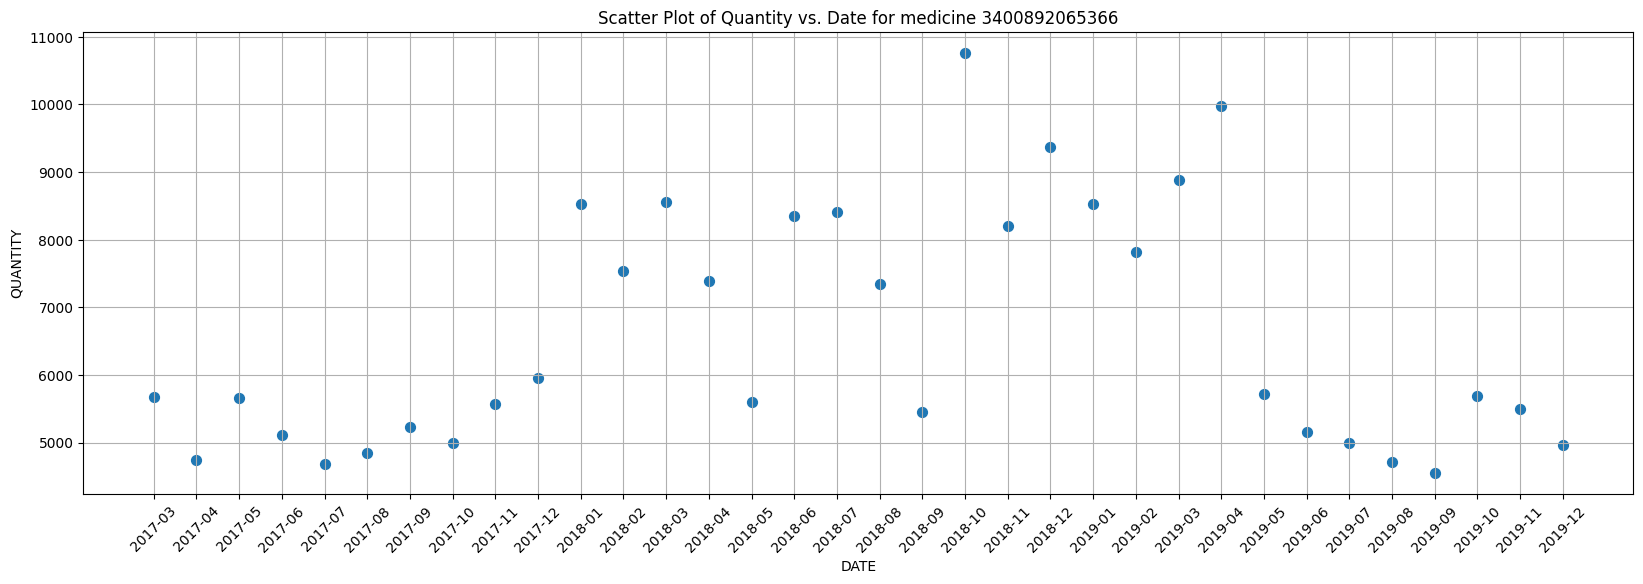

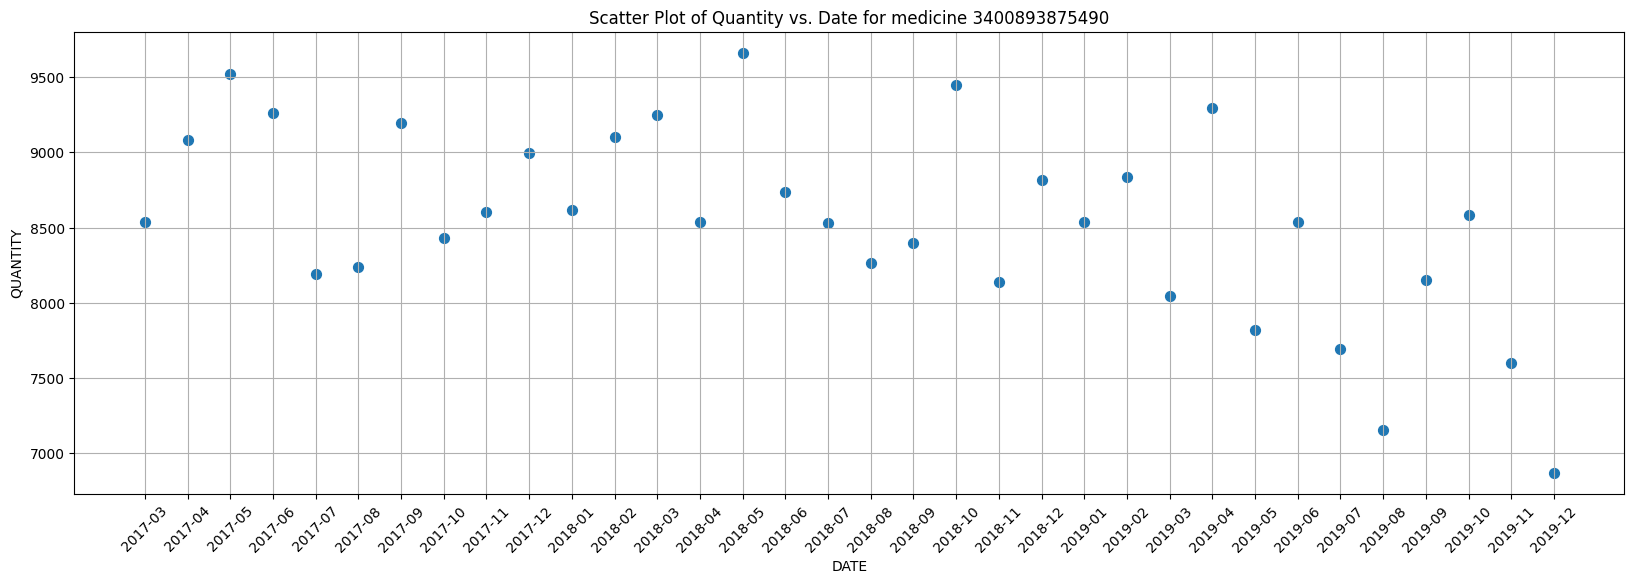

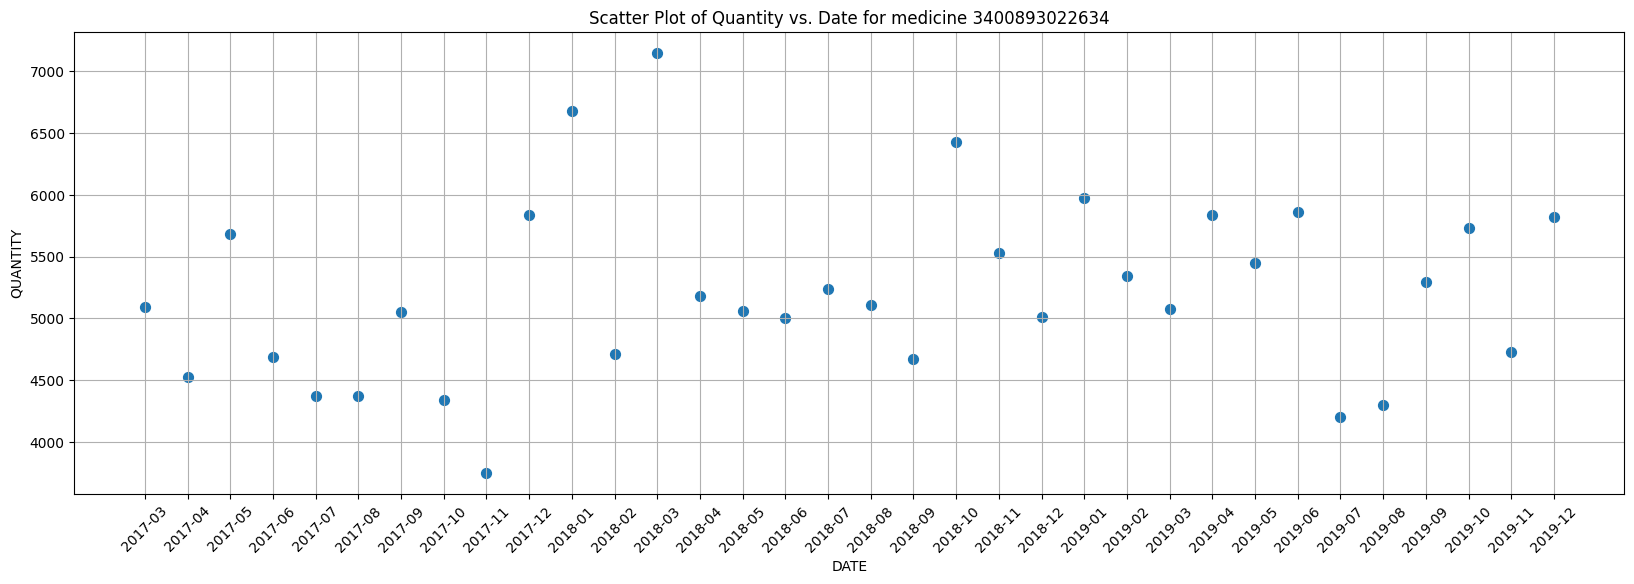

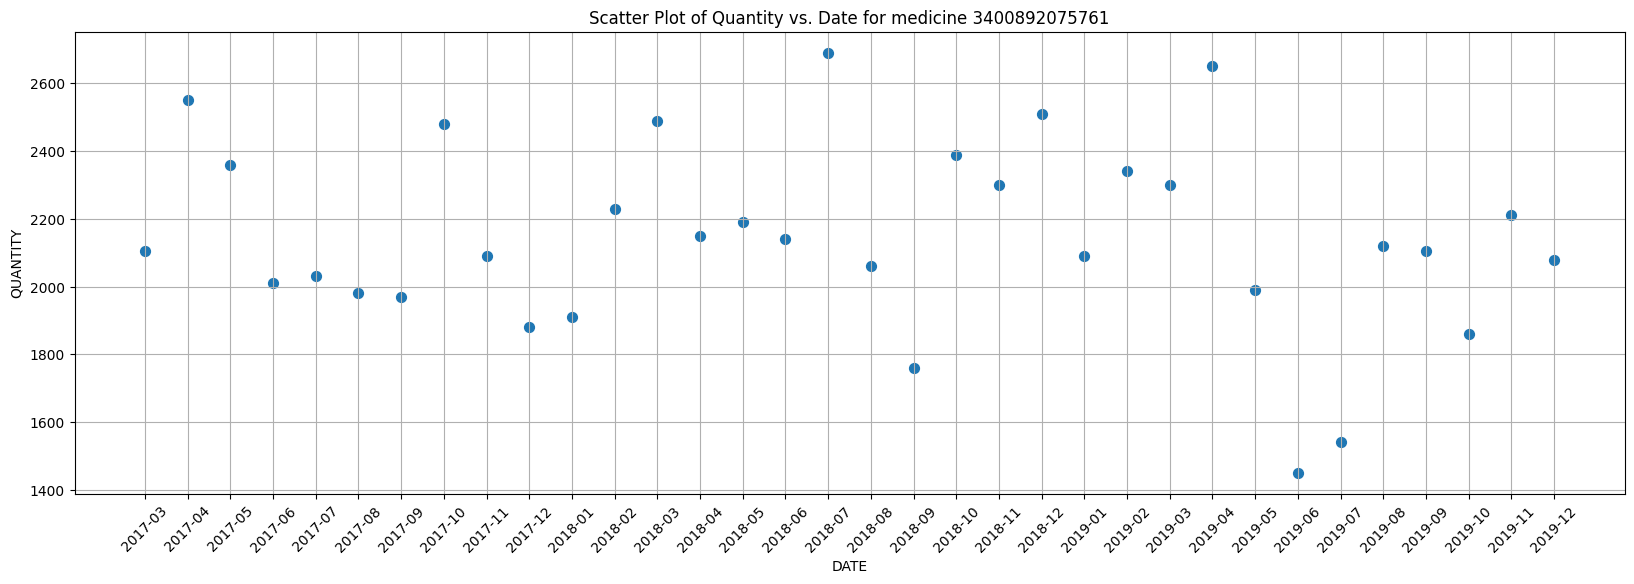

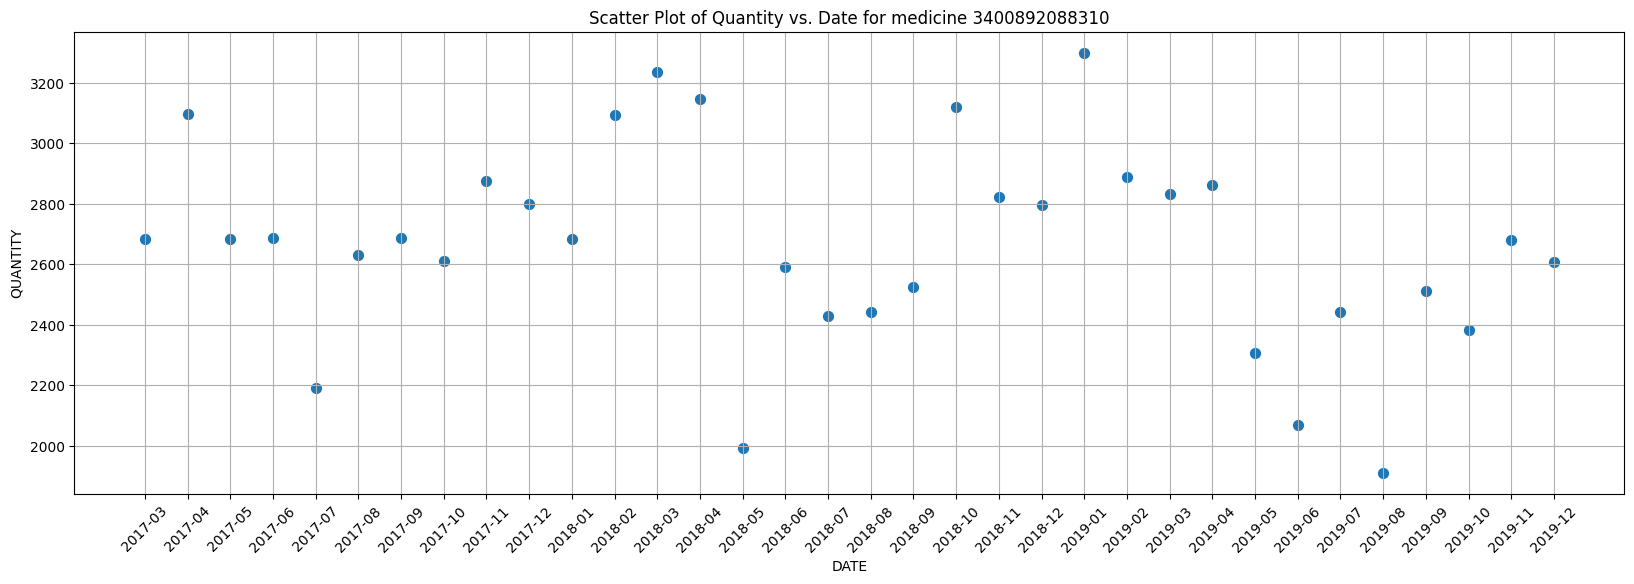

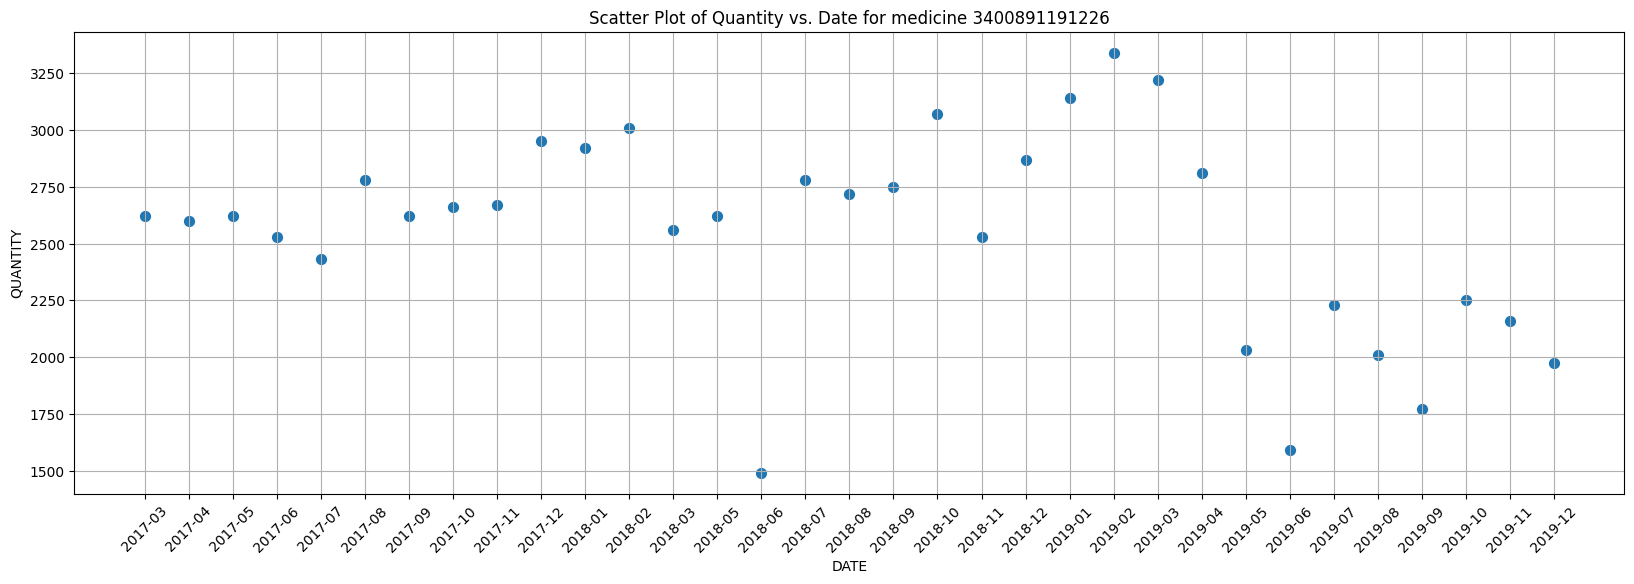

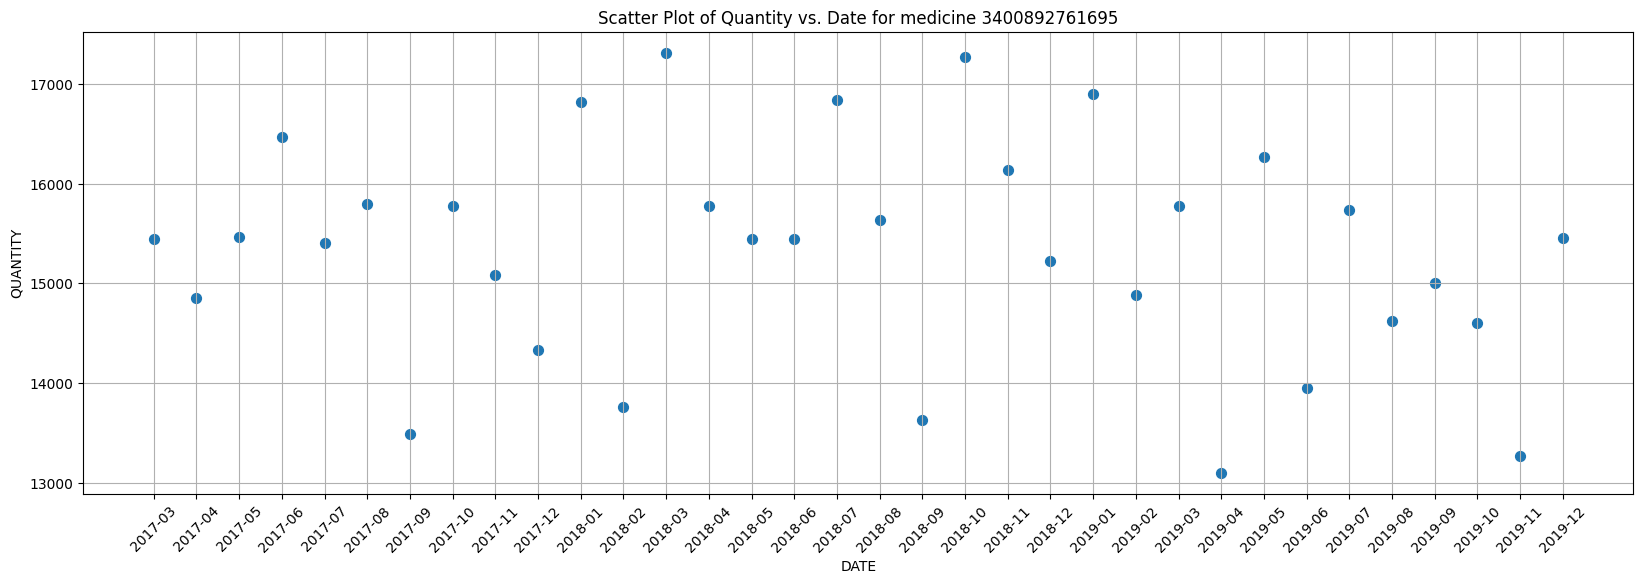

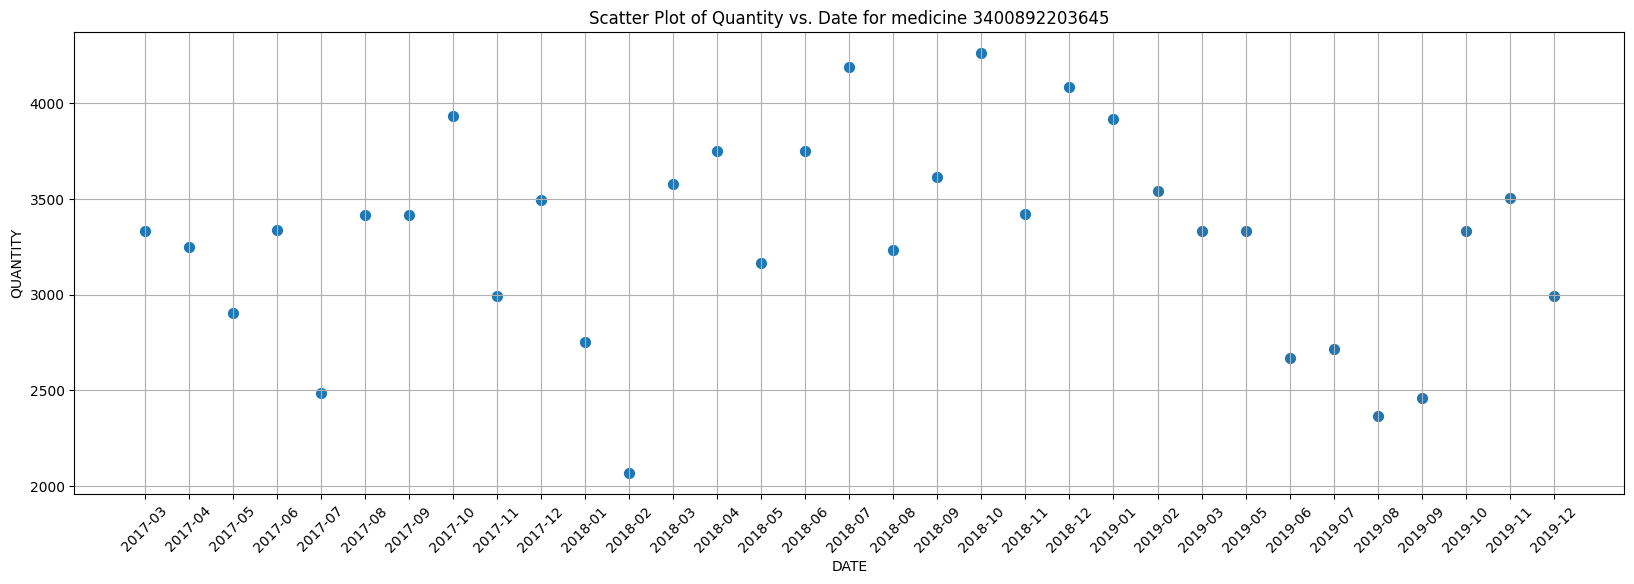

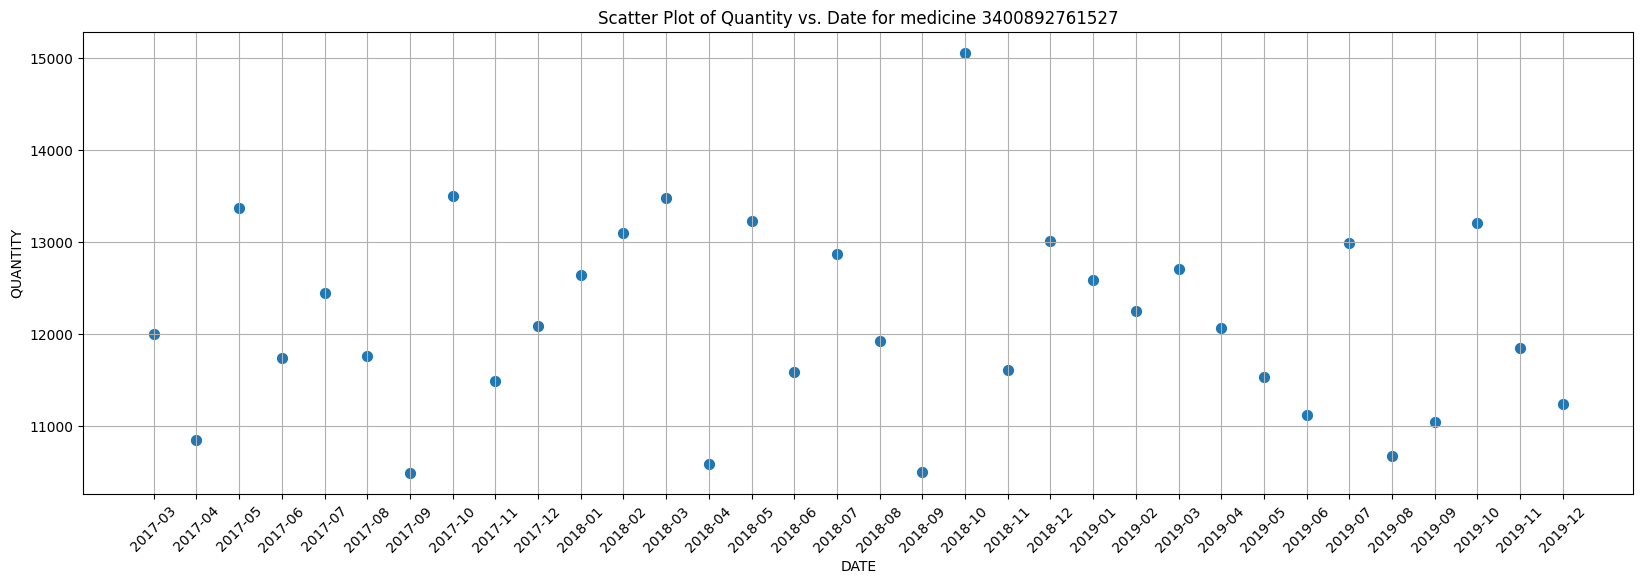

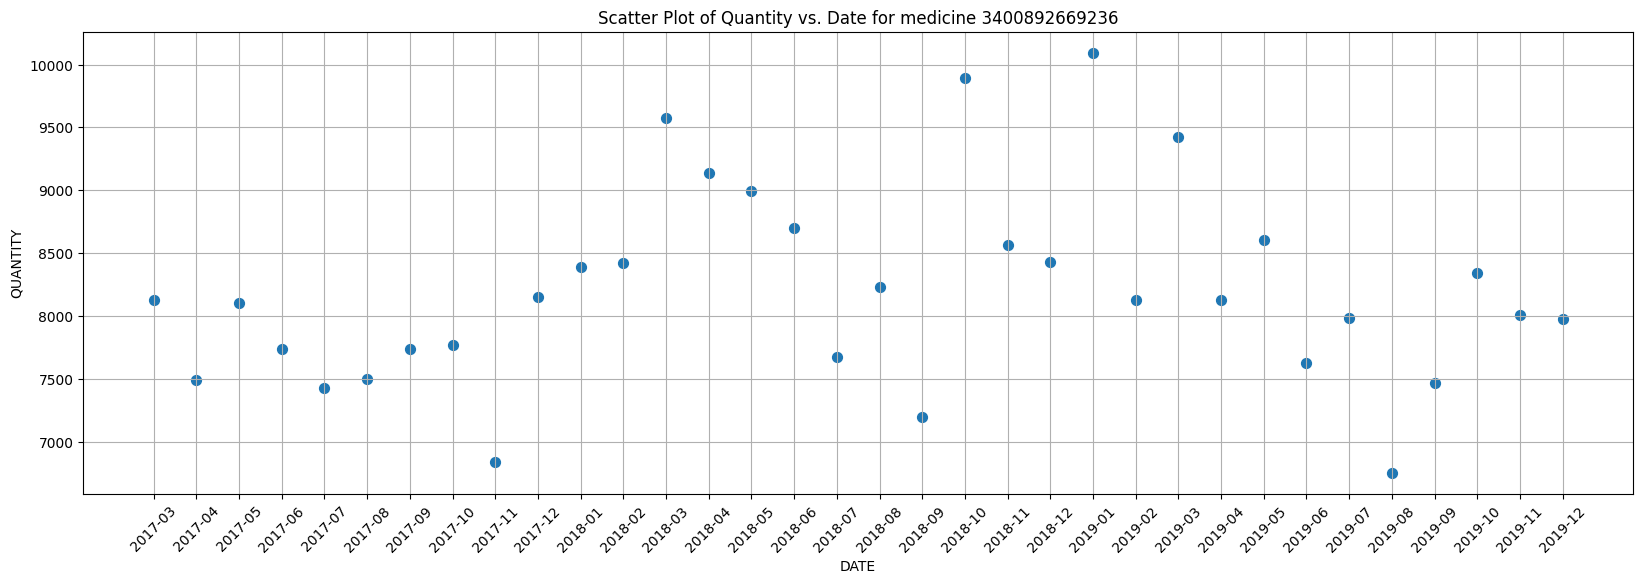

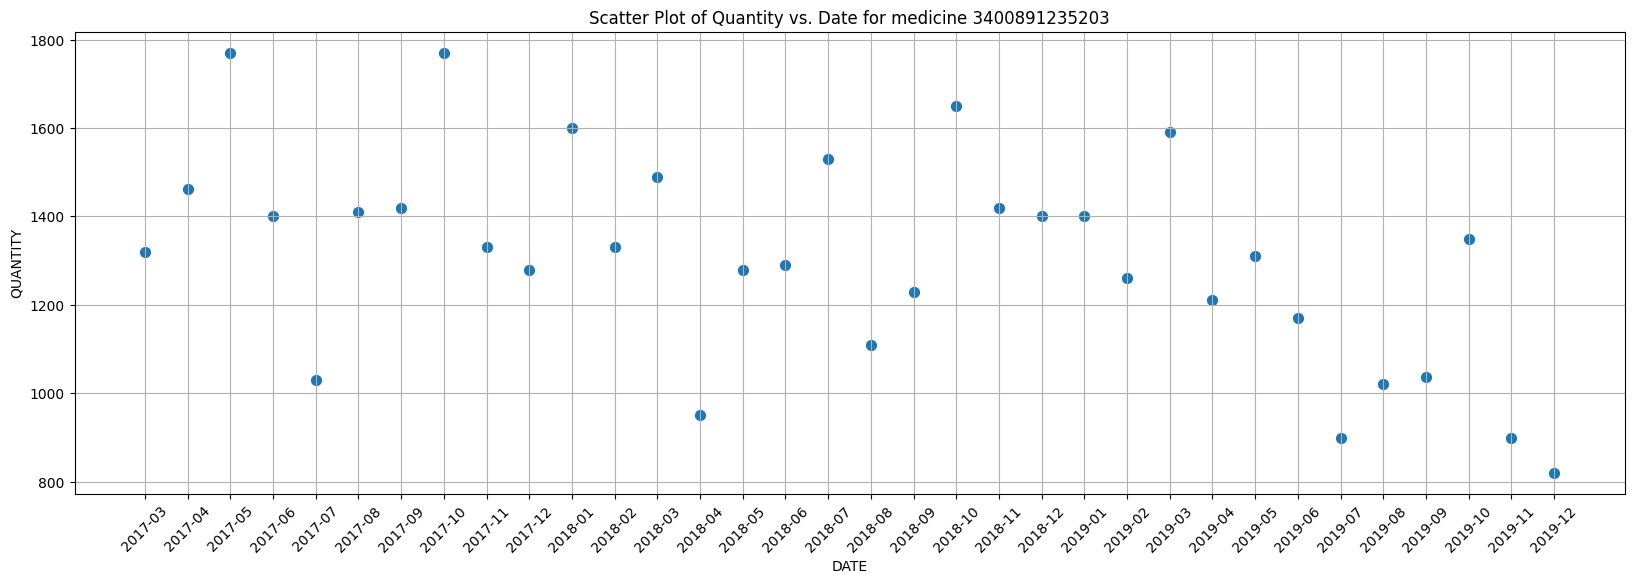

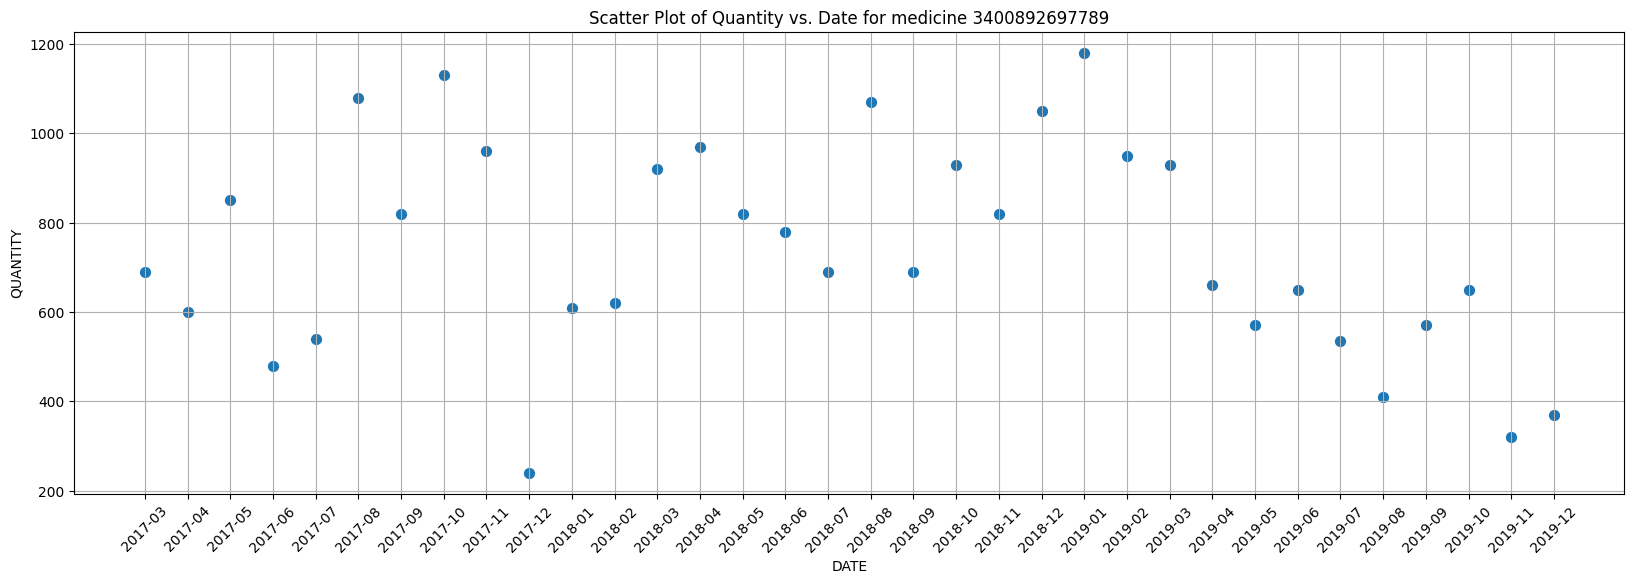

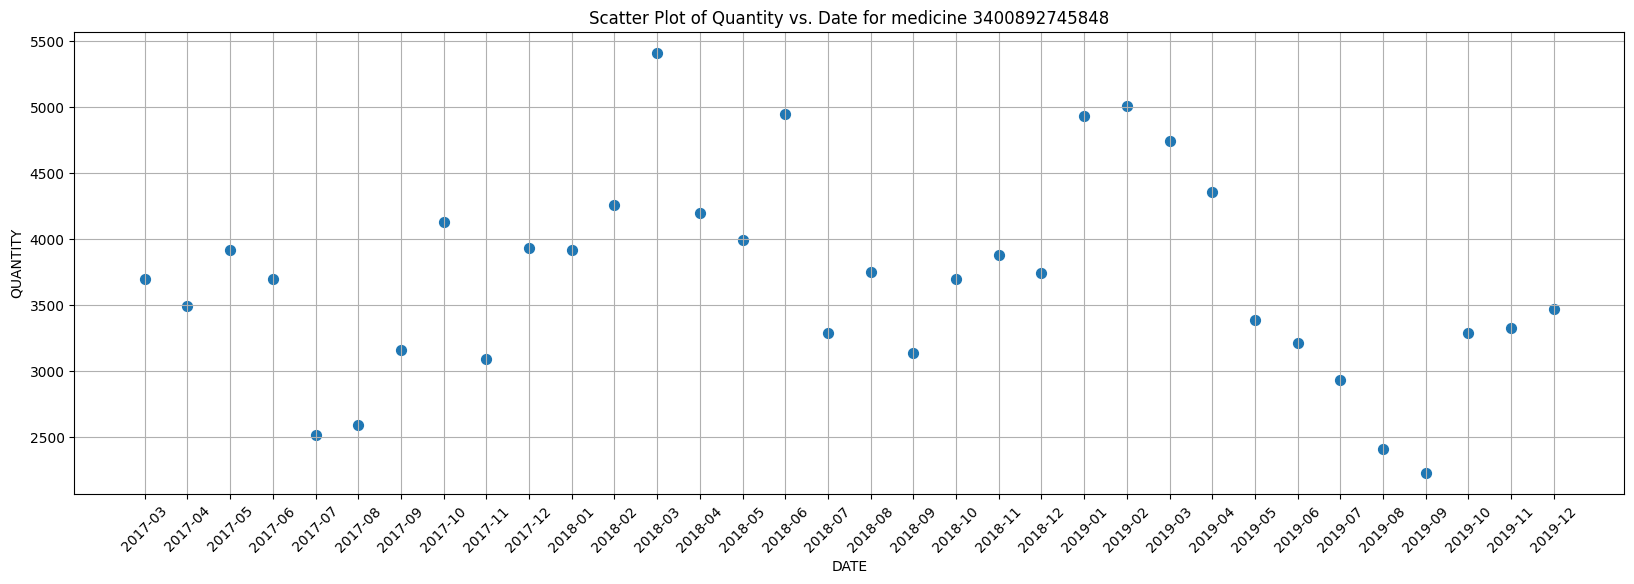

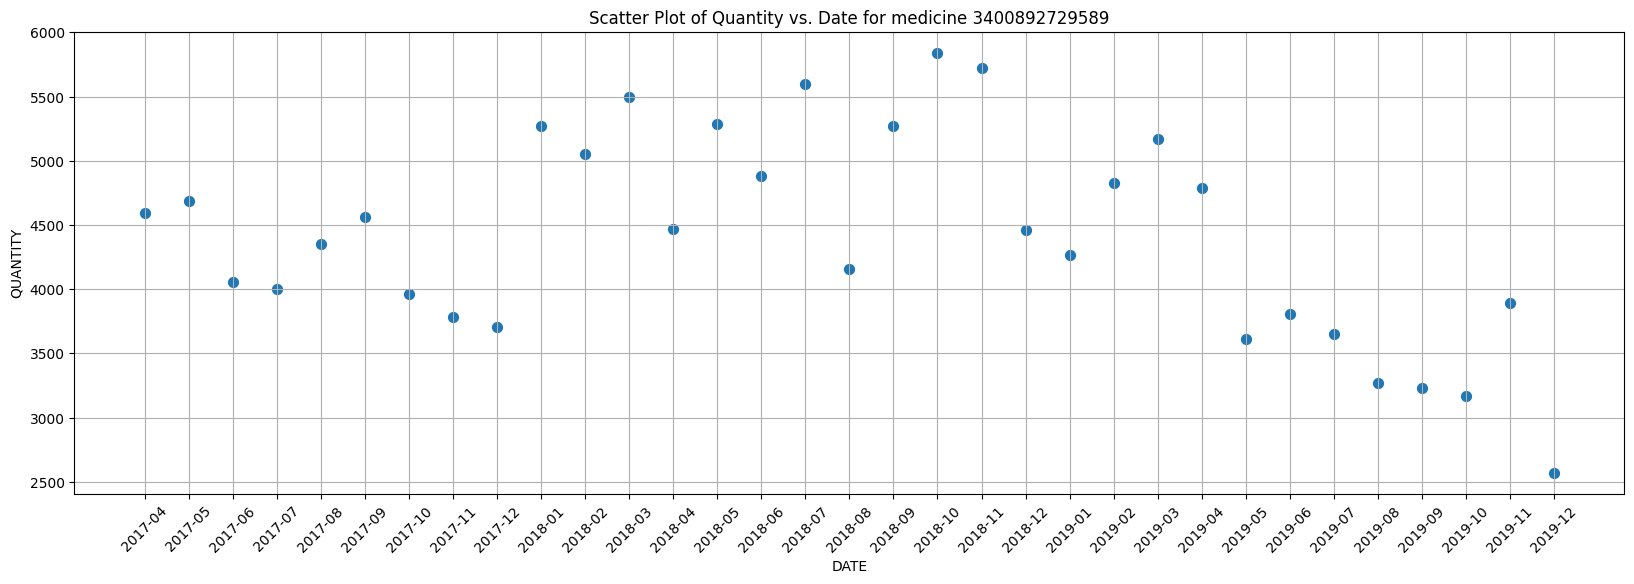

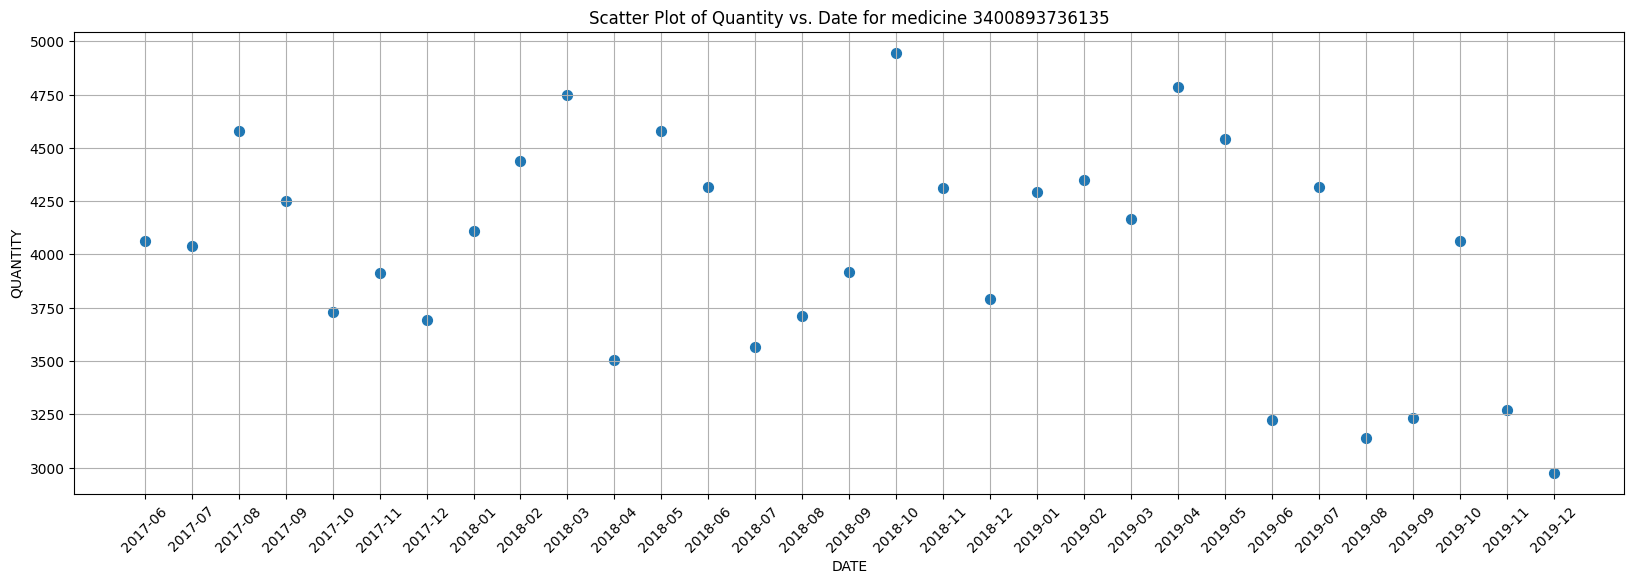

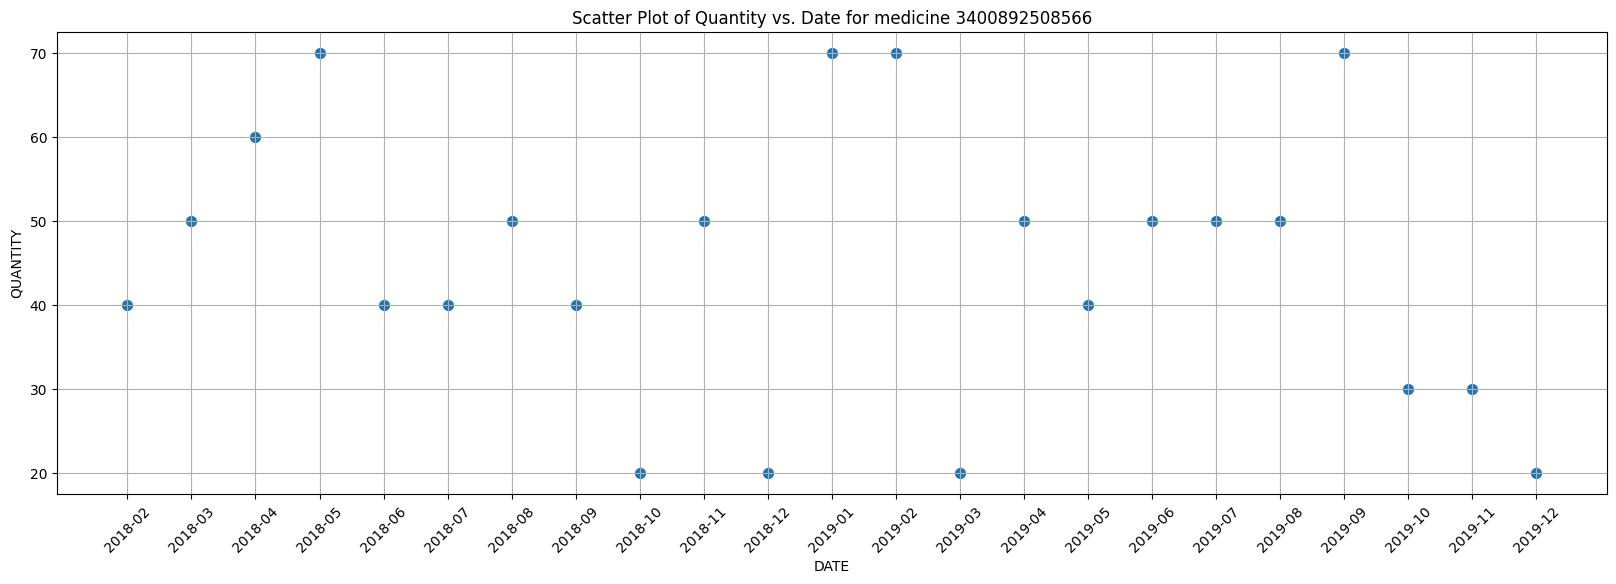

In [ ]:
plot_quantity(df_h2_resampled)

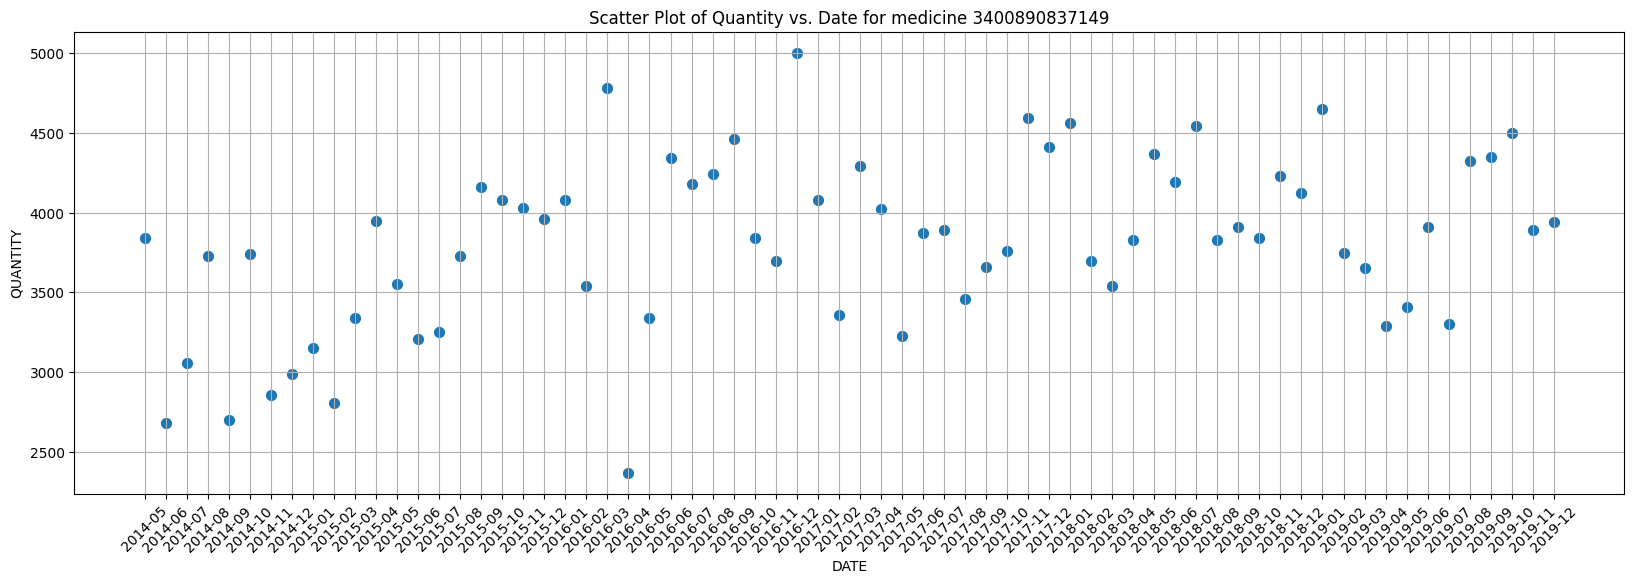

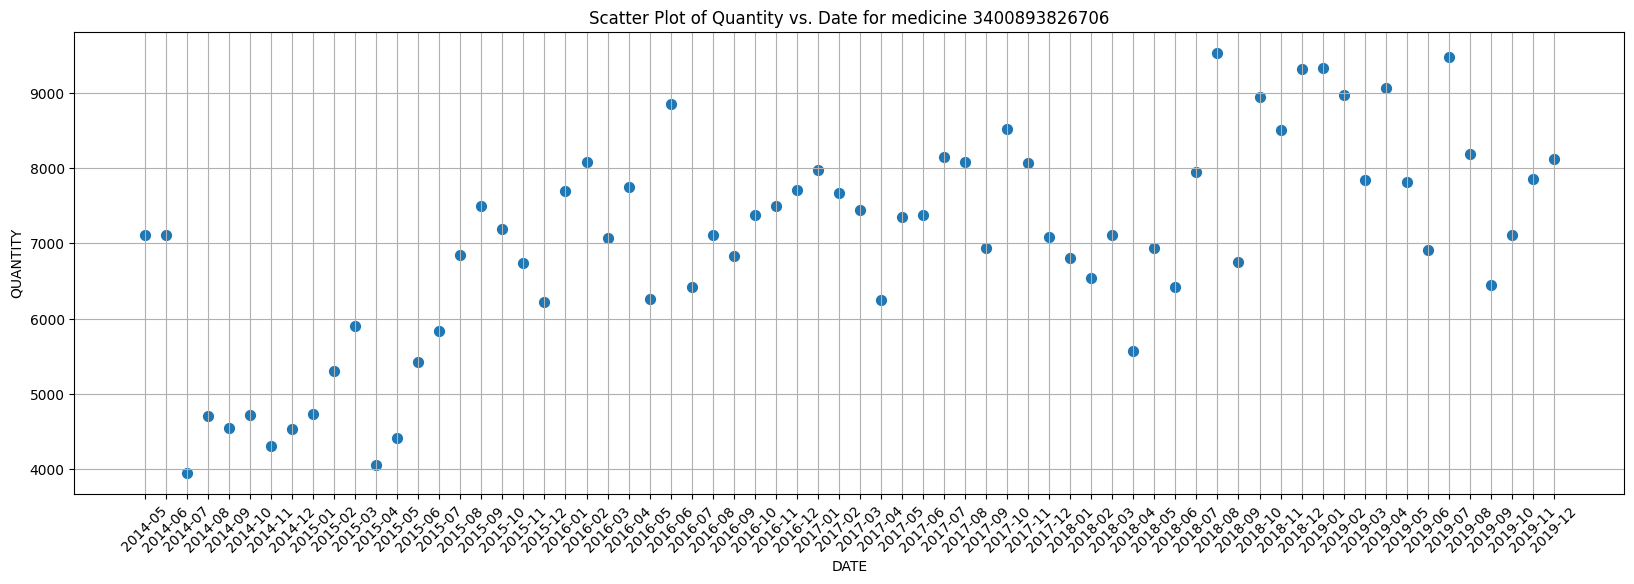

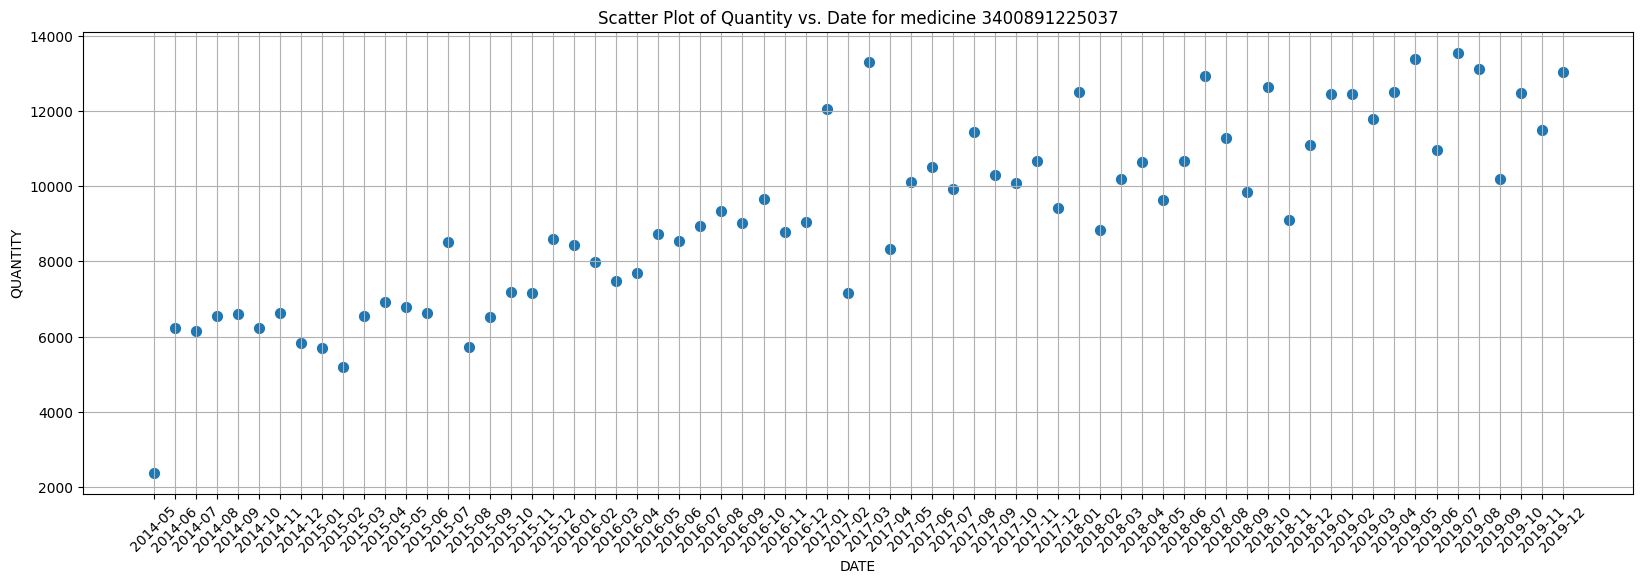

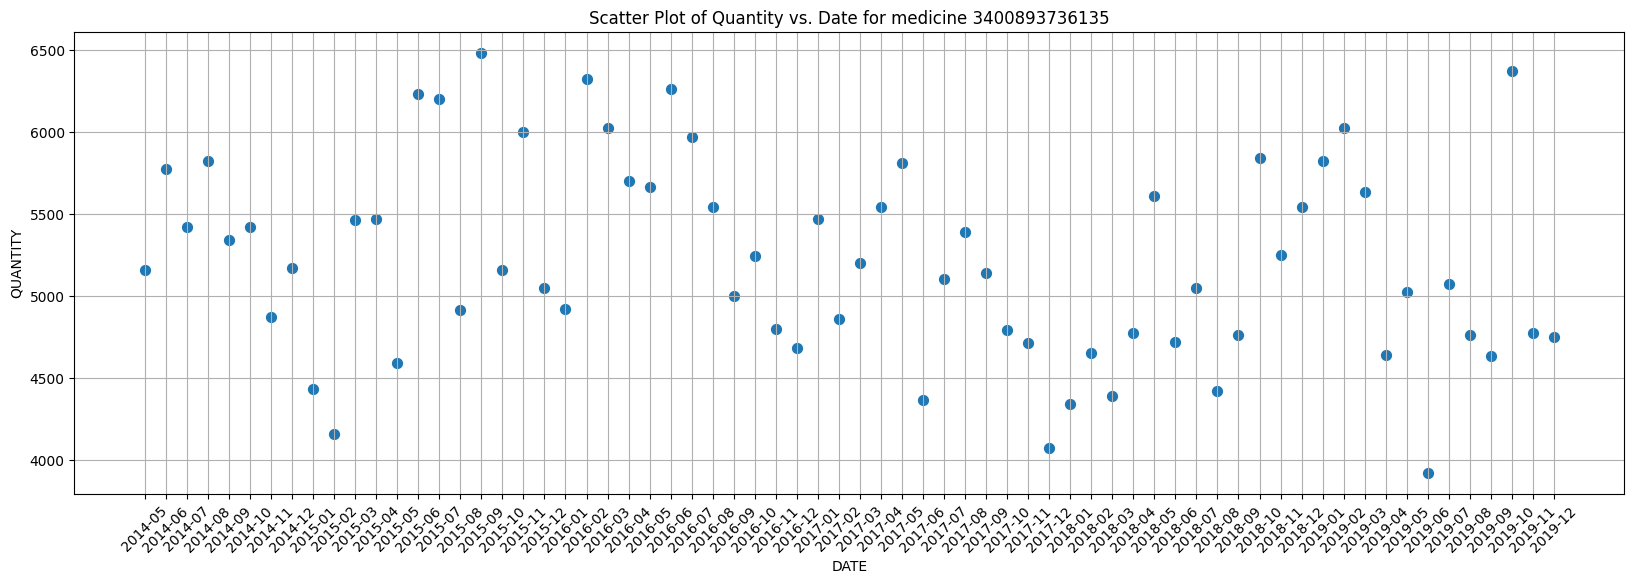

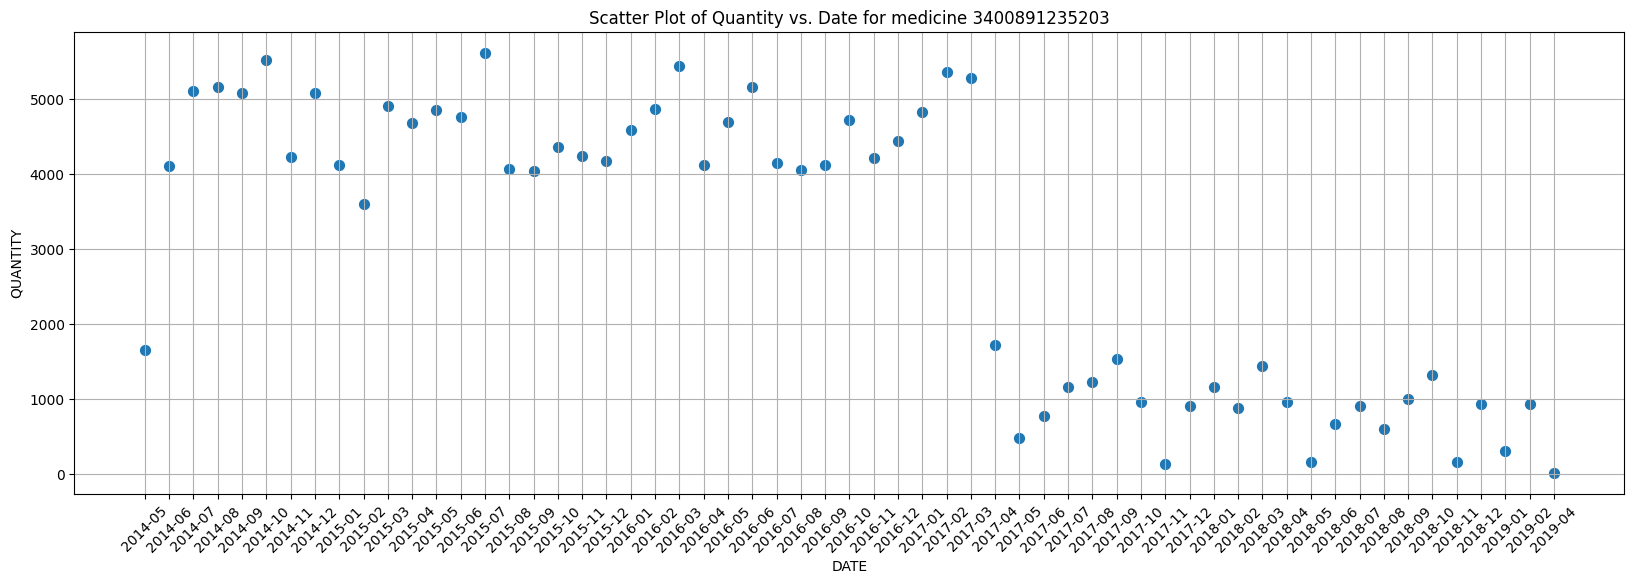

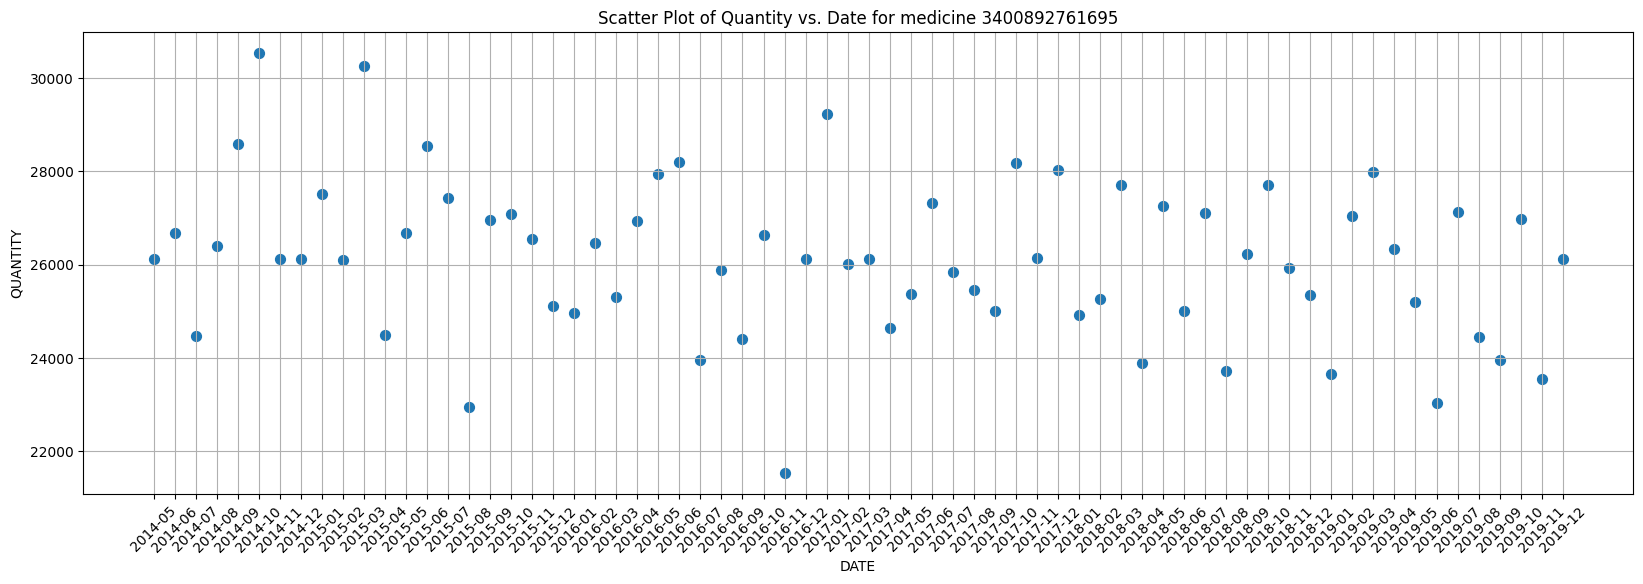

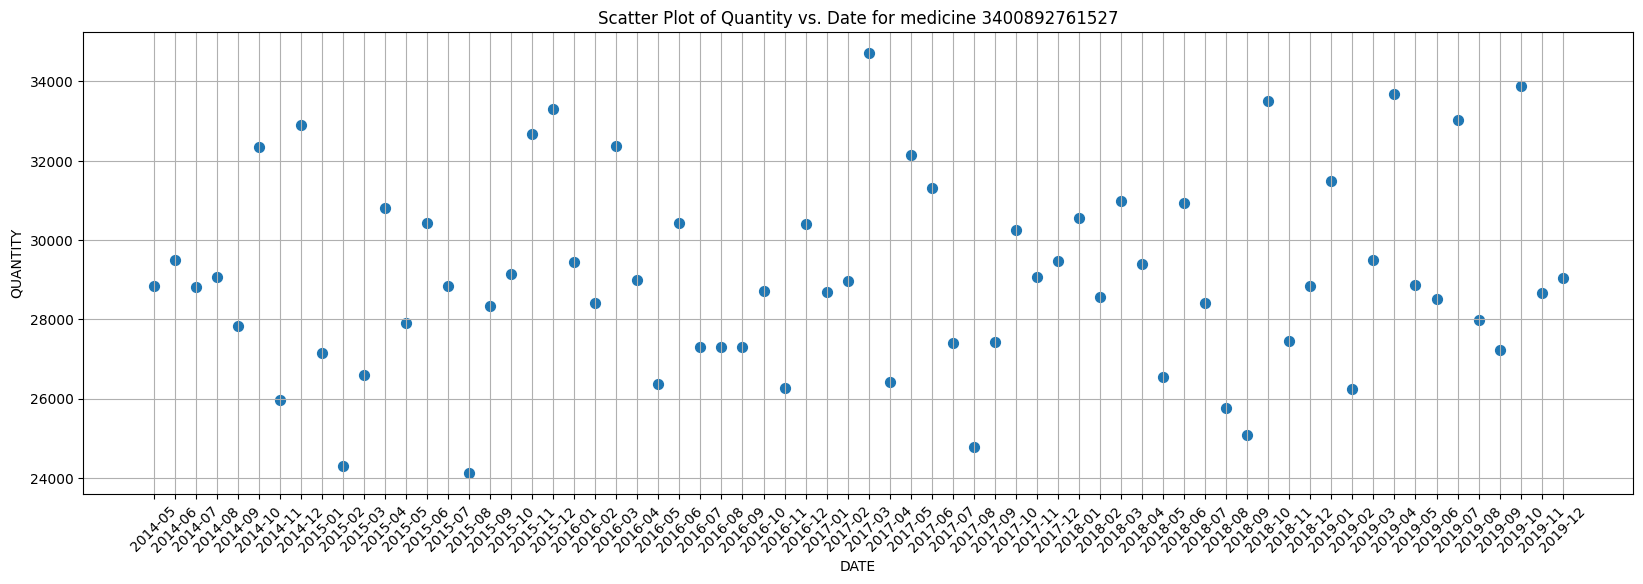

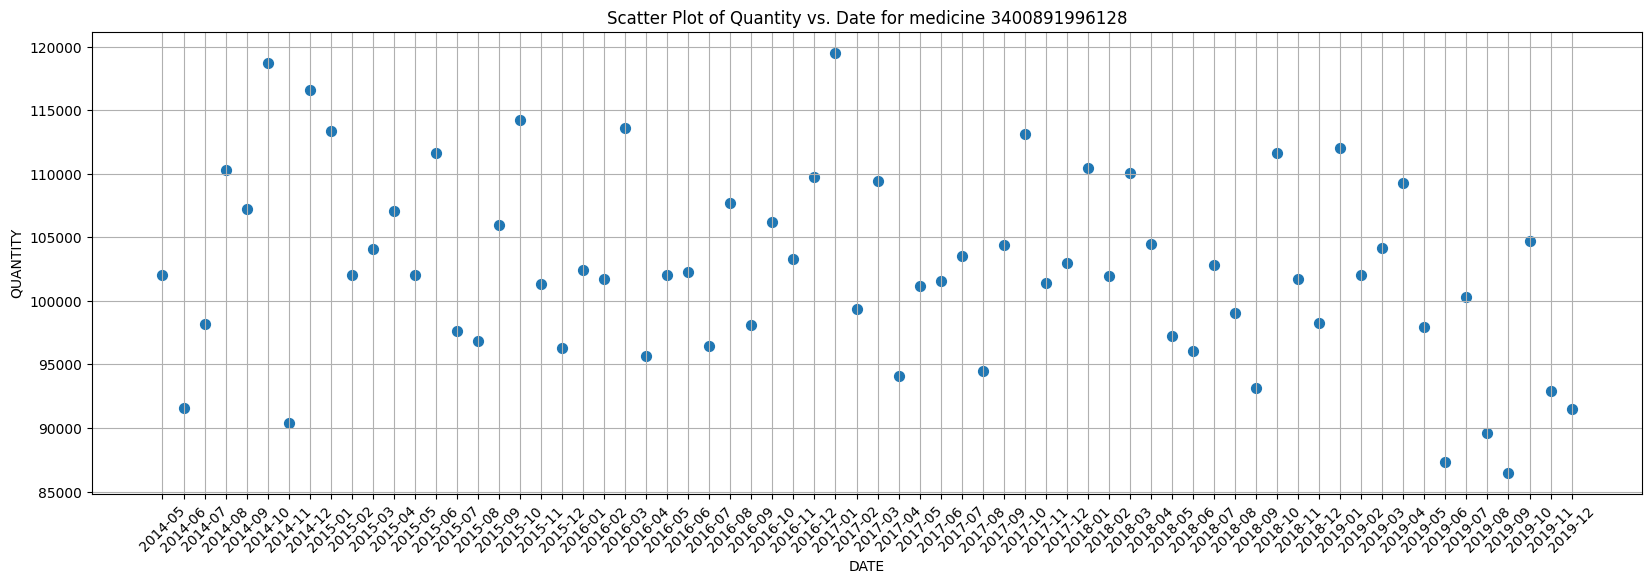

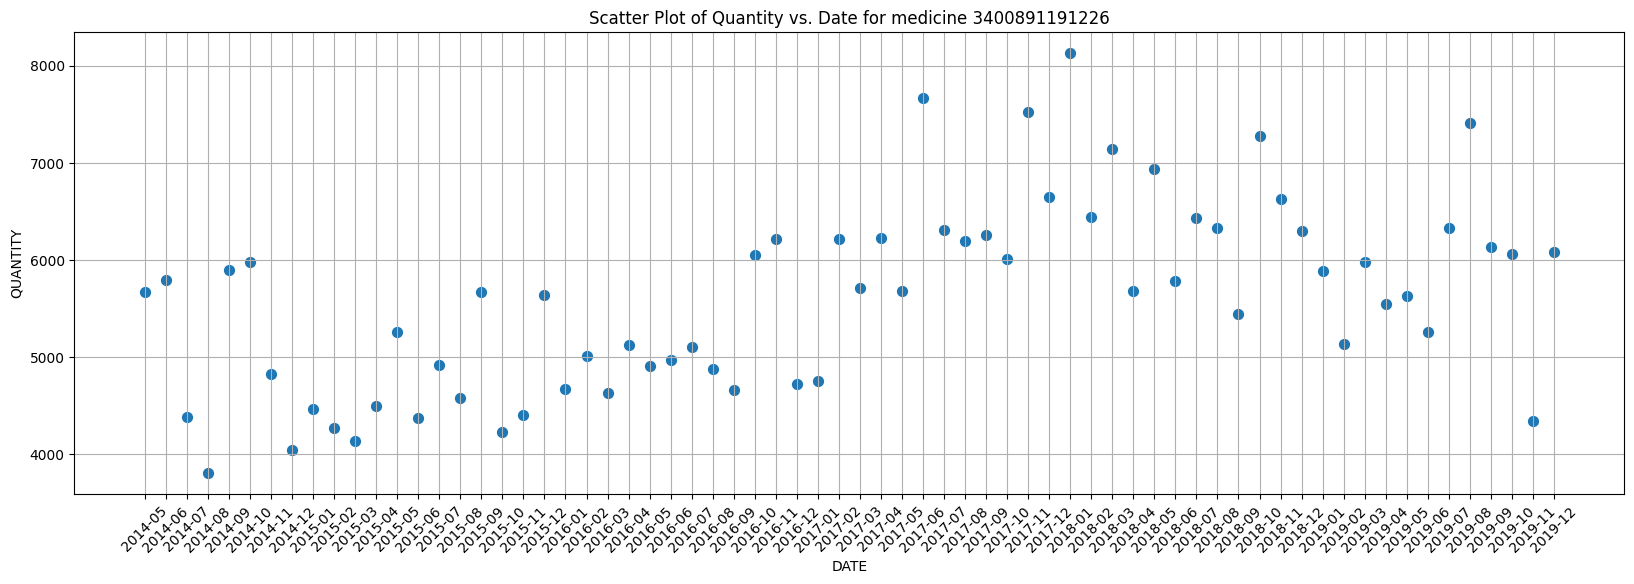

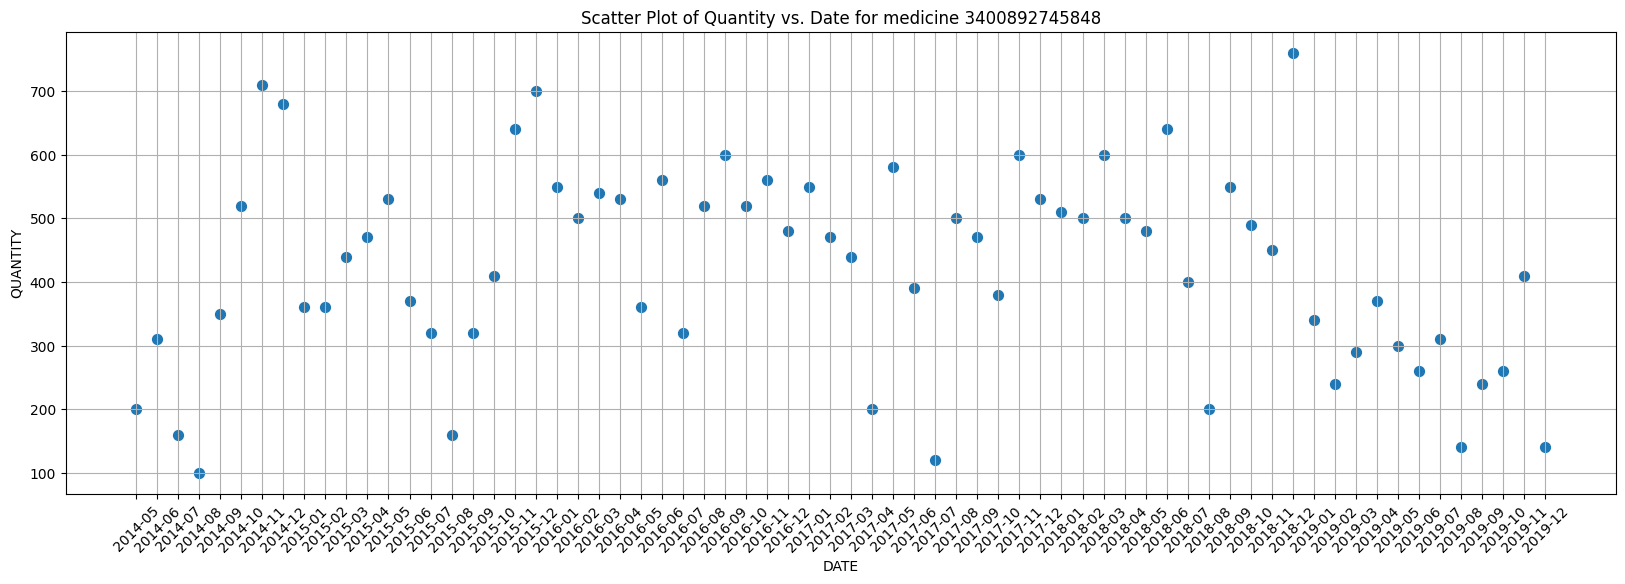

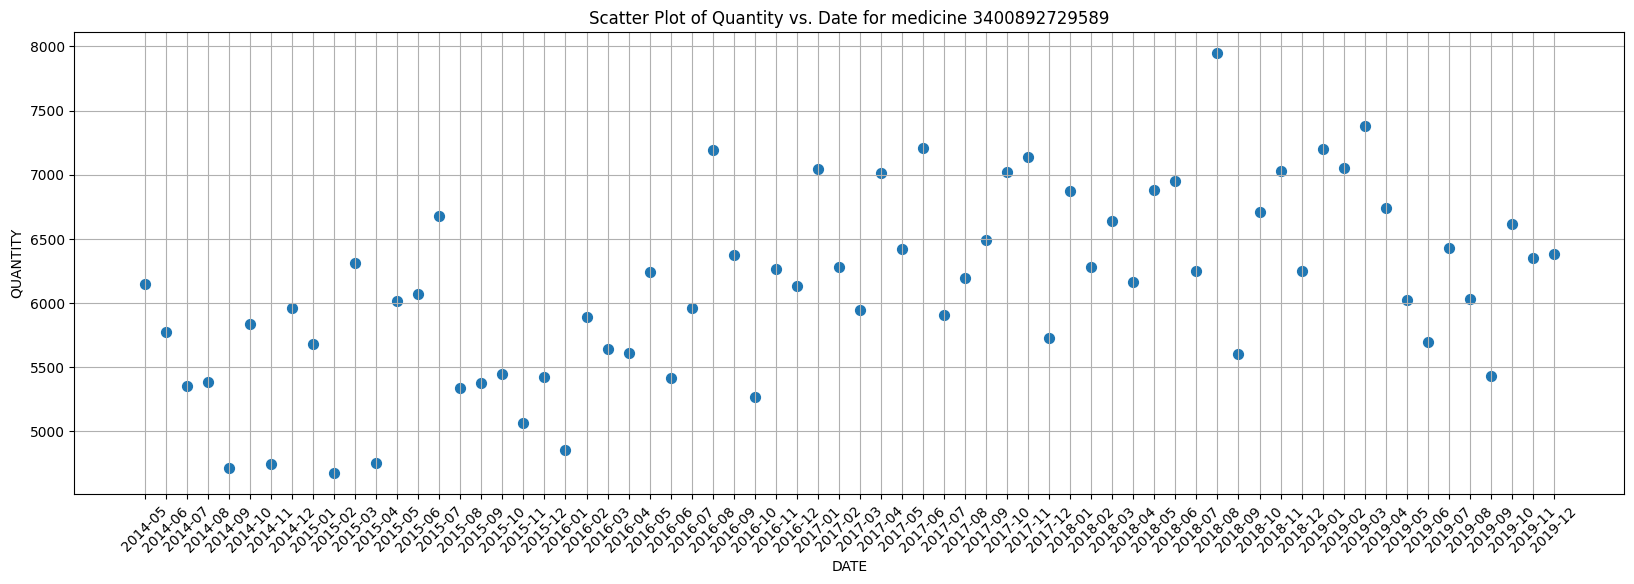

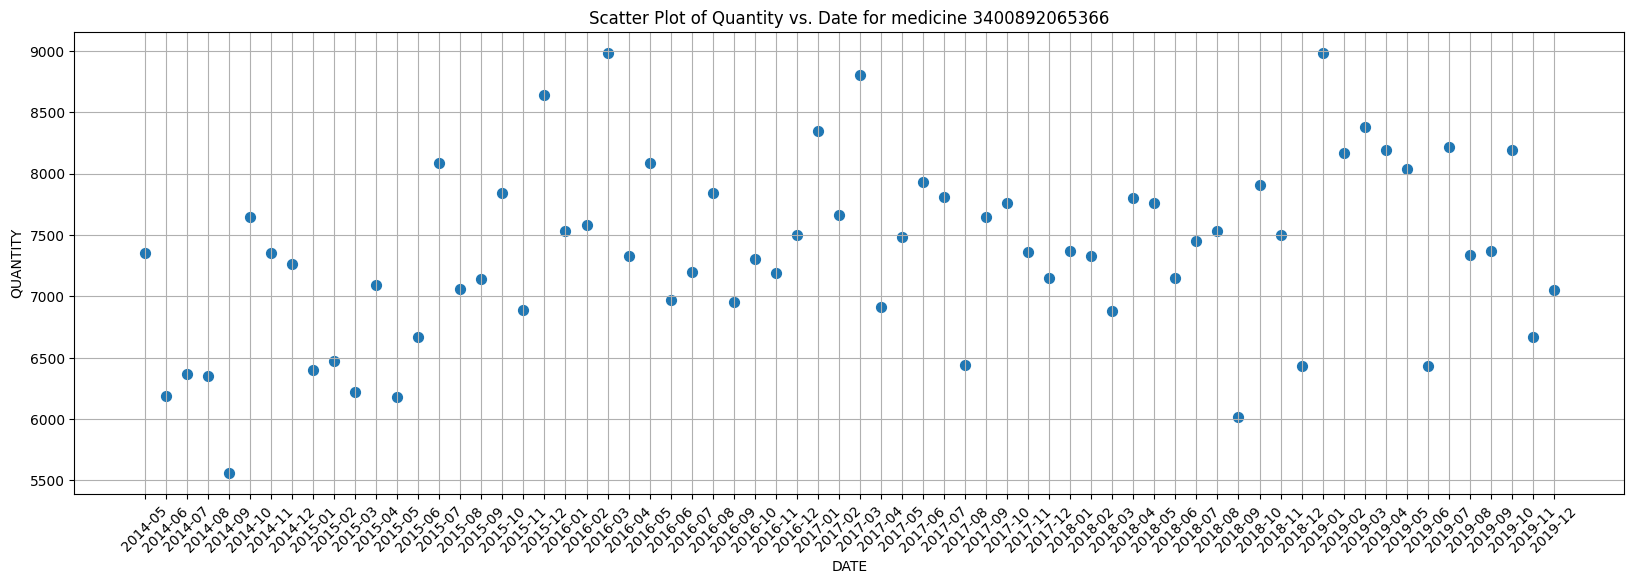

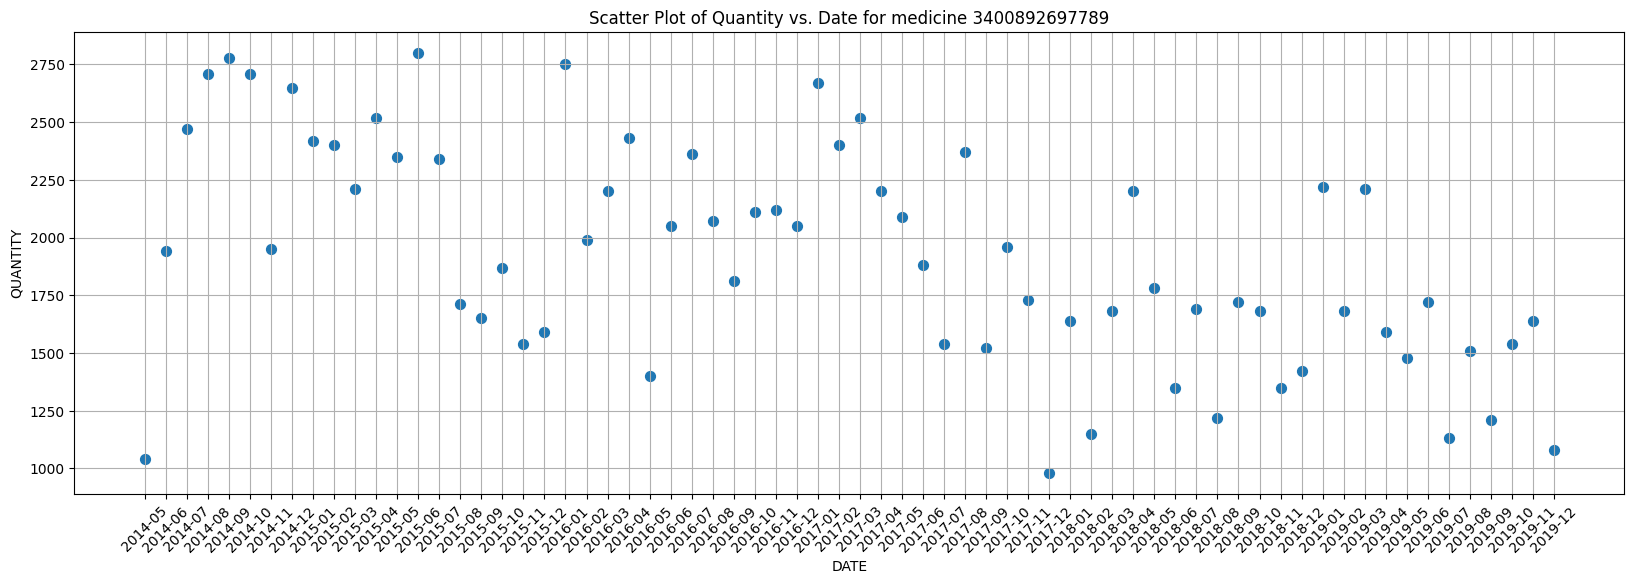

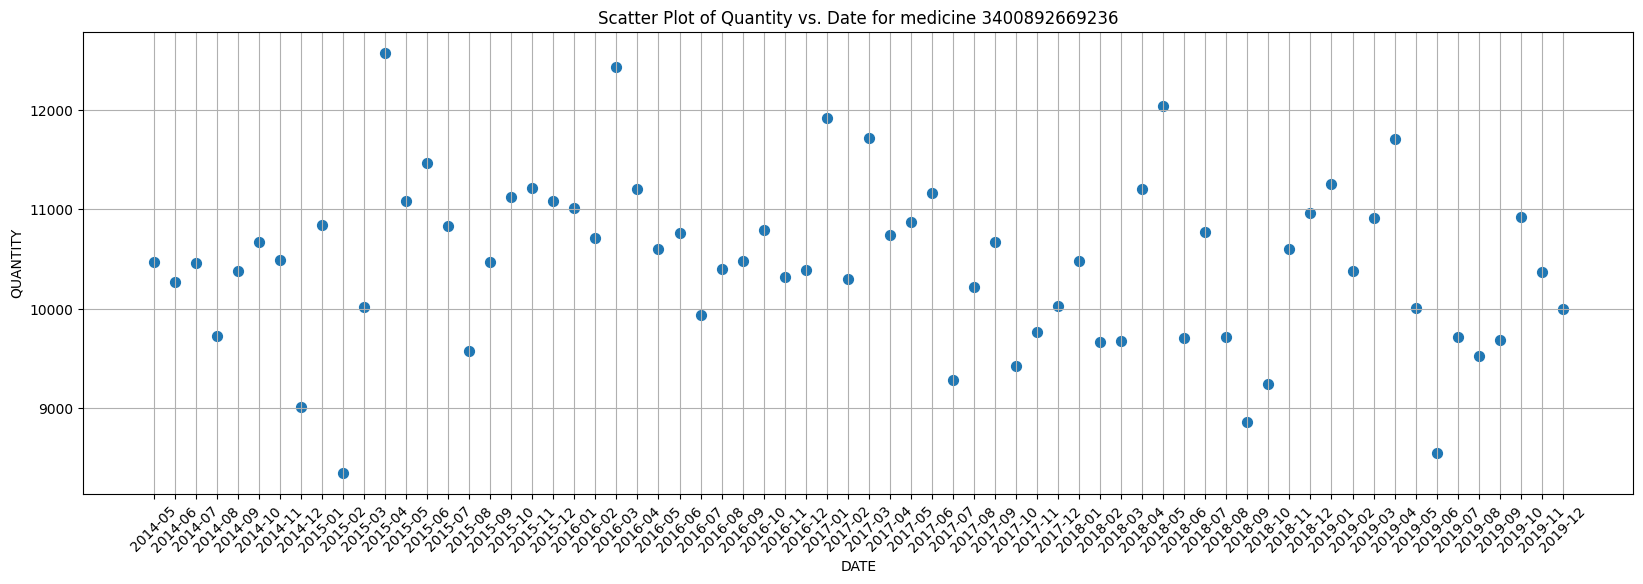

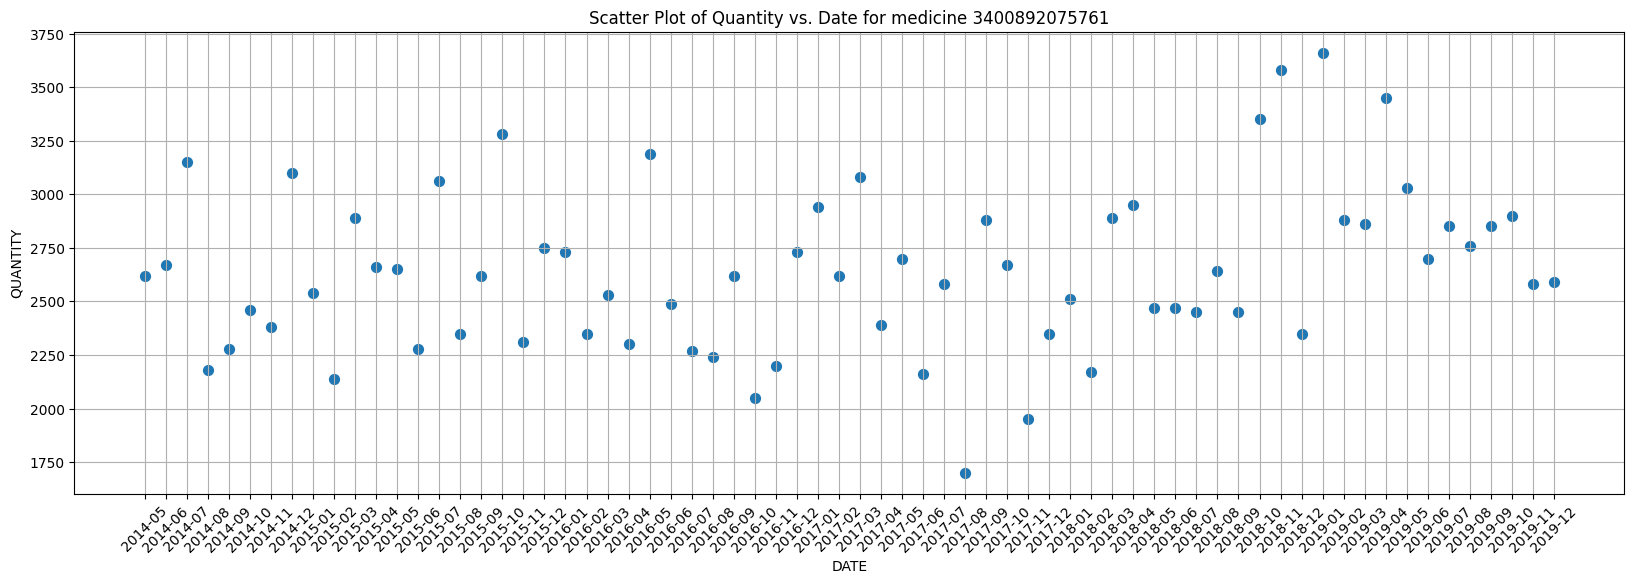

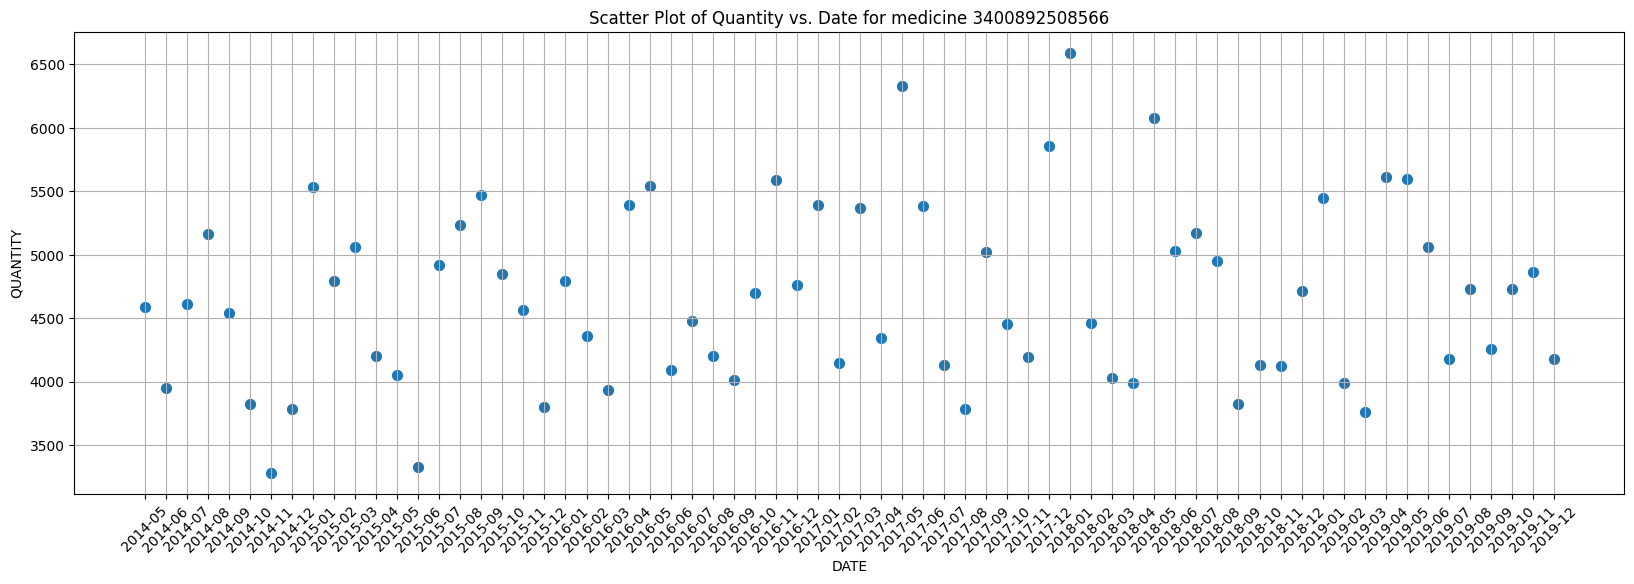

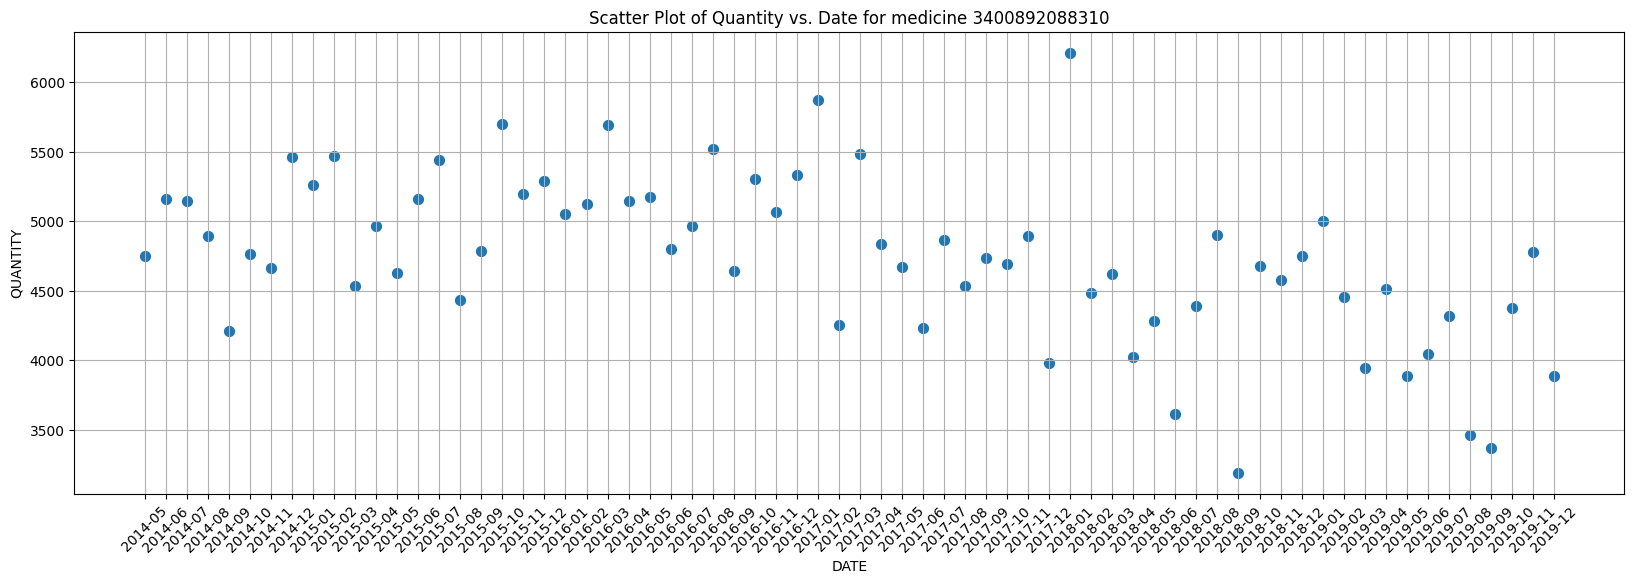

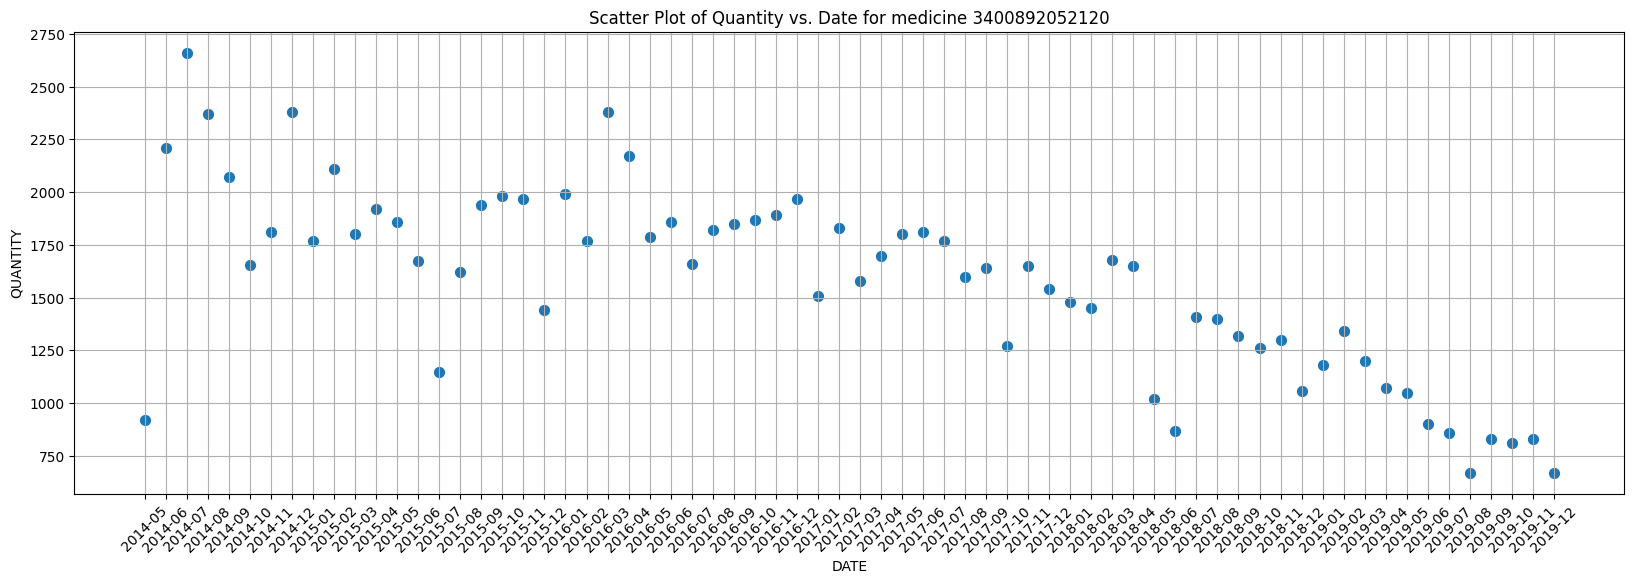

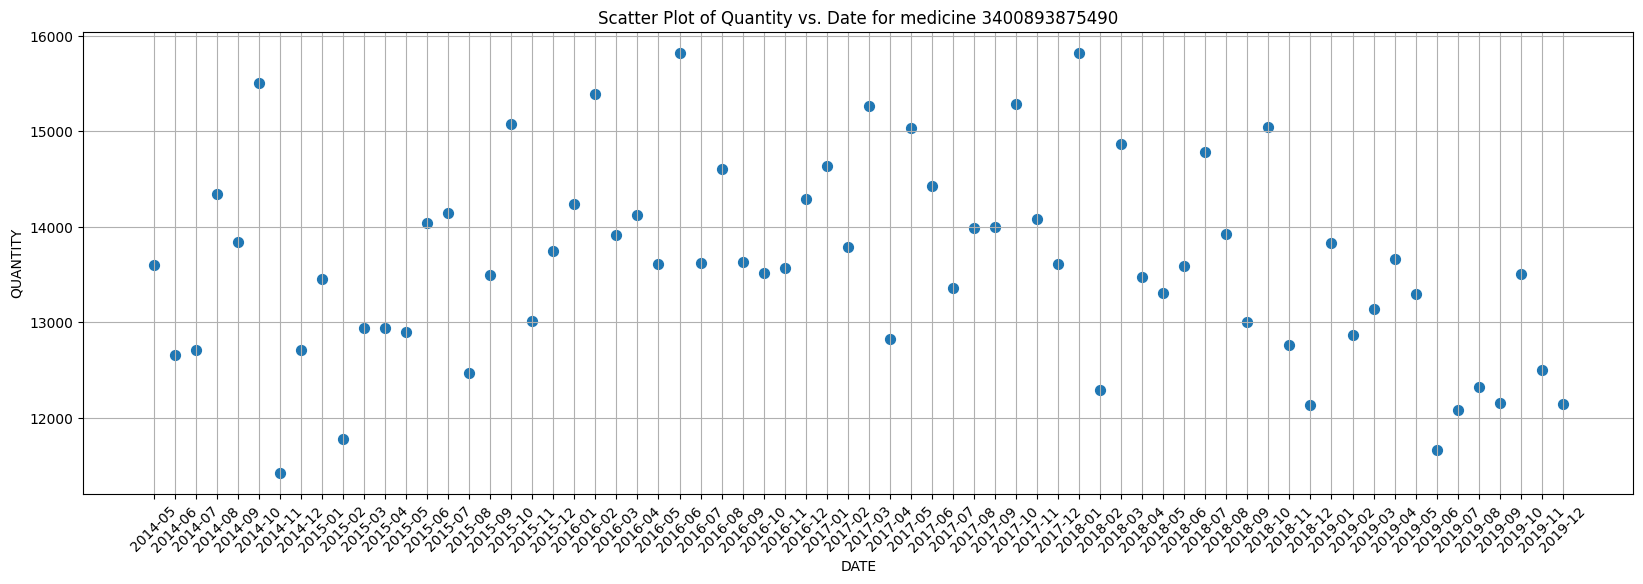

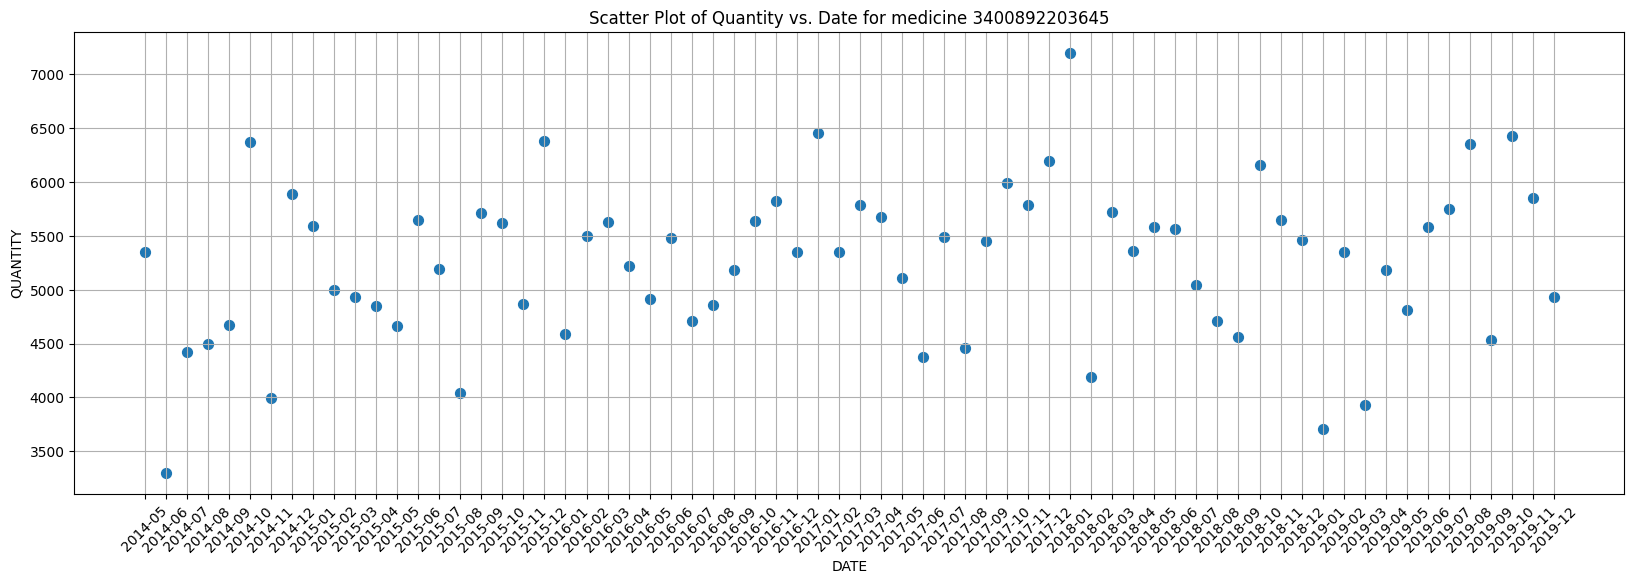

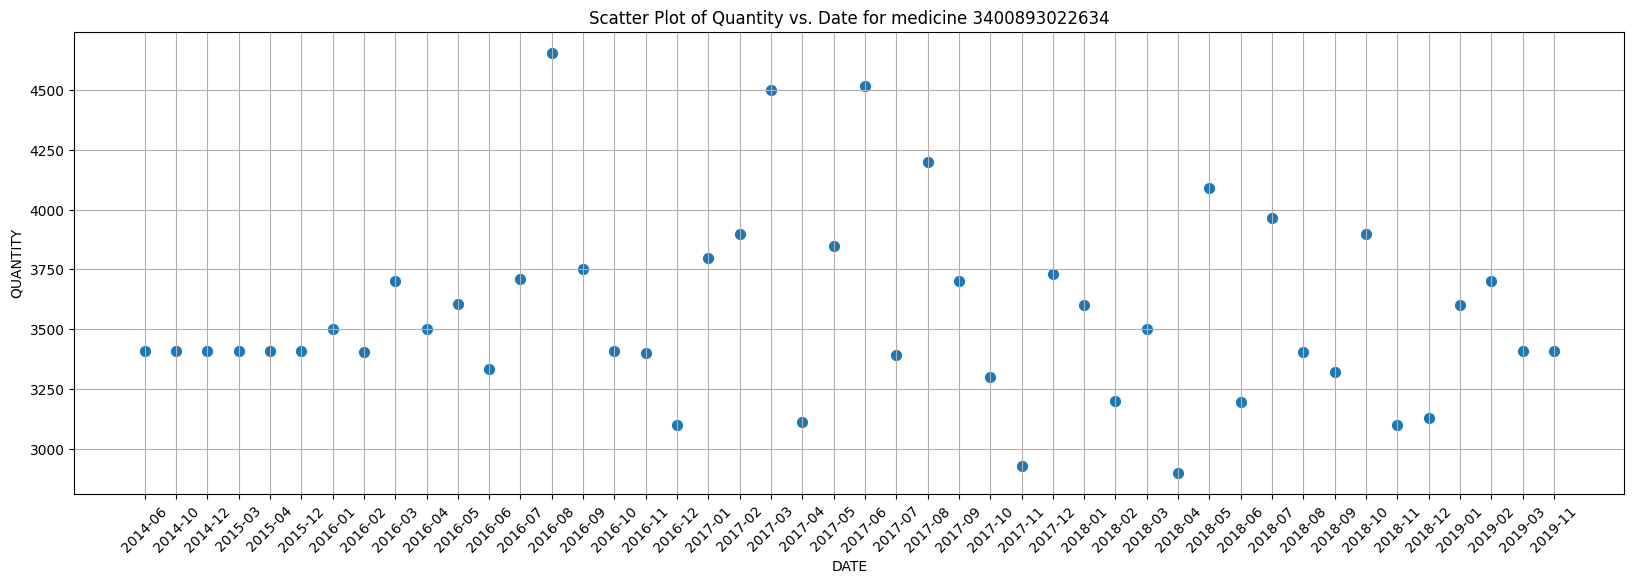

In [ ]:
plot_quantity(df_h3_resampled)

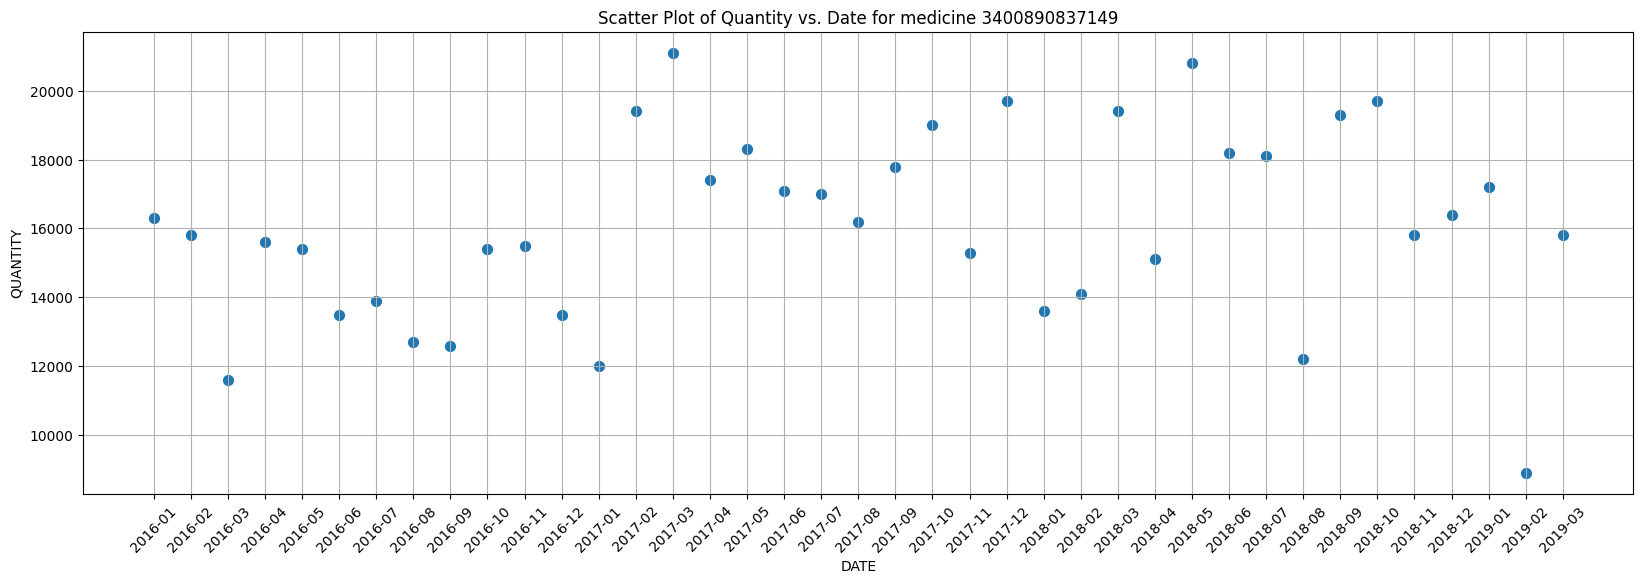

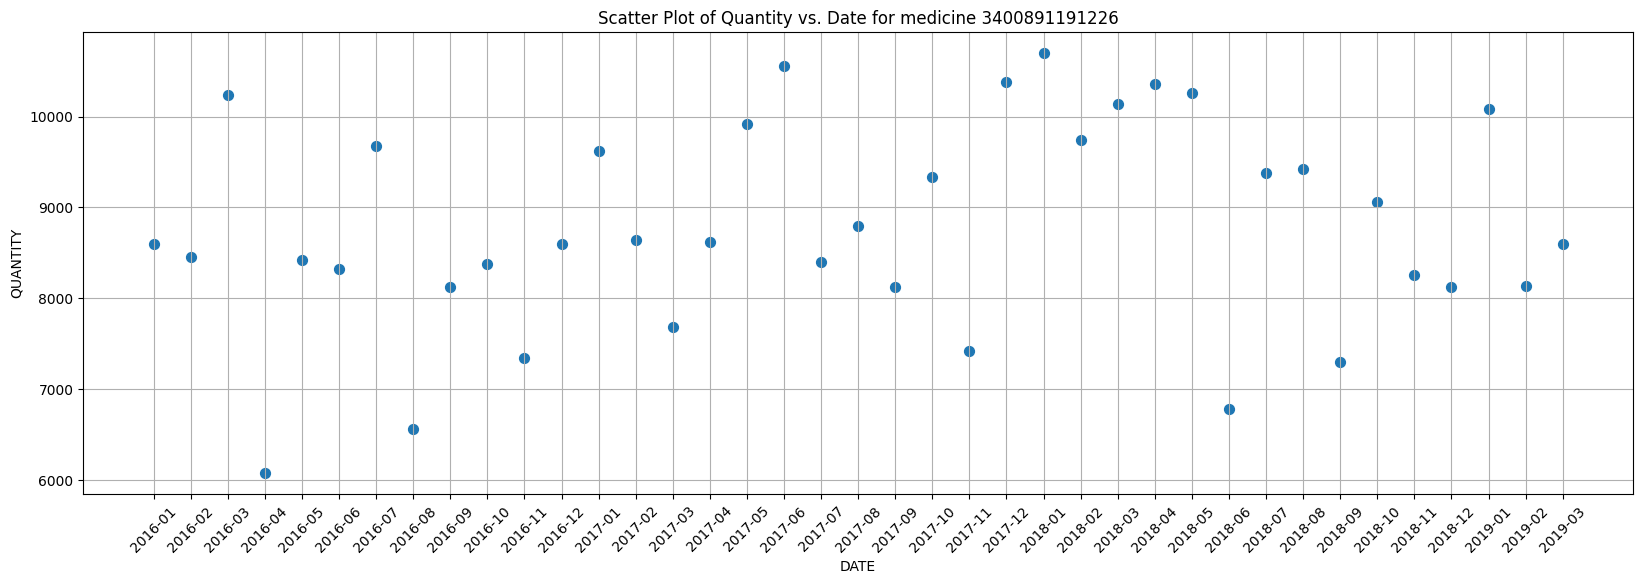

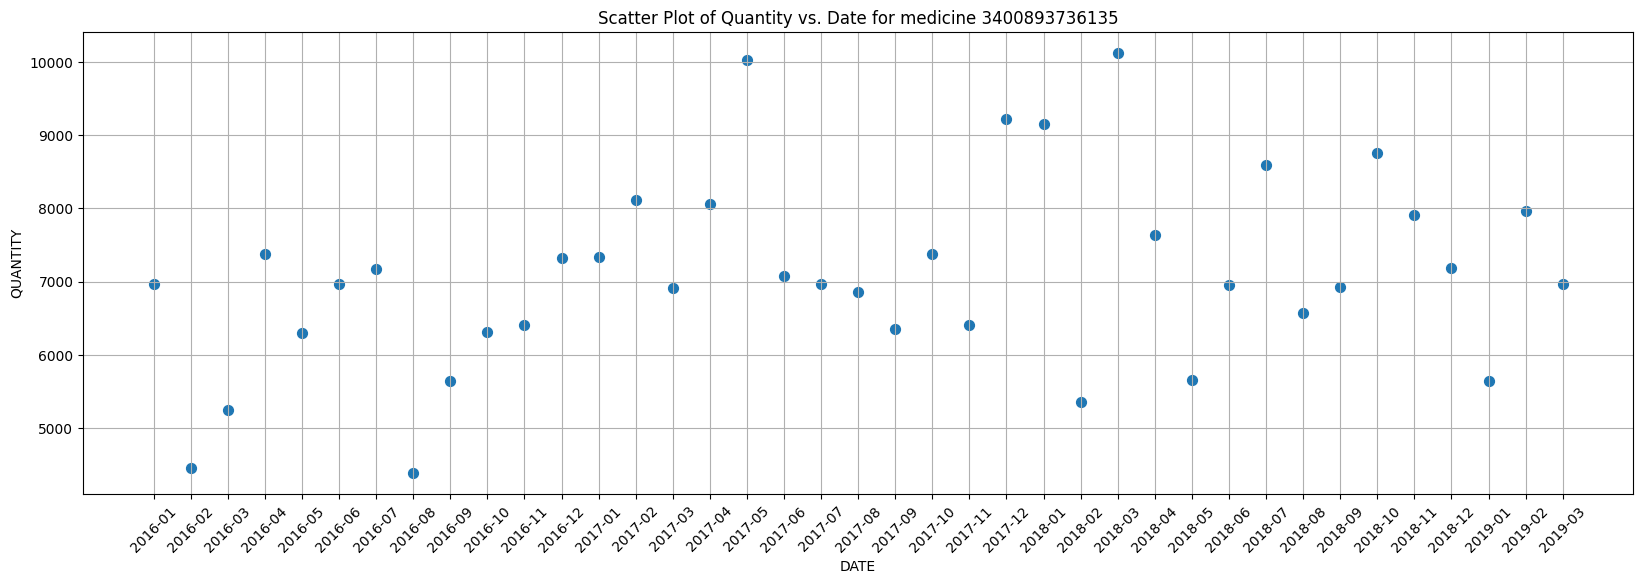

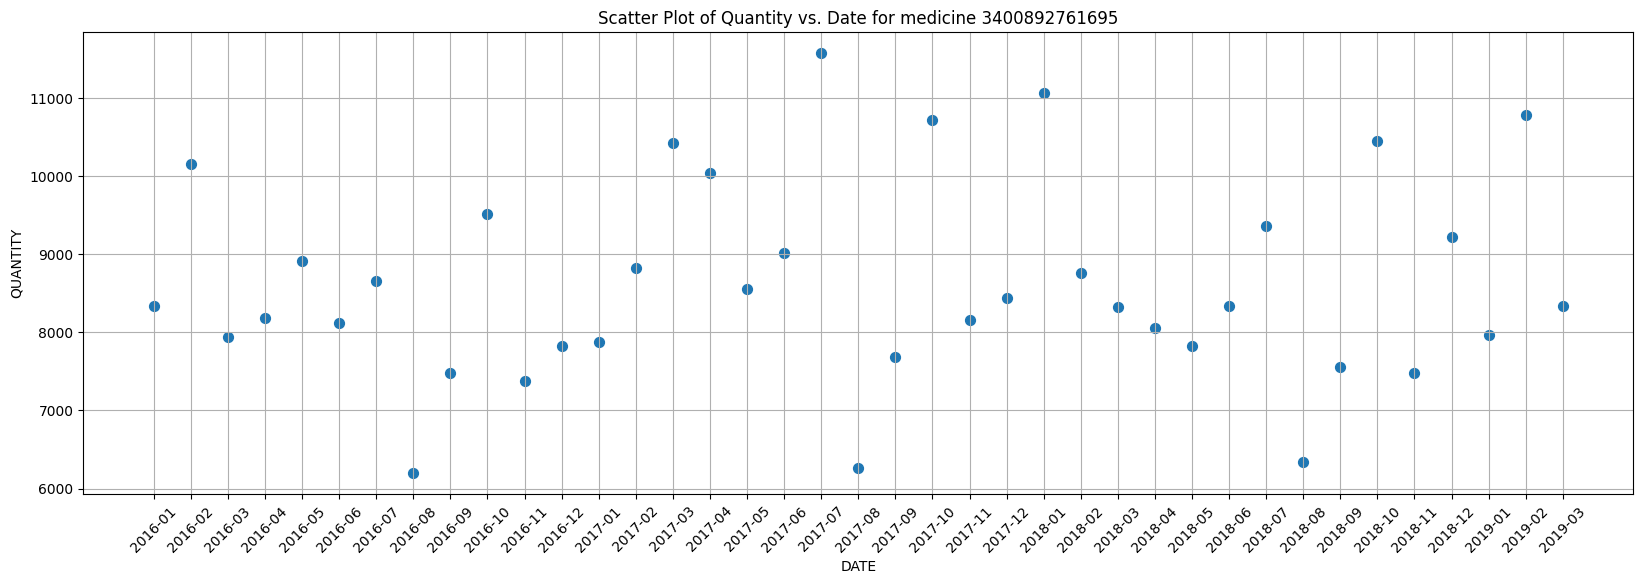

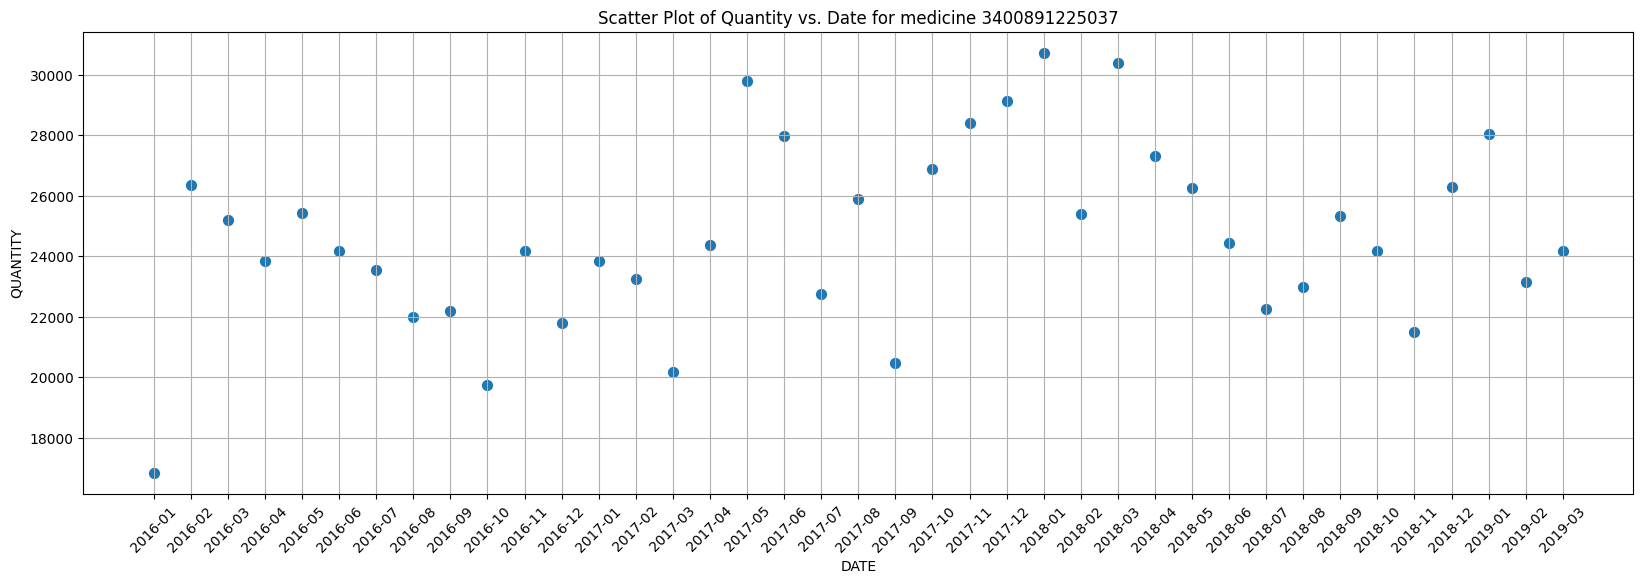

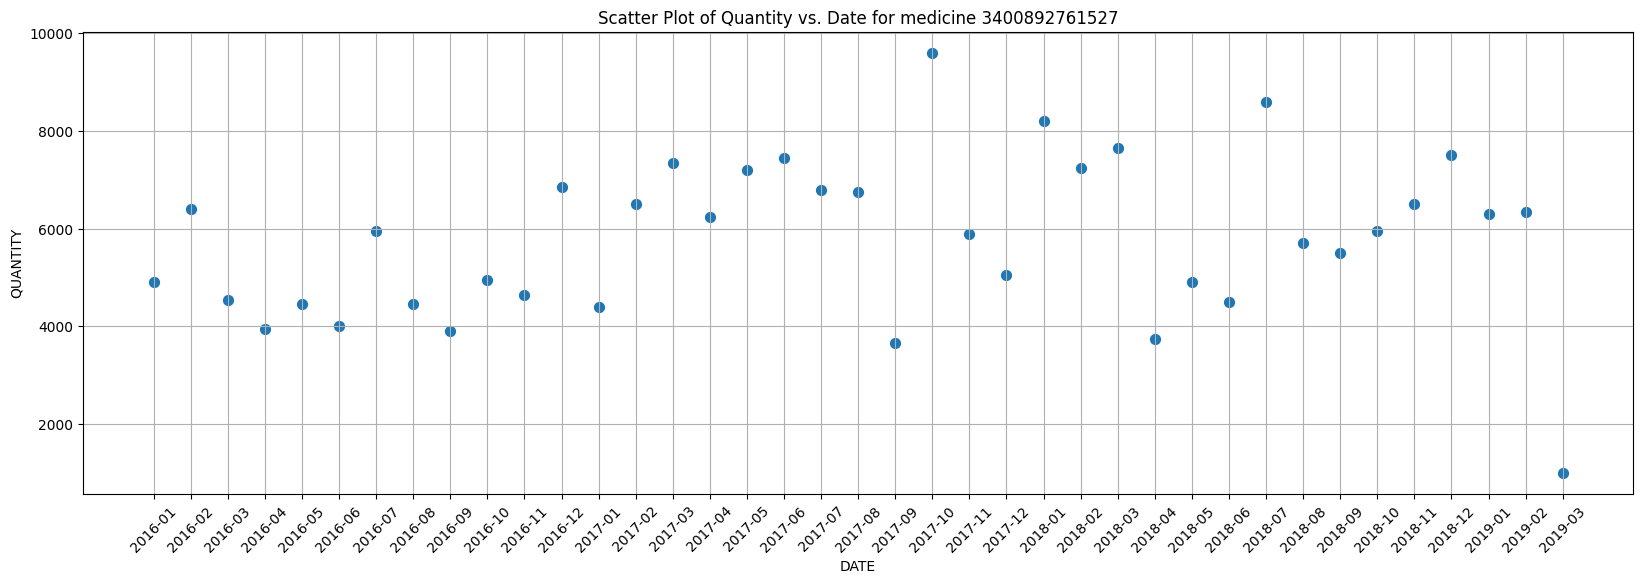

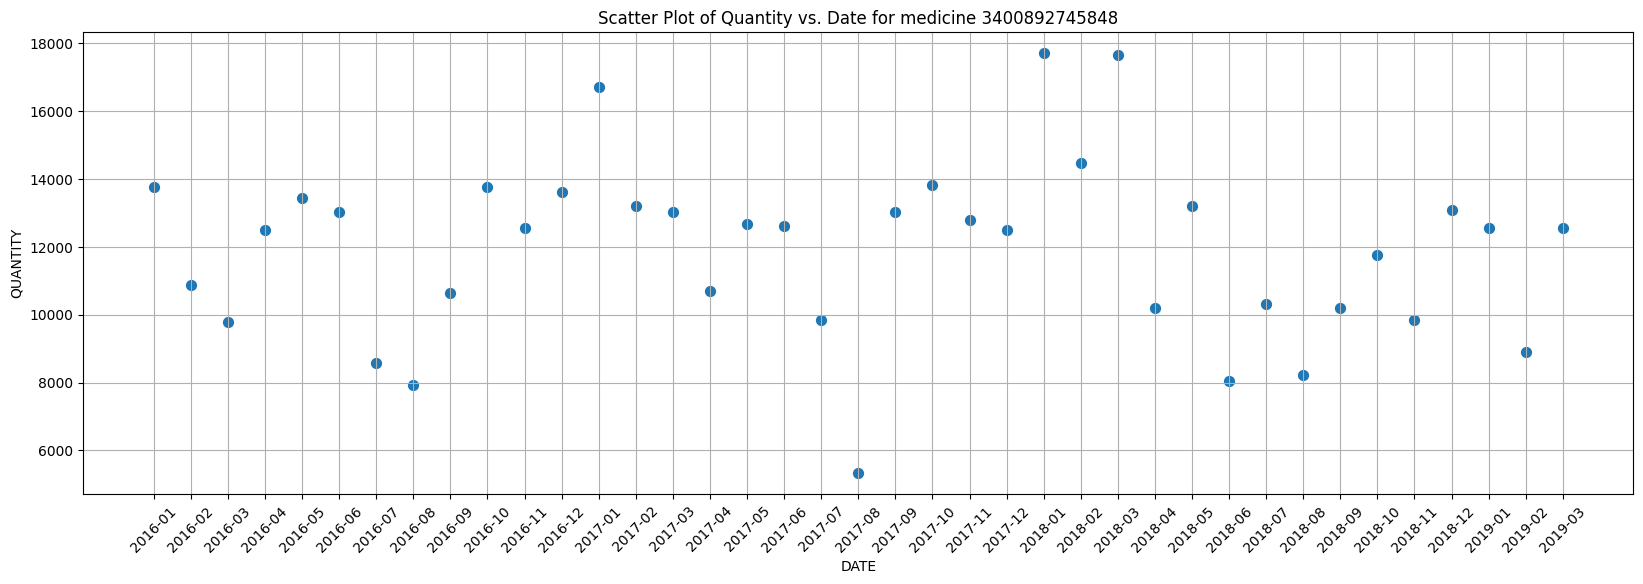

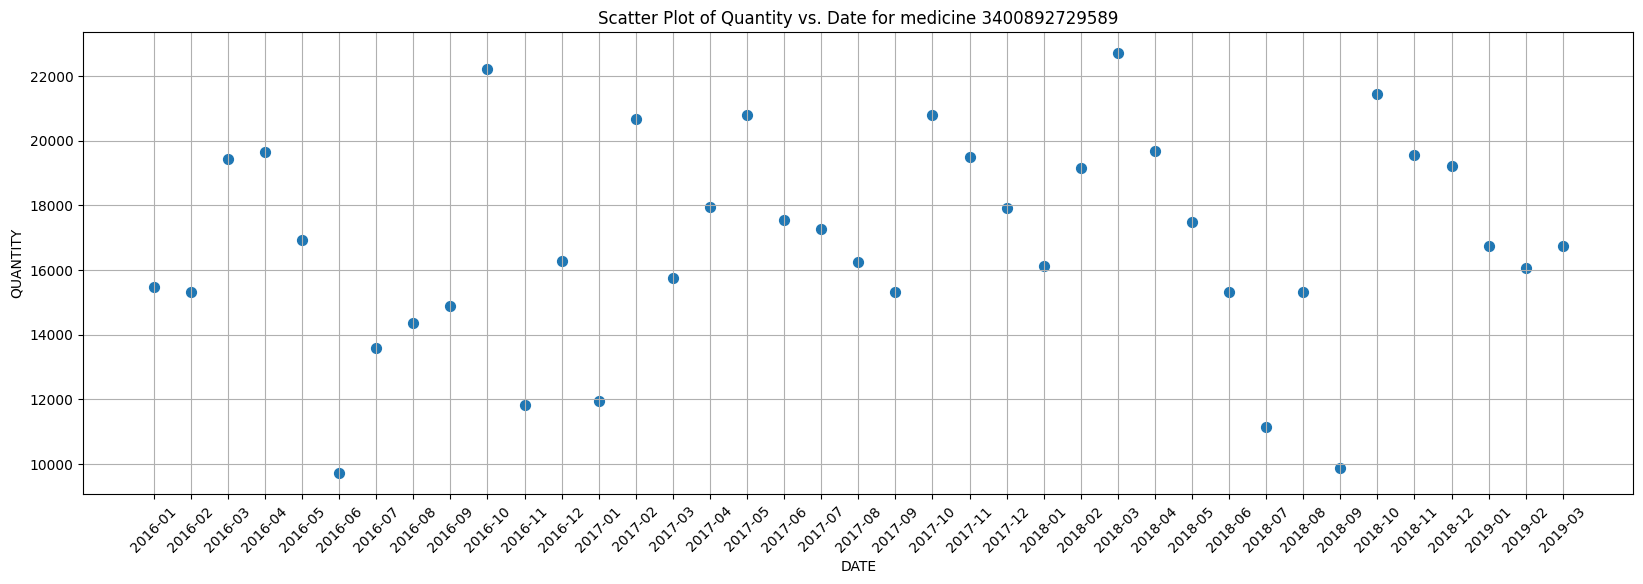

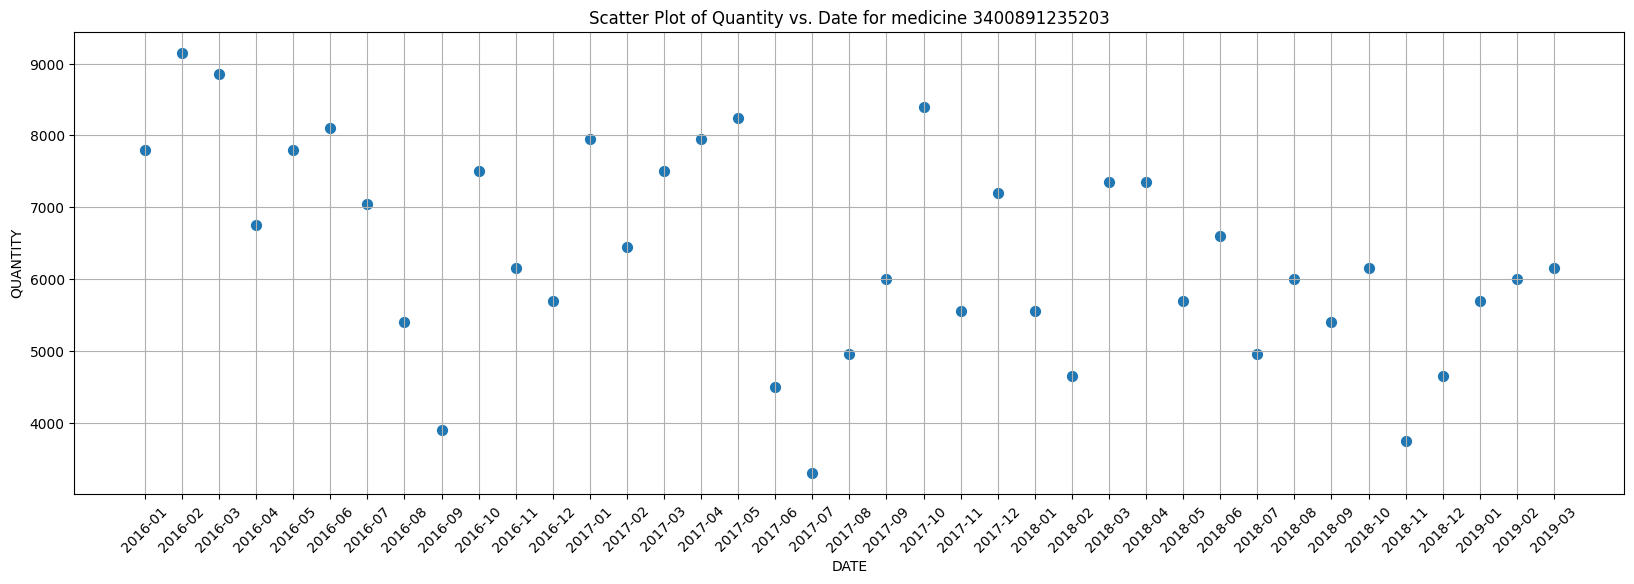

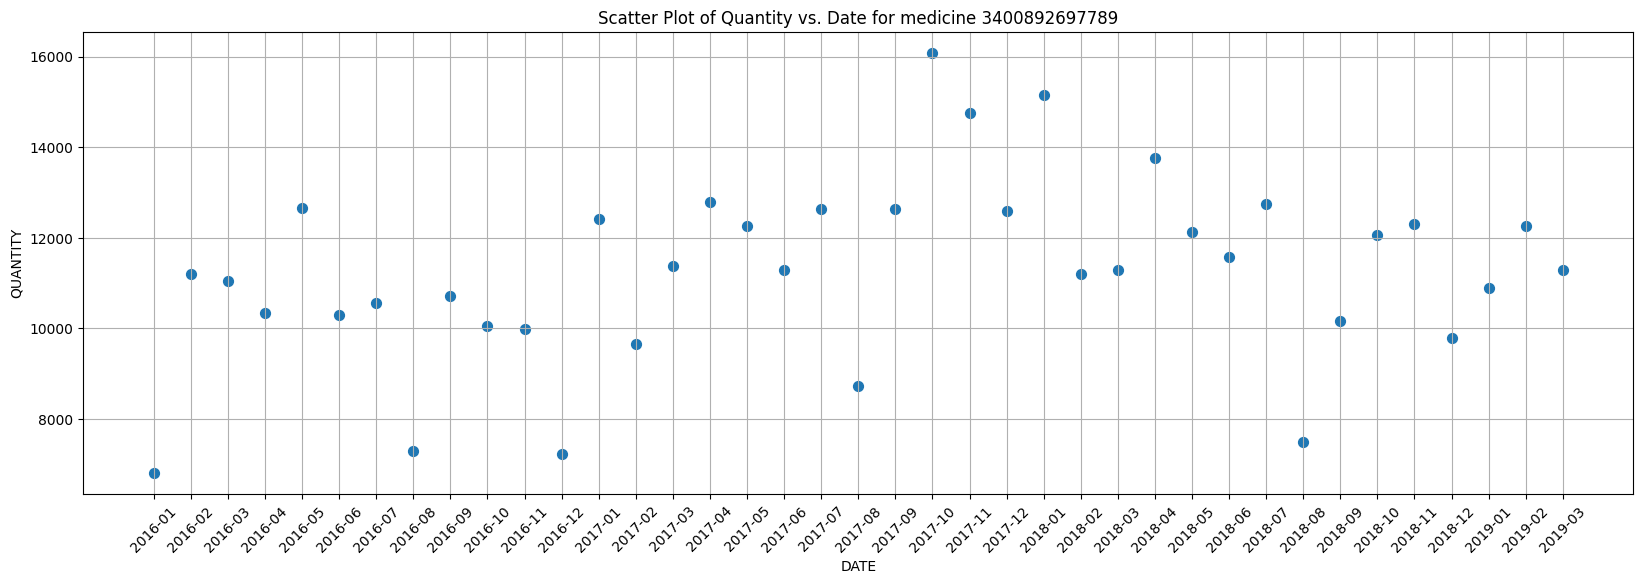

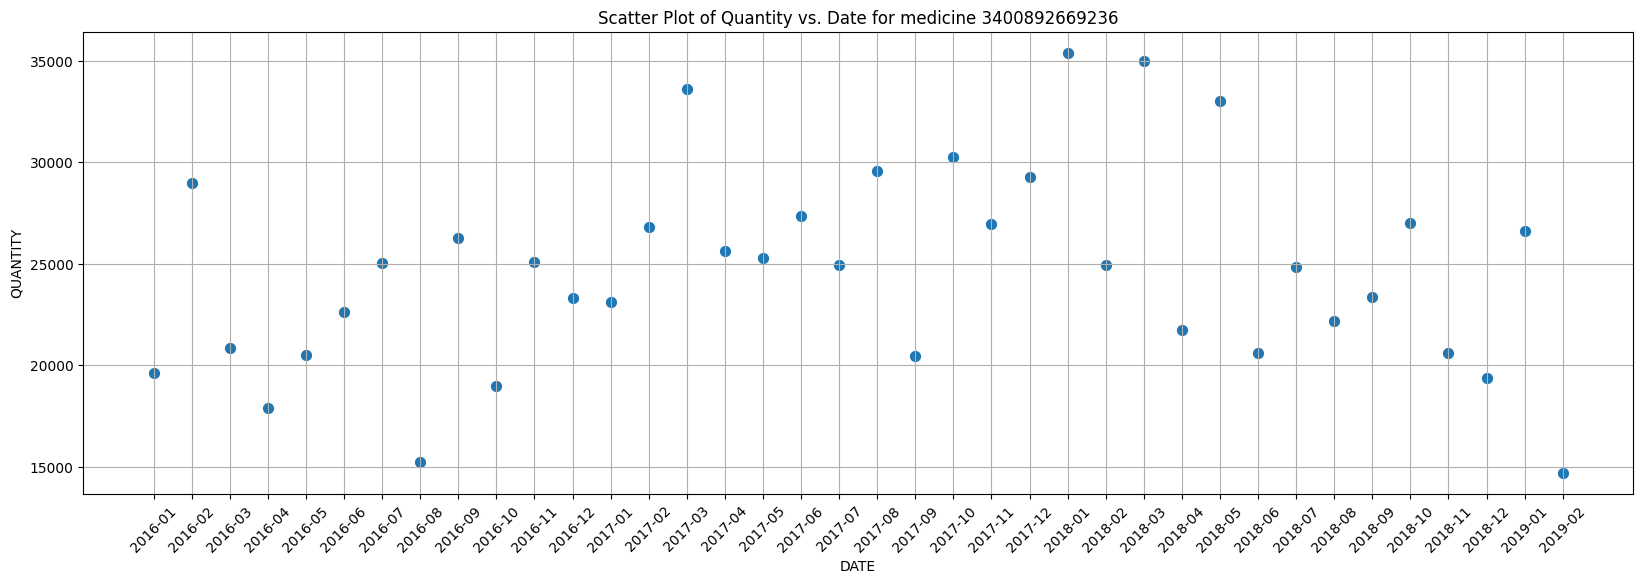

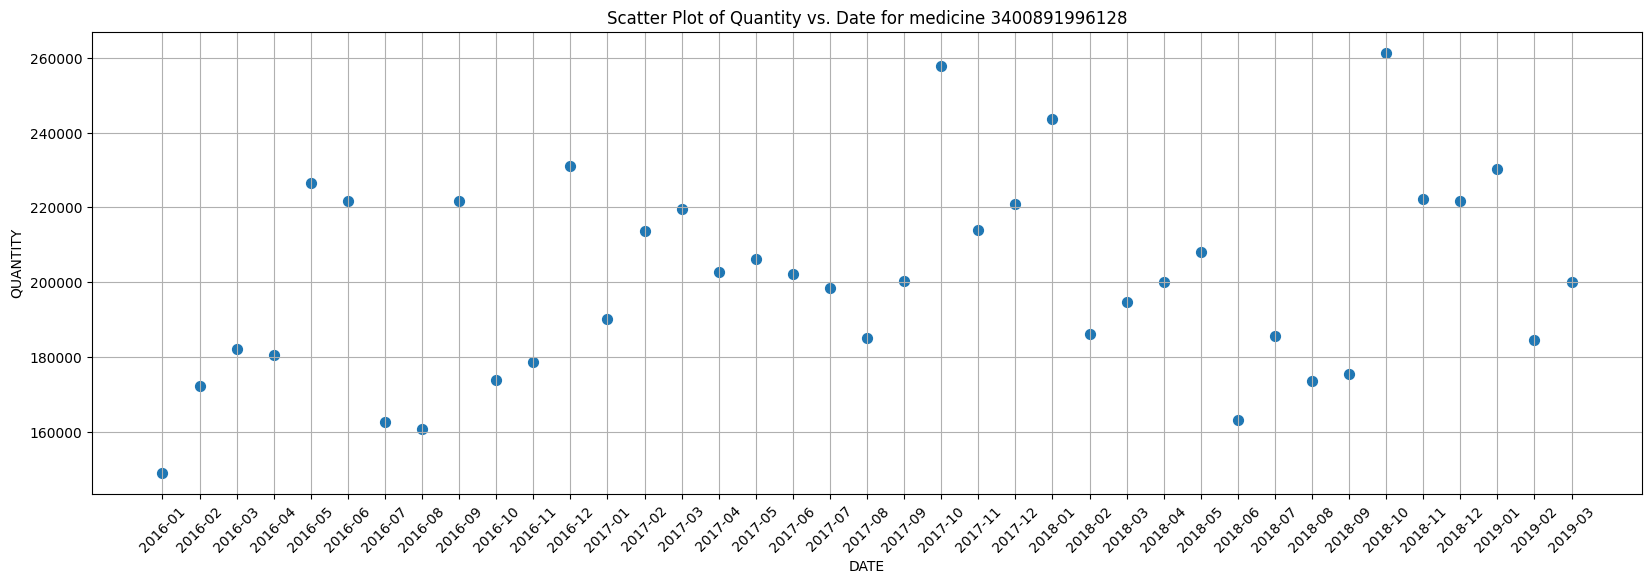

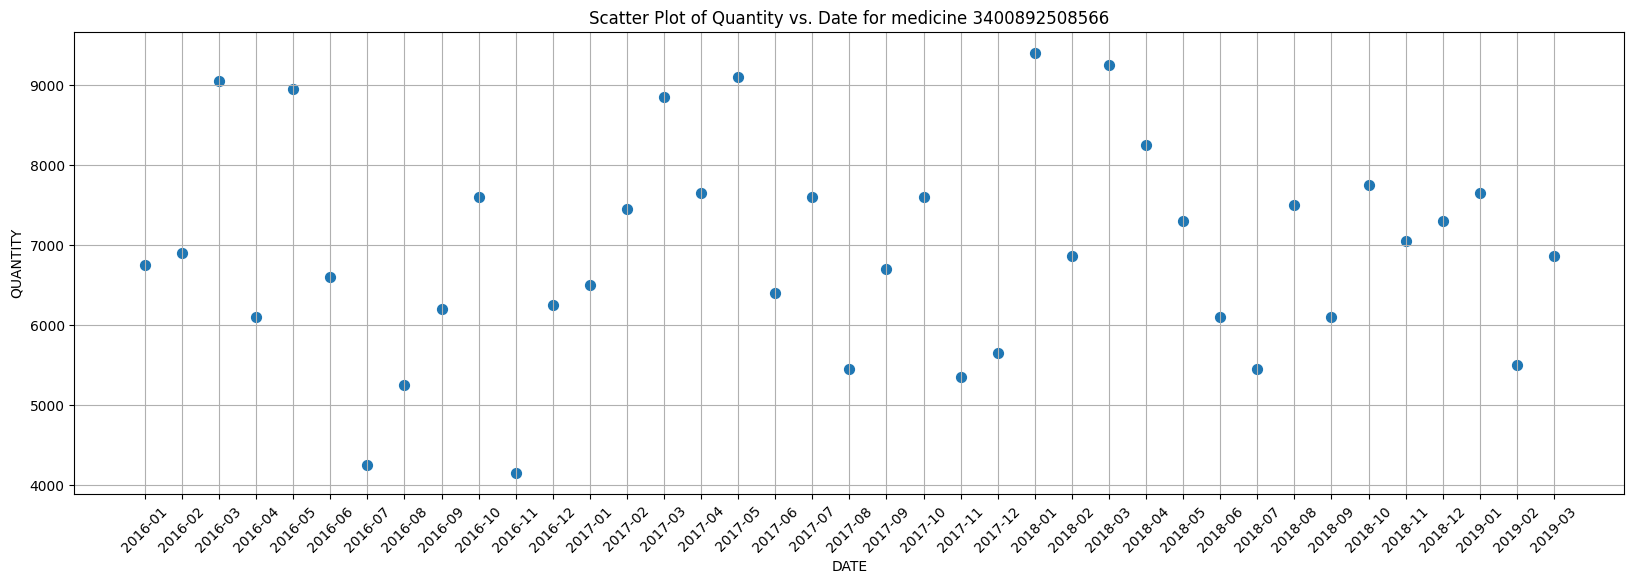

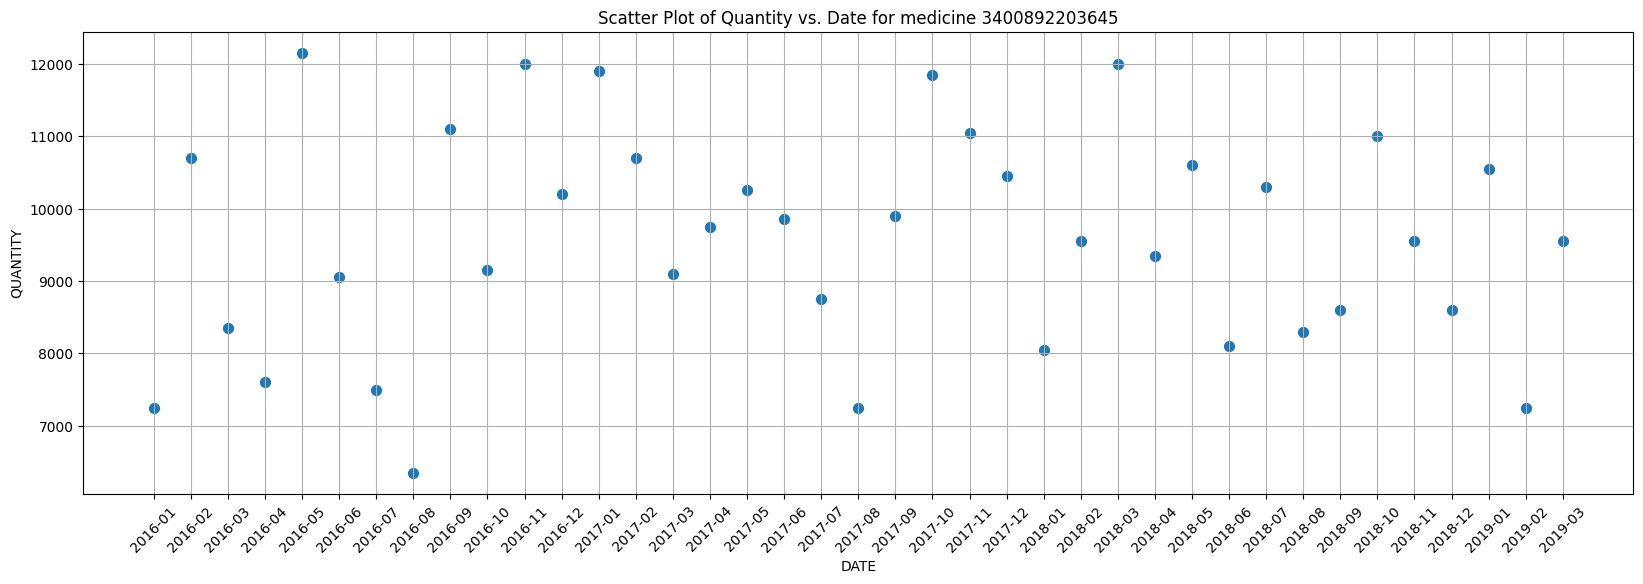

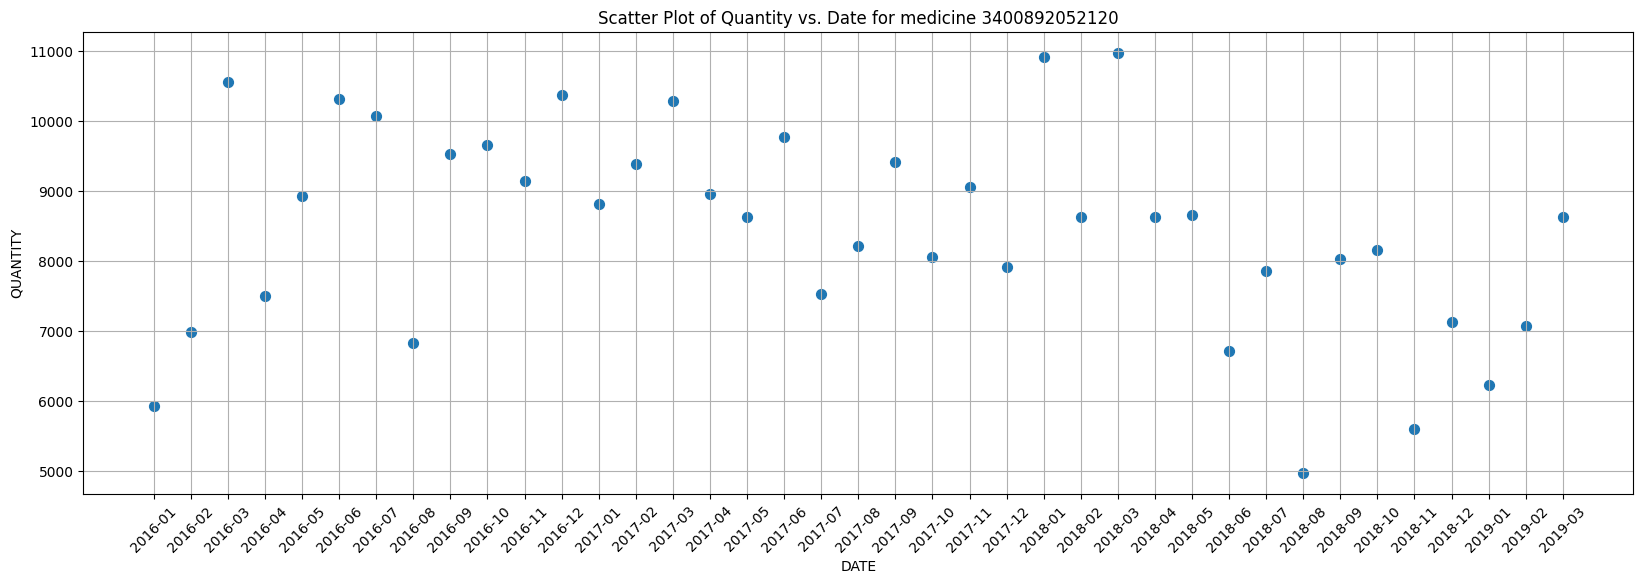

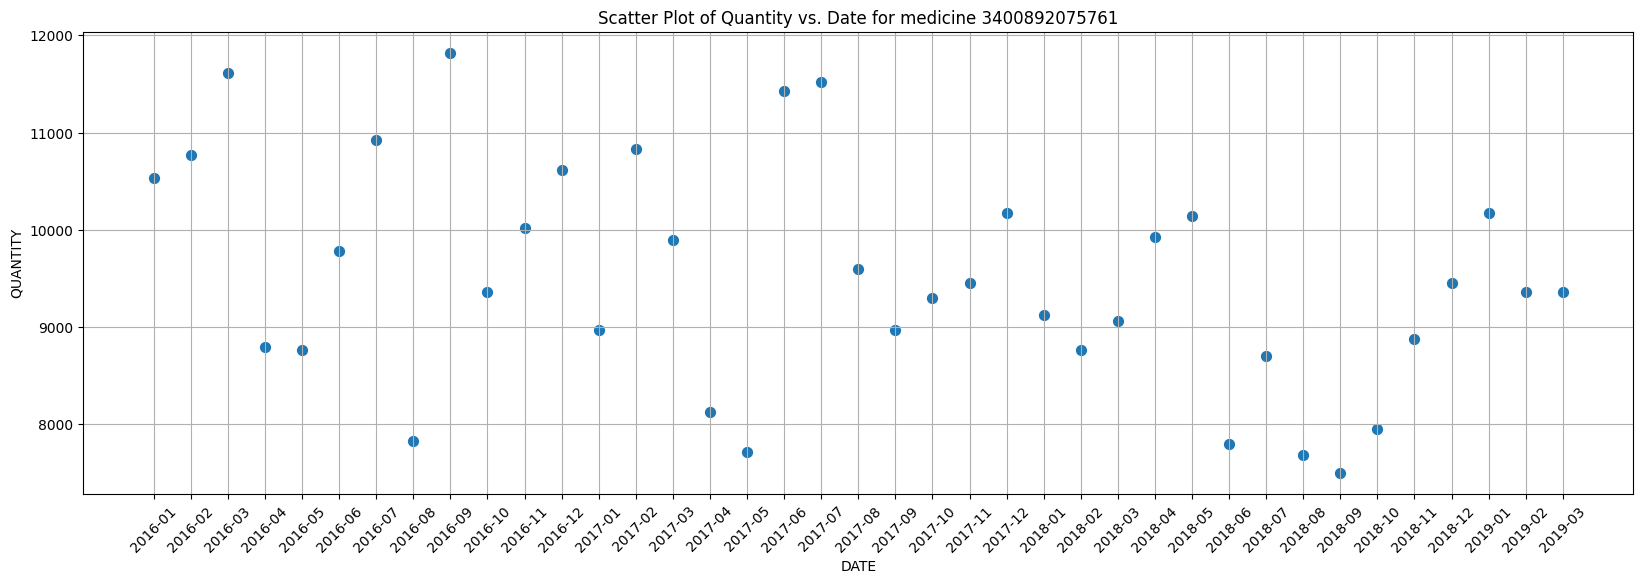

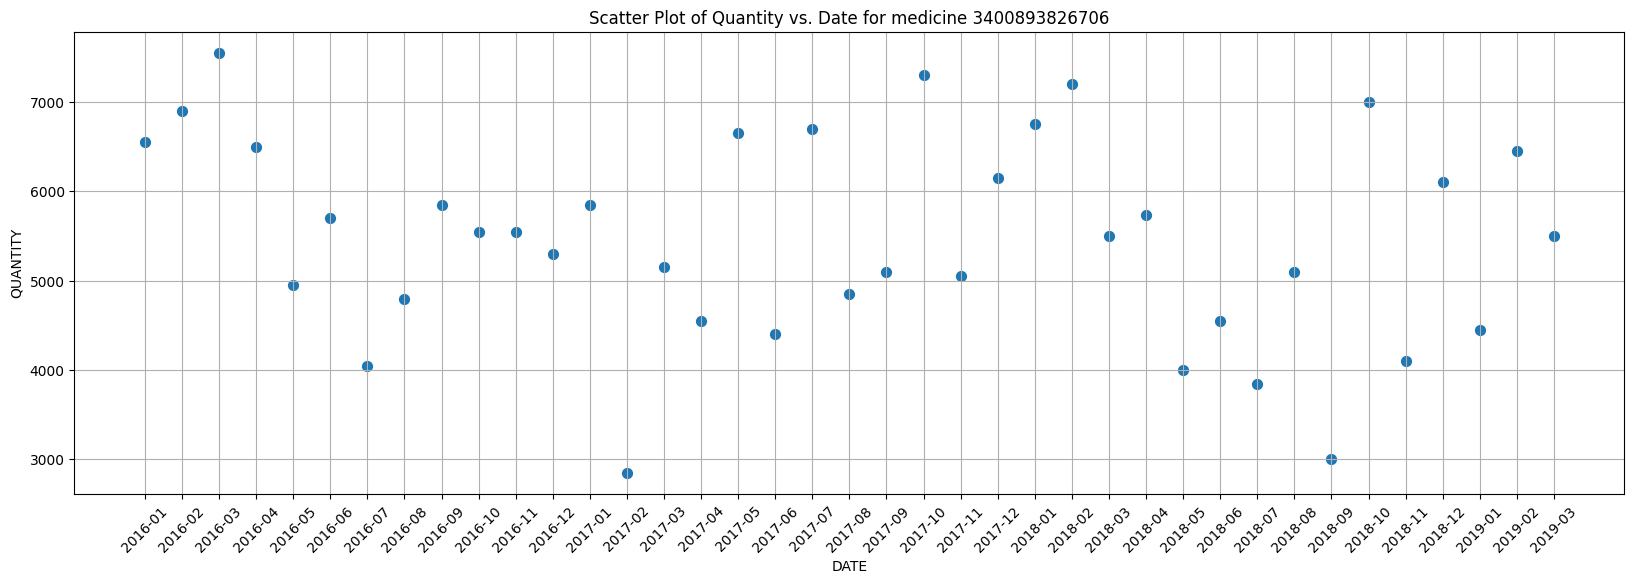

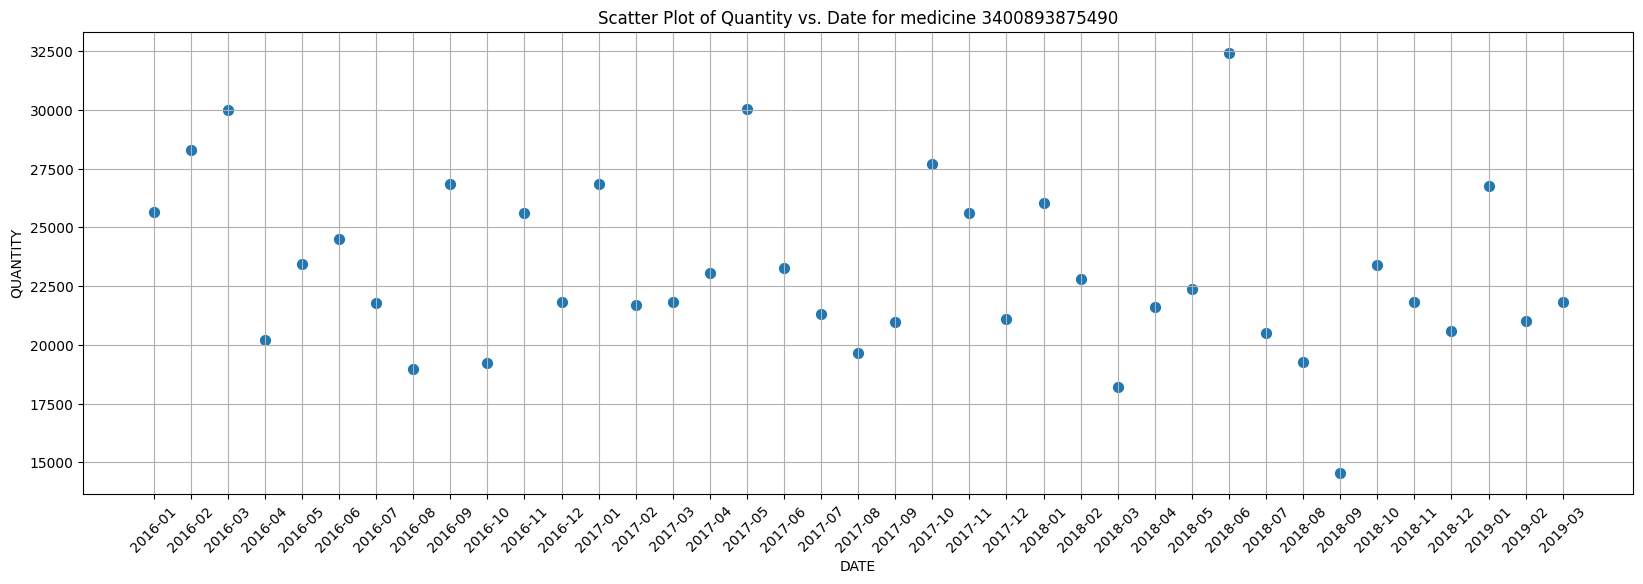

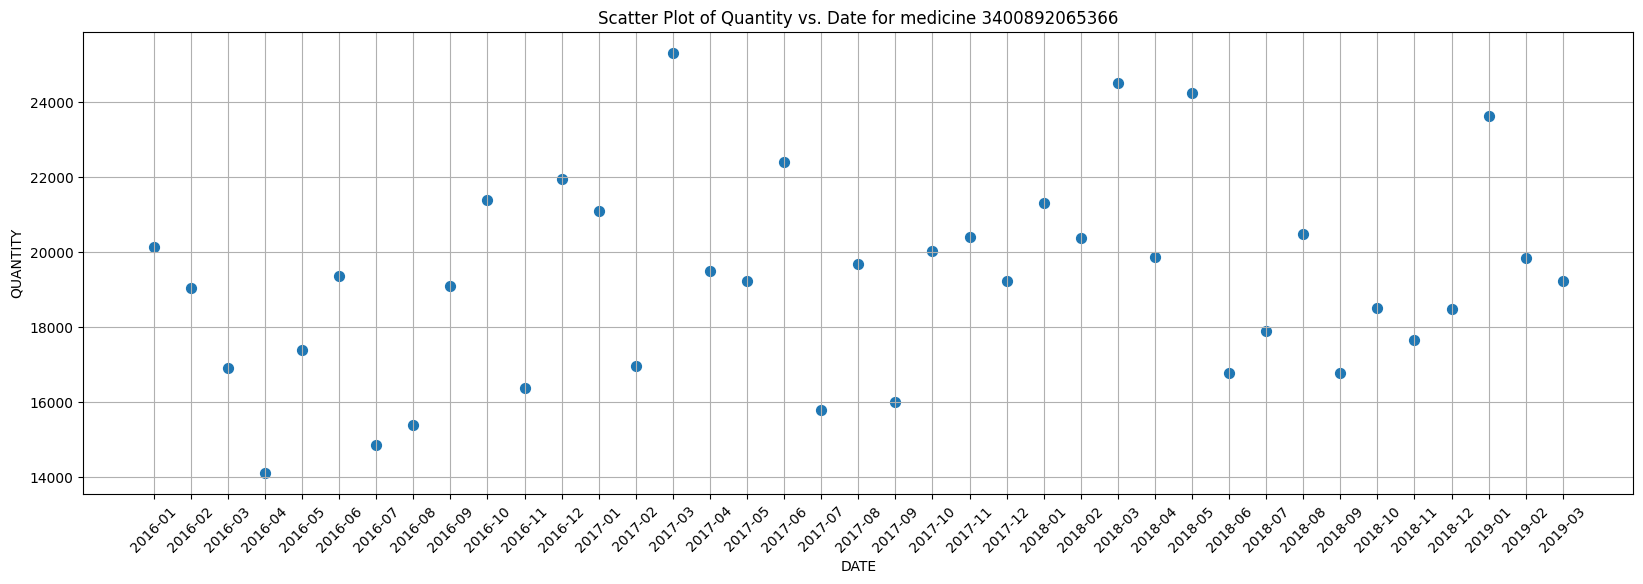

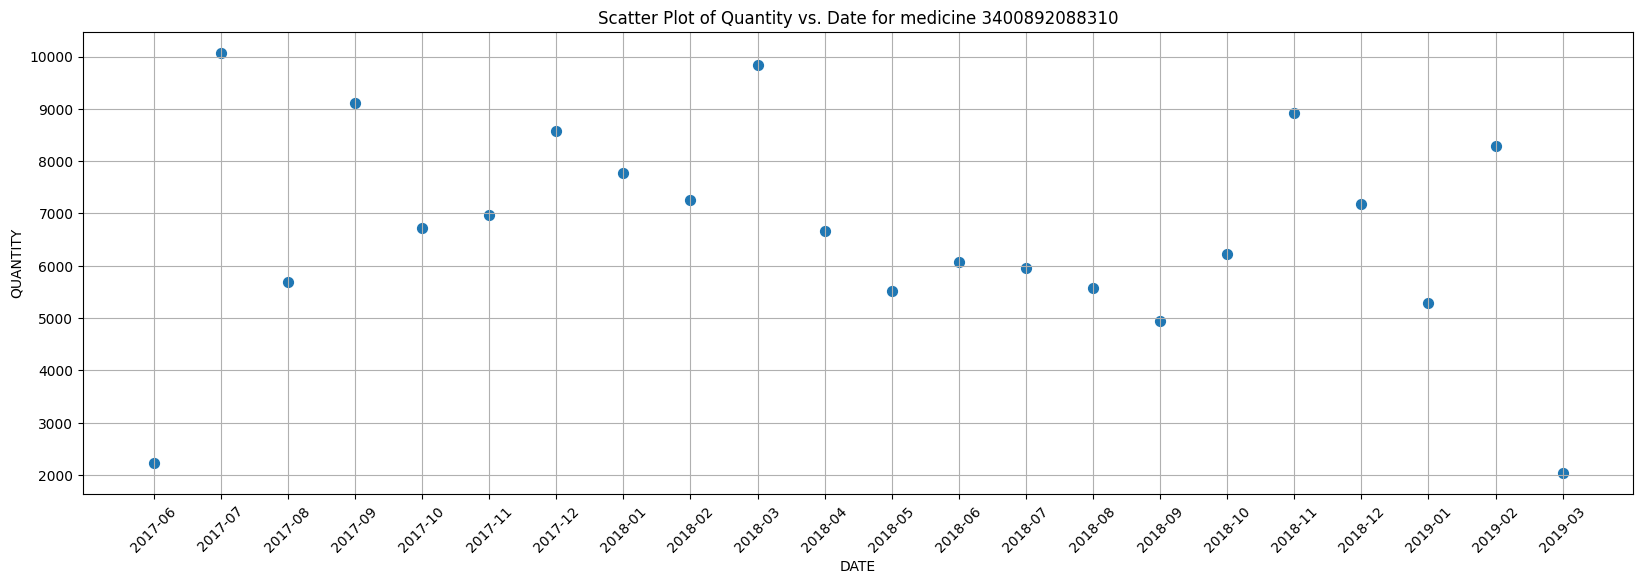

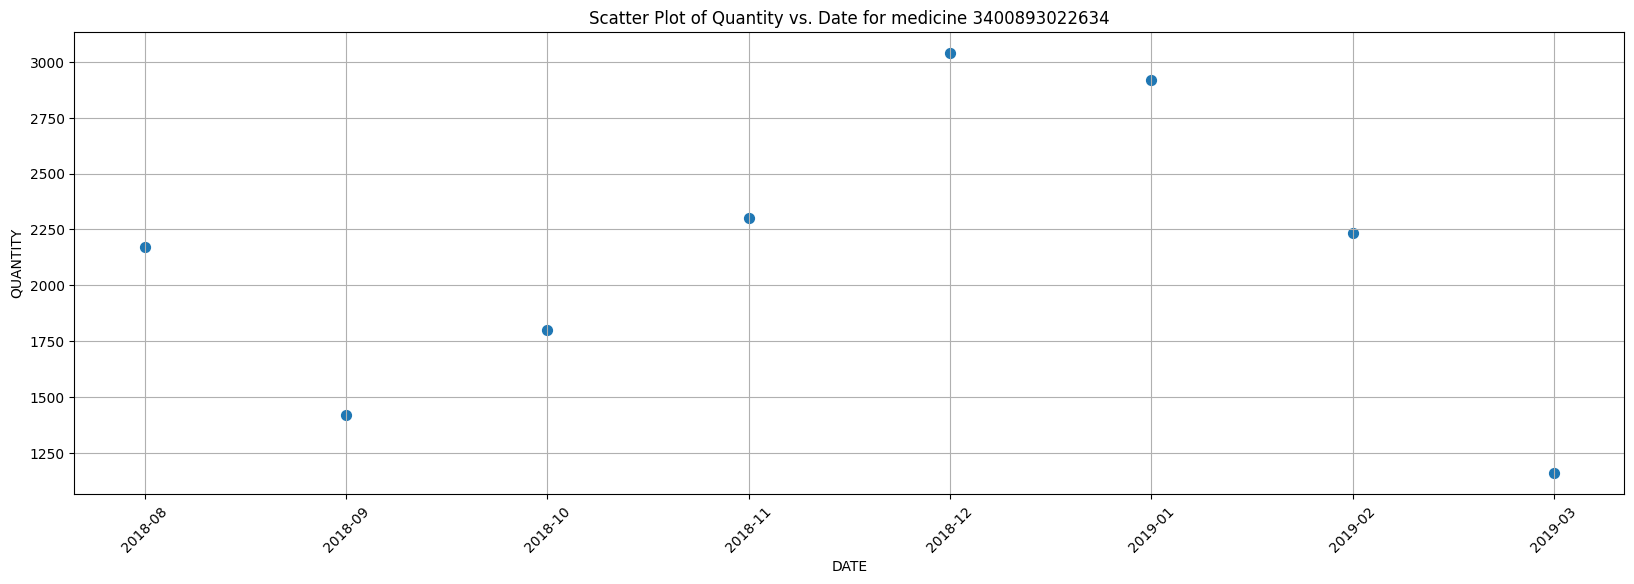

In [ ]:
plot_quantity(df_h4_resampled)

## 2.7 - Transform categorical features

In [ ]:
df_h1_resampled_numerical_only = df_h1_resampled.drop(['DATE', 'CODE_ATC', 'WEEK'], axis=1).copy()
df_h2_resampled_numerical_only = df_h2_resampled.drop(['DATE', 'CODE_ATC', 'WEEK'], axis=1).copy()
df_h3_resampled_numerical_only = df_h3_resampled.drop(['DATE', 'CODE_ATC', 'WEEK'], axis=1).copy()
df_h4_resampled_numerical_only = df_h4_resampled.drop(['DATE', 'CODE_ATC', 'WEEK'], axis=1).copy()


In [ ]:
df_h1_resampled_numerical_only = df_h1_resampled_numerical_only[df_h1_resampled_numerical_only['QUANTITY'] > 0]
df_h1_resampled_numerical_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1208 entries, 0 to 1207
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HOSPI_CODE_UCD  1208 non-null   object 
 1   YEAR            1208 non-null   float64
 2   MONTH           1208 non-null   float64
 3   QUANTITY        1208 non-null   float64
 4   N_UFS           1208 non-null   float64
 5   N_ETB           1208 non-null   float64
 6   POPULATION      1208 non-null   float64
 7   P_MEDICAL       1208 non-null   float64
 8   PN_MEDICAL      1208 non-null   float64
 9   LIT_HC          1208 non-null   float64
 10  LIT_HP          1208 non-null   float64
 11  SEJ_MCO         1208 non-null   float64
 12  SEJ_HAD         1208 non-null   float64
 13  SEJ_PSY         1208 non-null   float64
 14  SEJ_SSR         1208 non-null   float64
 15  SEJ_SLD         1208 non-null   float64
dtypes: float64(15), object(1)
memory usage: 160.4+ KB


In [ ]:
df_h2_resampled_numerical_only = df_h2_resampled_numerical_only[df_h2_resampled_numerical_only['QUANTITY'] > 0]
df_h2_resampled_numerical_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 697 entries, 0 to 696
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HOSPI_CODE_UCD  697 non-null    object 
 1   YEAR            697 non-null    float64
 2   MONTH           697 non-null    float64
 3   QUANTITY        697 non-null    float64
 4   N_UFS           697 non-null    float64
 5   N_ETB           697 non-null    float64
 6   POPULATION      697 non-null    float64
 7   P_MEDICAL       697 non-null    float64
 8   PN_MEDICAL      697 non-null    float64
 9   LIT_HC          697 non-null    float64
 10  LIT_HP          697 non-null    float64
 11  SEJ_MCO         697 non-null    float64
 12  SEJ_HAD         697 non-null    float64
 13  SEJ_PSY         697 non-null    float64
 14  SEJ_SSR         697 non-null    float64
 15  SEJ_SLD         697 non-null    float64
dtypes: float64(15), object(1)
memory usage: 92.6+ KB


In [ ]:
df_h3_resampled_numerical_only = df_h3_resampled_numerical_only[df_h3_resampled_numerical_only['QUANTITY'] > 0]
df_h3_resampled_numerical_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1397 entries, 0 to 1396
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HOSPI_CODE_UCD  1397 non-null   object 
 1   YEAR            1397 non-null   float64
 2   MONTH           1397 non-null   float64
 3   QUANTITY        1397 non-null   float64
 4   N_UFS           1397 non-null   float64
 5   N_ETB           1397 non-null   float64
 6   POPULATION      1397 non-null   float64
 7   P_MEDICAL       1397 non-null   float64
 8   PN_MEDICAL      1397 non-null   float64
 9   LIT_HC          1397 non-null   float64
 10  LIT_HP          1397 non-null   float64
 11  SEJ_MCO         1397 non-null   float64
 12  SEJ_HAD         1397 non-null   float64
 13  SEJ_PSY         1397 non-null   float64
 14  SEJ_SSR         1397 non-null   float64
 15  SEJ_SLD         1397 non-null   float64
dtypes: float64(15), object(1)
memory usage: 185.5+ KB


In [ ]:
df_h4_resampled_numerical_only = df_h4_resampled_numerical_only[df_h4_resampled_numerical_only['QUANTITY'] > 0]
df_h4_resampled_numerical_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 770 entries, 0 to 769
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HOSPI_CODE_UCD  770 non-null    object 
 1   YEAR            770 non-null    float64
 2   MONTH           770 non-null    float64
 3   QUANTITY        770 non-null    float64
 4   N_UFS           770 non-null    float64
 5   N_ETB           770 non-null    float64
 6   POPULATION      770 non-null    float64
 7   P_MEDICAL       770 non-null    float64
 8   PN_MEDICAL      770 non-null    float64
 9   LIT_HC          770 non-null    float64
 10  LIT_HP          770 non-null    float64
 11  SEJ_MCO         770 non-null    float64
 12  SEJ_HAD         770 non-null    float64
 13  SEJ_PSY         770 non-null    float64
 14  SEJ_SSR         770 non-null    float64
 15  SEJ_SLD         770 non-null    float64
dtypes: float64(15), object(1)
memory usage: 102.3+ KB


In [ ]:
df_h1_resampled_numerical_only.to_csv('df_h1_resampled.csv', index=False)
df_h2_resampled_numerical_only.to_csv('df_h2_resampled.csv', index=False)
df_h3_resampled_numerical_only.to_csv('df_h3_resampled.csv', index=False)
df_h4_resampled_numerical_only.to_csv('df_h4_resampled.csv', index=False)